In [1]:
import pickle
from modules.transcripts import Transcripts
from torch.utils.data import DataLoader

In [2]:
from modules.model import FOMOnet
from modules.visualize import *
from modules.evaluate import *
from modules.utils import *

In [3]:
fomonet = FOMOnet(num_channels=4).cuda()
fomonet.load_state_dict(torch.load('fomonet0.pt', map_location=torch.device('cuda')))

<All keys matched successfully>

In [4]:
trx_orfs = pickle.load(open('data/trx_orfs.pkl', 'rb'))
ensembl_trx = pickle.load(open('data/ensembl_trx.pkl', 'rb'))
inverted_ensembl_trx = {y['sequence']:x for x,y in ensembl_trx.items()}

In [7]:
split_dict = pickle.load(open('data/split_dict.pkl', 'rb'))
alt_dataset = pickle.load(open('data/alt_dataset.pkl', 'rb'))

In [28]:
X_test, y_test = pickle.load(open('data/test_split0.pkl', 'rb'))

In [24]:
pseudo0 = {x:y for x,y in alt_dataset.items() if split_dict[x] == 0}

In [31]:
Xpseudo = [x["mapped_seq"] for x in pseudo0.values()]
ypseudo = [x["mapped_cds"] for x in pseudo0.values()]

In [32]:
preds = get_preds(fomonet, Xpseudo, ypseudo)
#pickle.dump(preds, open('data/preds.pkl', 'wb'))
#preds = pickle.load(open('data/preds.pkl', 'rb'))

  0%|          | 0/379 [00:00<?, ?it/s]

/home/mablab/projects/unet-main/modules/evaluate.py:75: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3571.)
  X_one_hot = one_hot(X_).T.cuda()


In [33]:
report = get_report(preds, ensembl_trx, inverted_ensembl_trx)
#pickle.dump(report, open('data/report.pkl', 'wb'))
#report = pickle.load(open('data/report.pkl', 'rb'))

  0%|          | 0/379 [00:00<?, ?it/s]

In [35]:
preds = [x["out"] for x in report.values()]

In [36]:
target = [x["mapped_cds"] for x in report.values()]

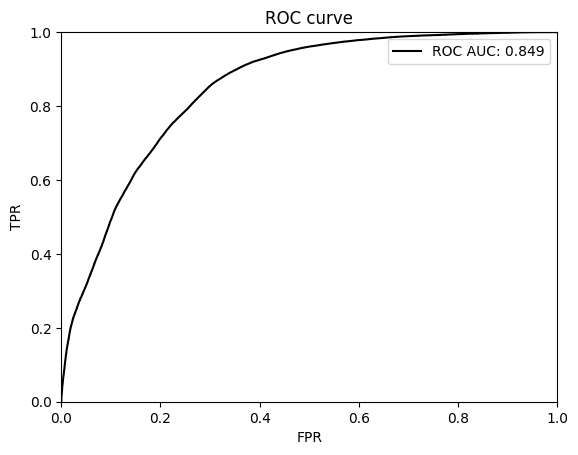

In [37]:
roc_curve(preds, target)

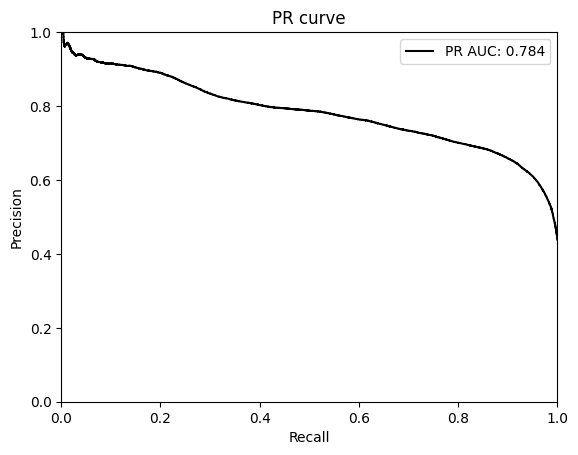

In [38]:
pr_curve(preds, target)

ENST00000568013
recall: 1.0
iou: 1.0
biotype: pseudogene
IP_564065  :  {'start': 0, 'stop': 1209, 'MS': 0, 'TE': 4, 'frame': 1}
IP_138136  :  {'start': 361, 'stop': 514, 'MS': 0, 'TE': 0, 'frame': 2}
IP_138135  :  {'start': 892, 'stop': 997, 'MS': 0, 'TE': 0, 'frame': 2}


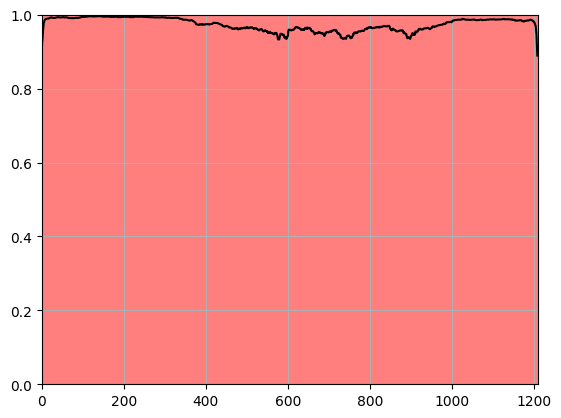

ENST00000435838
recall: 0.9981982111930847
iou: 0.5054744482040405
biotype: pseudogene
IP_564749  :  {'start': 204, 'stop': 759, 'MS': 8, 'TE': 0, 'frame': 1}
IP_156871  :  {'start': 382, 'stop': 532, 'MS': 0, 'TE': 0, 'frame': 2}
IP_564750  :  {'start': 589, 'stop': 679, 'MS': 0, 'TE': 0, 'frame': 2}
IP_564752  :  {'start': 853, 'stop': 1402, 'MS': 0, 'TE': 0, 'frame': 2}
IP_564751  :  {'start': 1438, 'stop': 1540, 'MS': 0, 'TE': 0, 'frame': 2}


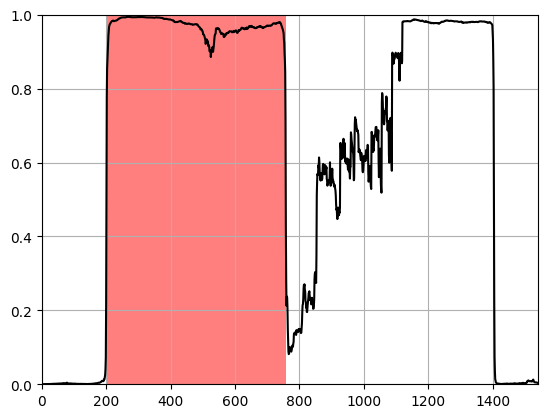

ENST00000441188
recall: 0.9992668628692627
iou: 0.6175804138183594
biotype: pseudogene
IP_556255  :  {'start': 0, 'stop': 732, 'MS': 6, 'TE': 0, 'frame': 1}
IP_556257  :  {'start': 394, 'stop': 508, 'MS': 0, 'TE': 0, 'frame': 2}
IP_556260  :  {'start': 662, 'stop': 1364, 'MS': 13, 'TE': 0, 'frame': 3}
IP_556258  :  {'start': 1513, 'stop': 2335, 'MS': 0, 'TE': 0, 'frame': 2}
IP_556259  :  {'start': 1754, 'stop': 1895, 'MS': 0, 'TE': 0, 'frame': 3}
IP_556254  :  {'start': 2565, 'stop': 2658, 'MS': 0, 'TE': 0, 'frame': 1}
IP_556256  :  {'start': 2667, 'stop': 2790, 'MS': 0, 'TE': 0, 'frame': 1}


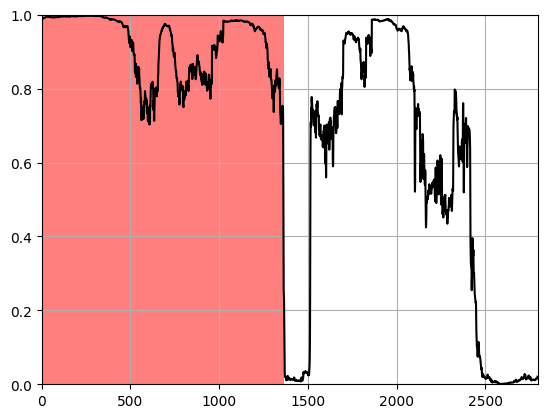

ENST00000394563
recall: 0.8767676949501038
iou: 0.8767676949501038
biotype: pseudogene
IP_556329  :  {'start': 63, 'stop': 201, 'MS': 0, 'TE': 0, 'frame': 1}
IP_556333  :  {'start': 376, 'stop': 466, 'MS': 0, 'TE': 0, 'frame': 2}
IP_556330  :  {'start': 567, 'stop': 723, 'MS': 0, 'TE': 0, 'frame': 1}
IP_556334  :  {'start': 571, 'stop': 679, 'MS': 0, 'TE': 0, 'frame': 2}
IP_556332  :  {'start': 700, 'stop': 808, 'MS': 0, 'TE': 0, 'frame': 2}
IP_556335  :  {'start': 770, 'stop': 1265, 'MS': 3, 'TE': 0, 'frame': 3}
IP_556331  :  {'start': 1251, 'stop': 1380, 'MS': 0, 'TE': 0, 'frame': 1}


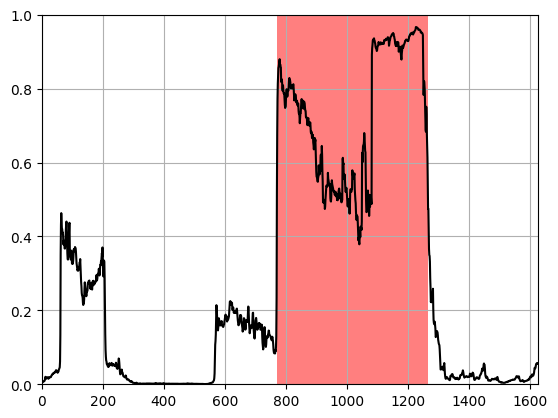

ENST00000398901
recall: 0.39898988604545593
iou: 0.1019354835152626
biotype: pseudogene
IP_556793  :  {'start': 22, 'stop': 151, 'MS': 0, 'TE': 0, 'frame': 2}
IP_556796  :  {'start': 107, 'stop': 536, 'MS': 1, 'TE': 0, 'frame': 3}
IP_556789  :  {'start': 201, 'stop': 333, 'MS': 0, 'TE': 0, 'frame': 1}
IP_556791  :  {'start': 456, 'stop': 654, 'MS': 2, 'TE': 0, 'frame': 1}
IP_556794  :  {'start': 569, 'stop': 662, 'MS': 0, 'TE': 0, 'frame': 3}
IP_556790  :  {'start': 822, 'stop': 936, 'MS': 0, 'TE': 0, 'frame': 1}
IP_556792  :  {'start': 925, 'stop': 1015, 'MS': 0, 'TE': 0, 'frame': 2}
IP_556795  :  {'start': 947, 'stop': 1040, 'MS': 1, 'TE': 0, 'frame': 3}
IP_556788  :  {'start': 1020, 'stop': 1275, 'MS': 0, 'TE': 0, 'frame': 1}


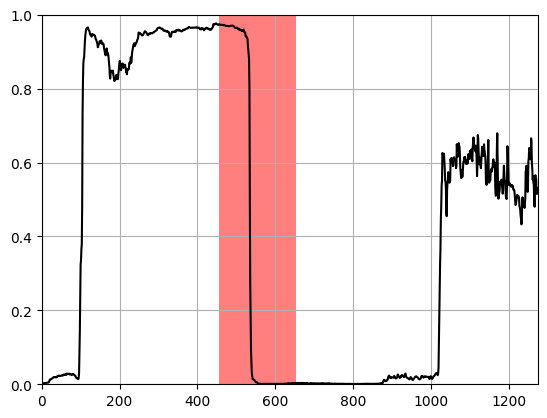

ENST00000424708
recall: 0.9828178882598877
iou: 0.9828178882598877
biotype: pseudogene
IP_557018  :  {'start': 0, 'stop': 291, 'MS': 11, 'TE': 0, 'frame': 1}
IP_557019  :  {'start': 247, 'stop': 415, 'MS': 0, 'TE': 0, 'frame': 2}
IP_557021  :  {'start': 374, 'stop': 482, 'MS': 0, 'TE': 0, 'frame': 3}
IP_557020  :  {'start': 743, 'stop': 896, 'MS': 0, 'TE': 0, 'frame': 3}


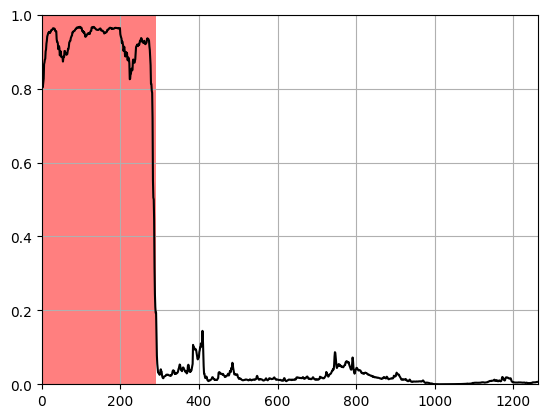

ENST00000449447
recall: 0.8130686283111572
iou: 0.8130686283111572
biotype: pseudogene
IP_557370  :  {'start': 228, 'stop': 1212, 'MS': 2, 'TE': 0, 'frame': 1}
IP_557373  :  {'start': 268, 'stop': 361, 'MS': 0, 'TE': 0, 'frame': 2}
IP_557372  :  {'start': 715, 'stop': 892, 'MS': 1, 'TE': 0, 'frame': 2}
IP_557374  :  {'start': 1066, 'stop': 1171, 'MS': 0, 'TE': 0, 'frame': 2}
IP_557371  :  {'start': 1476, 'stop': 1701, 'MS': 2, 'TE': 0, 'frame': 1}


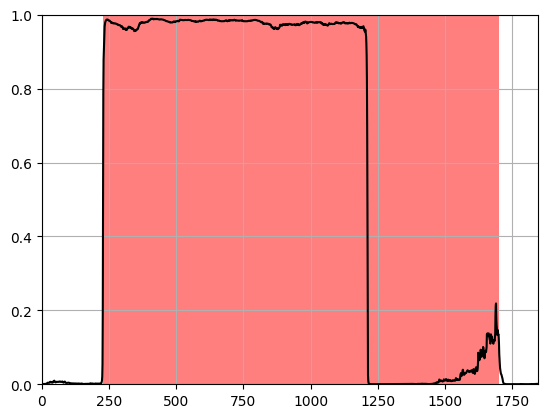

ENST00000446082
recall: 1.0
iou: 1.0
biotype: pseudogene
IP_557684  :  {'start': 0, 'stop': 354, 'MS': 6, 'TE': 0, 'frame': 1}
IP_557685  :  {'start': 37, 'stop': 145, 'MS': 0, 'TE': 0, 'frame': 2}


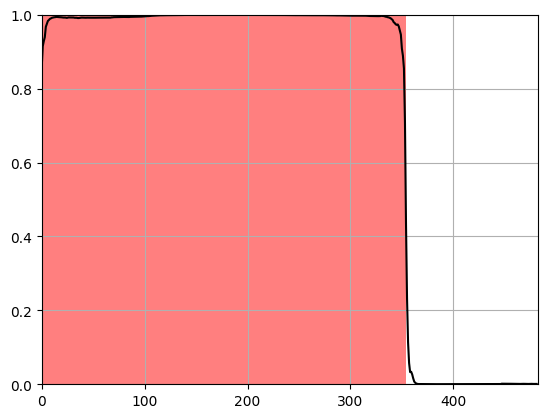

ENST00000453110
recall: 1.0
iou: 0.5656565427780151
biotype: pseudogene
IP_558780  :  {'start': 0, 'stop': 270, 'MS': 0, 'TE': 0, 'frame': 1}
IP_558777  :  {'start': 348, 'stop': 852, 'MS': 16, 'TE': 0, 'frame': 1}
IP_558781  :  {'start': 652, 'stop': 928, 'MS': 0, 'TE': 0, 'frame': 2}
IP_558776  :  {'start': 867, 'stop': 1002, 'MS': 1, 'TE': 0, 'frame': 1}
IP_558779  :  {'start': 1005, 'stop': 1128, 'MS': 0, 'TE': 0, 'frame': 1}
IP_558782  :  {'start': 1094, 'stop': 1448, 'MS': 0, 'TE': 0, 'frame': 3}
IP_558778  :  {'start': 1275, 'stop': 1386, 'MS': 0, 'TE': 0, 'frame': 1}


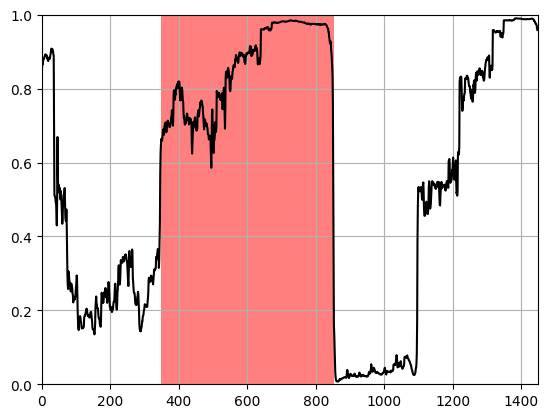

ENST00000416450
recall: 1.0
iou: 0.9886363744735718
biotype: pseudogene
IP_558789  :  {'start': 119, 'stop': 380, 'MS': 2, 'TE': 0, 'frame': 3}
IP_558786  :  {'start': 198, 'stop': 318, 'MS': 0, 'TE': 0, 'frame': 1}
IP_558787  :  {'start': 328, 'stop': 478, 'MS': 0, 'TE': 0, 'frame': 2}
IP_558788  :  {'start': 521, 'stop': 632, 'MS': 0, 'TE': 0, 'frame': 3}
IP_558790  :  {'start': 635, 'stop': 731, 'MS': 0, 'TE': 0, 'frame': 3}
IP_558785  :  {'start': 807, 'stop': 945, 'MS': 0, 'TE': 0, 'frame': 1}


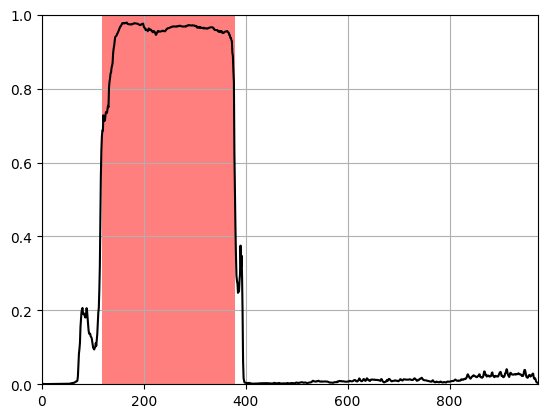

ENST00000414254
recall: 0.9245785474777222
iou: 0.922123908996582
biotype: pseudogene
IP_559479  :  {'start': 0, 'stop': 618, 'MS': 4, 'TE': 0, 'frame': 1}
IP_559480  :  {'start': 79, 'stop': 220, 'MS': 0, 'TE': 0, 'frame': 2}
IP_559481  :  {'start': 506, 'stop': 1127, 'MS': 74, 'TE': 0, 'frame': 3}
IP_559478  :  {'start': 684, 'stop': 933, 'MS': 0, 'TE': 0, 'frame': 1}
IP_559482  :  {'start': 1274, 'stop': 1385, 'MS': 0, 'TE': 0, 'frame': 3}


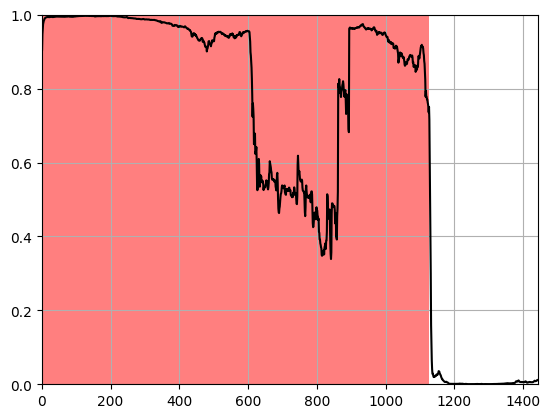

ENST00000453156
recall: 1.0
iou: 0.9974619150161743
biotype: pseudogene
IP_559773  :  {'start': 238, 'stop': 631, 'MS': 3, 'TE': 0, 'frame': 2}
IP_559774  :  {'start': 572, 'stop': 698, 'MS': 0, 'TE': 0, 'frame': 3}


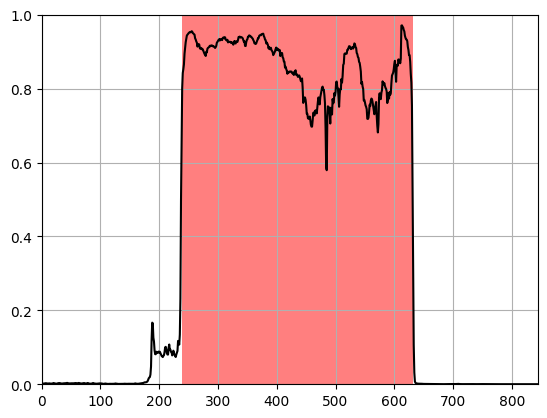

ENST00000402340
recall: 1.0
iou: 0.5349911451339722
biotype: pseudogene
IP_560755  :  {'start': 11, 'stop': 149, 'MS': 0, 'TE': 0, 'frame': 3}
IP_560752  :  {'start': 34, 'stop': 1540, 'MS': 2, 'TE': 0, 'frame': 2}
IP_560756  :  {'start': 212, 'stop': 389, 'MS': 0, 'TE': 0, 'frame': 3}
IP_560750  :  {'start': 372, 'stop': 495, 'MS': 0, 'TE': 0, 'frame': 1}
IP_560749  :  {'start': 945, 'stop': 2364, 'MS': 1, 'TE': 0, 'frame': 1}
II_560754  :  {'start': 2357, 'stop': 2459, 'MS': 0, 'TE': 0, 'frame': 3}
II_560753  :  {'start': 2738, 'stop': 3254, 'MS': 0, 'TE': 0, 'frame': 3}
IP_560748  :  {'start': 2742, 'stop': 2856, 'MS': 0, 'TE': 0, 'frame': 1}
IP_560751  :  {'start': 2895, 'stop': 2985, 'MS': 0, 'TE': 0, 'frame': 1}


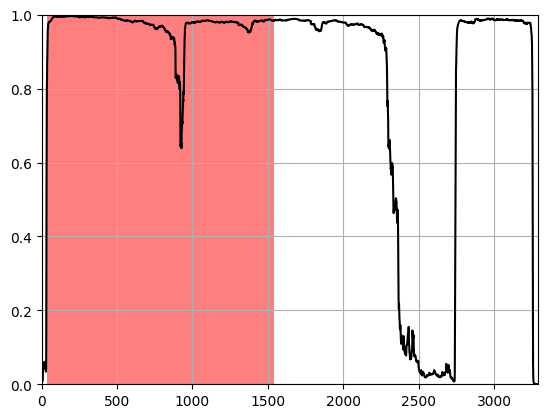

ENST00000430630
recall: 0.7891156673431396
iou: 0.16384181380271912
biotype: pseudogene
IP_562209  :  {'start': 0, 'stop': 96, 'MS': 0, 'TE': 0, 'frame': 1}
IP_562212  :  {'start': 83, 'stop': 467, 'MS': 0, 'TE': 0, 'frame': 3}
IP_562213  :  {'start': 605, 'stop': 737, 'MS': 0, 'TE': 0, 'frame': 3}
IP_562208  :  {'start': 630, 'stop': 993, 'MS': 1, 'TE': 0, 'frame': 1}
IP_562211  :  {'start': 877, 'stop': 1024, 'MS': 2, 'TE': 0, 'frame': 2}
IP_562210  :  {'start': 996, 'stop': 1098, 'MS': 0, 'TE': 0, 'frame': 1}
IP_562214  :  {'start': 1052, 'stop': 1208, 'MS': 1, 'TE': 0, 'frame': 3}


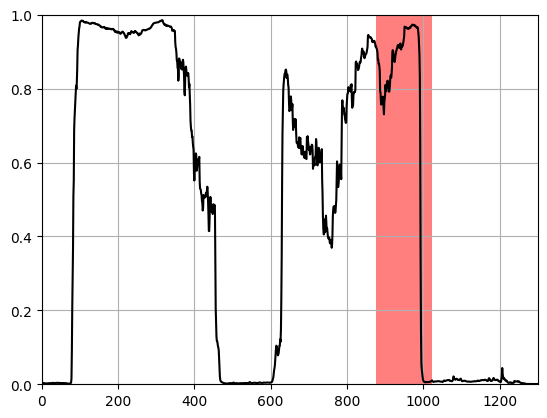

ENST00000429999
recall: 0.987500011920929
iou: 0.3761904835700989
biotype: pseudogene
IP_563535  :  {'start': 814, 'stop': 1075, 'MS': 0, 'TE': 0, 'frame': 2}
IP_563543  :  {'start': 842, 'stop': 1046, 'MS': 0, 'TE': 0, 'frame': 3}
IP_563533  :  {'start': 888, 'stop': 1002, 'MS': 0, 'TE': 0, 'frame': 1}
IP_563532  :  {'start': 1140, 'stop': 1323, 'MS': 0, 'TE': 0, 'frame': 1}
IP_563537  :  {'start': 1195, 'stop': 1402, 'MS': 0, 'TE': 0, 'frame': 2}
IP_563531  :  {'start': 1434, 'stop': 1755, 'MS': 0, 'TE': 0, 'frame': 1}
IP_563539  :  {'start': 1438, 'stop': 1723, 'MS': 0, 'TE': 0, 'frame': 2}
IP_563540  :  {'start': 1688, 'stop': 1859, 'MS': 0, 'TE': 0, 'frame': 3}
IP_563536  :  {'start': 1813, 'stop': 1936, 'MS': 0, 'TE': 0, 'frame': 2}
IP_563544  :  {'start': 2120, 'stop': 2894, 'MS': 1, 'TE': 0, 'frame': 3}
IP_563530  :  {'start': 2442, 'stop': 2541, 'MS': 1, 'TE': 0, 'frame': 1}
IP_563529  :  {'start': 3066, 'stop': 3309, 'MS': 0, 'TE': 0, 'frame': 1}
IP_563541  :  {'start': 3362,

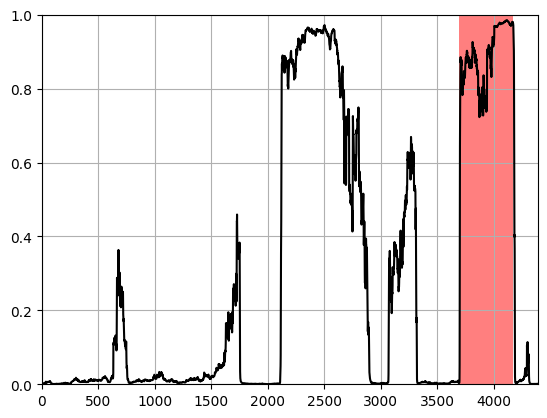

ENST00000445359
recall: 0.6966666579246521
iou: 0.4050387740135193
biotype: pseudogene
IP_564415  :  {'start': 3, 'stop': 219, 'MS': 0, 'TE': 0, 'frame': 1}
IP_564418  :  {'start': 61, 'stop': 199, 'MS': 0, 'TE': 0, 'frame': 2}
IP_564417  :  {'start': 229, 'stop': 355, 'MS': 0, 'TE': 0, 'frame': 2}
IP_564416  :  {'start': 357, 'stop': 657, 'MS': 8, 'TE': 0, 'frame': 1}


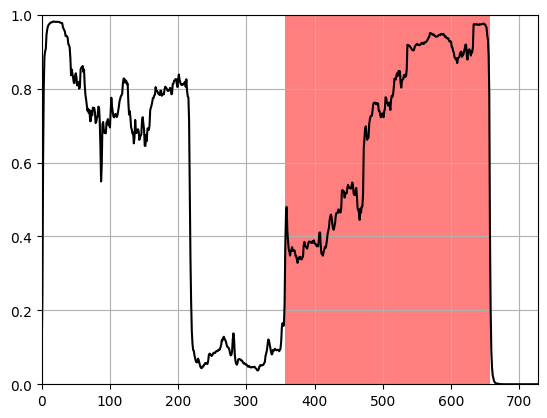

ENST00000443325
recall: 0.0
iou: 0.0
biotype: pseudogene
IP_564518  :  {'start': 6, 'stop': 402, 'MS': 0, 'TE': 0, 'frame': 1}
IP_564524  :  {'start': 49, 'stop': 262, 'MS': 0, 'TE': 0, 'frame': 2}
IP_564528  :  {'start': 344, 'stop': 476, 'MS': 0, 'TE': 0, 'frame': 3}
IP_564523  :  {'start': 523, 'stop': 724, 'MS': 0, 'TE': 0, 'frame': 2}
IP_564519  :  {'start': 921, 'stop': 1074, 'MS': 1, 'TE': 0, 'frame': 1}
IP_564527  :  {'start': 1073, 'stop': 1217, 'MS': 2, 'TE': 0, 'frame': 3}
IP_564516  :  {'start': 1197, 'stop': 1512, 'MS': 0, 'TE': 0, 'frame': 1}
IP_564517  :  {'start': 1827, 'stop': 2172, 'MS': 0, 'TE': 0, 'frame': 1}
IP_564522  :  {'start': 1861, 'stop': 1960, 'MS': 0, 'TE': 0, 'frame': 2}
IP_564526  :  {'start': 2147, 'stop': 2258, 'MS': 0, 'TE': 0, 'frame': 3}
IP_564525  :  {'start': 2269, 'stop': 2602, 'MS': 0, 'TE': 0, 'frame': 2}
IP_564529  :  {'start': 2402, 'stop': 2780, 'MS': 0, 'TE': 0, 'frame': 3}
IP_564520  :  {'start': 2700, 'stop': 3051, 'MS': 0, 'TE': 0, 'fram

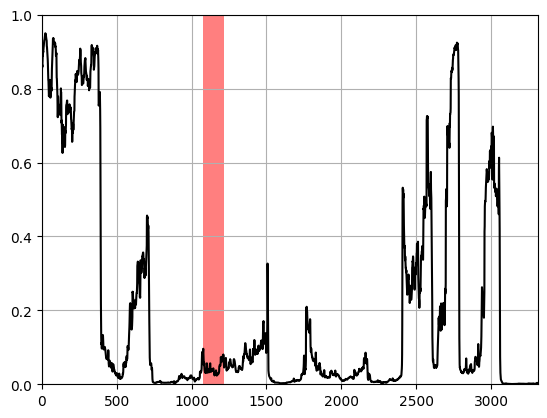

ENST00000399773
recall: 0.9784946441650391
iou: 0.11043689399957657
biotype: pseudogene
IP_564708  :  {'start': 0, 'stop': 372, 'MS': 4, 'TE': 0, 'frame': 1}
IP_564711  :  {'start': 322, 'stop': 421, 'MS': 0, 'TE': 0, 'frame': 2}
IP_171412  :  {'start': 904, 'stop': 1003, 'MS': 0, 'TE': 0, 'frame': 2}
IP_564709  :  {'start': 1257, 'stop': 1398, 'MS': 0, 'TE': 0, 'frame': 1}
IP_564707  :  {'start': 1416, 'stop': 1545, 'MS': 0, 'TE': 0, 'frame': 1}
IP_564710  :  {'start': 1557, 'stop': 1905, 'MS': 0, 'TE': 0, 'frame': 1}
IP_171411  :  {'start': 2050, 'stop': 2188, 'MS': 0, 'TE': 0, 'frame': 2}
IP_171405  :  {'start': 2379, 'stop': 2478, 'MS': 0, 'TE': 0, 'frame': 1}
IP_564713  :  {'start': 2483, 'stop': 3518, 'MS': 1, 'TE': 0, 'frame': 3}
IP_171404  :  {'start': 3192, 'stop': 3438, 'MS': 0, 'TE': 0, 'frame': 1}
IP_564714  :  {'start': 3586, 'stop': 3973, 'MS': 0, 'TE': 0, 'frame': 2}
IP_564715  :  {'start': 3746, 'stop': 3851, 'MS': 1, 'TE': 0, 'frame': 3}


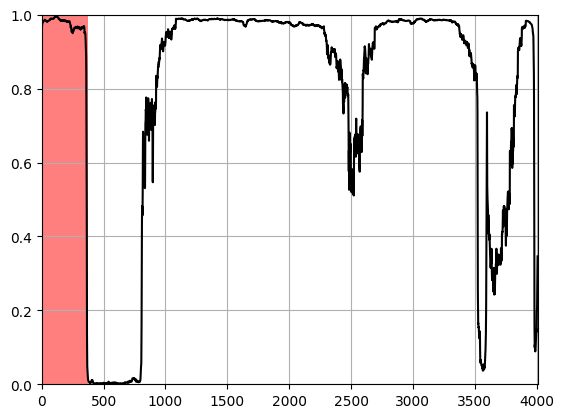

ENST00000397390
recall: 0.6327683329582214
iou: 0.6327683329582214
biotype: pseudogene
IP_564949  :  {'start': 0, 'stop': 177, 'MS': 3, 'TE': 0, 'frame': 1}
IP_564950  :  {'start': 55, 'stop': 190, 'MS': 0, 'TE': 0, 'frame': 2}
IP_564951  :  {'start': 131, 'stop': 236, 'MS': 0, 'TE': 0, 'frame': 3}
IP_564948  :  {'start': 186, 'stop': 459, 'MS': 1, 'TE': 0, 'frame': 1}


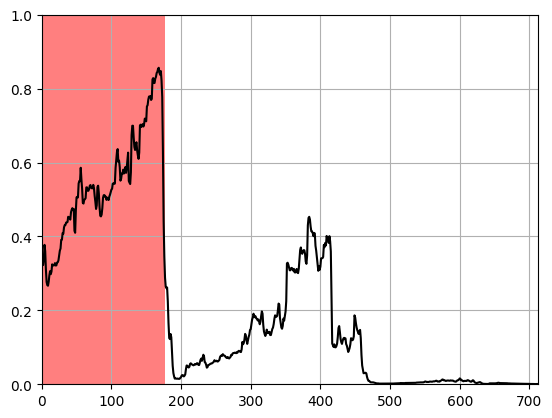

ENST00000391389
recall: 1.0
iou: 1.0
biotype: pseudogene
IP_565100  :  {'start': 0, 'stop': 411, 'MS': 2, 'TE': 0, 'frame': 1}


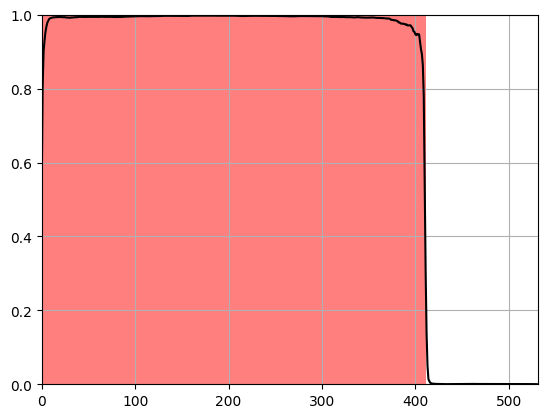

ENST00000452496
recall: 0.9959100484848022
iou: 0.8886861205101013
biotype: pseudogene
IP_566040  :  {'start': 0, 'stop': 489, 'MS': 6, 'TE': 0, 'frame': 1}
IP_566043  :  {'start': 187, 'stop': 418, 'MS': 0, 'TE': 0, 'frame': 2}
IP_566042  :  {'start': 555, 'stop': 660, 'MS': 0, 'TE': 0, 'frame': 1}
IP_566045  :  {'start': 568, 'stop': 835, 'MS': 0, 'TE': 0, 'frame': 2}
IP_566044  :  {'start': 901, 'stop': 1030, 'MS': 1, 'TE': 0, 'frame': 2}
IP_566046  :  {'start': 1010, 'stop': 1124, 'MS': 0, 'TE': 0, 'frame': 3}
IP_566041  :  {'start': 1026, 'stop': 1149, 'MS': 0, 'TE': 0, 'frame': 1}


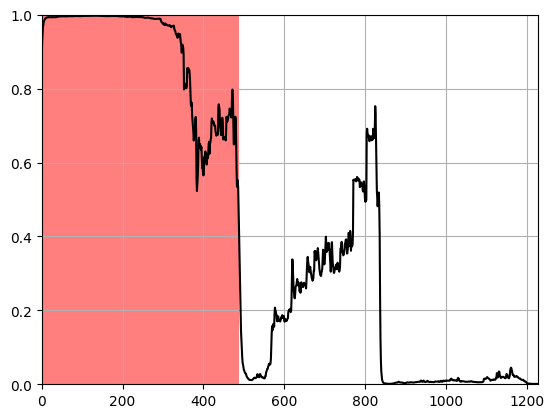

ENST00000473700
recall: 1.0
iou: 1.0
biotype: pseudogene
IP_572296  :  {'start': 71, 'stop': 215, 'MS': 2, 'TE': 0, 'frame': 3}


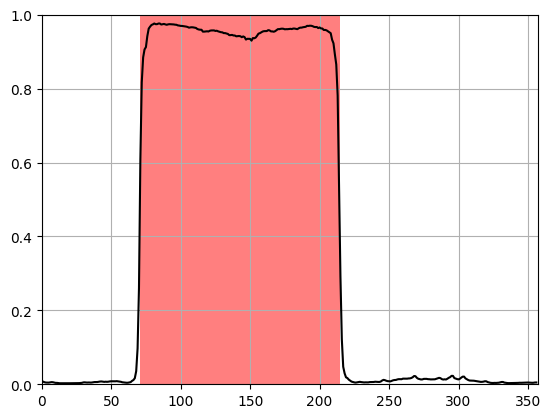

ENST00000529239
recall: 0.690095841884613
iou: 0.60447758436203
biotype: pseudogene
IP_572677  :  {'start': 0, 'stop': 606, 'MS': 18, 'TE': 0, 'frame': 1}
IP_572681  :  {'start': 67, 'stop': 196, 'MS': 0, 'TE': 0, 'frame': 2}
IP_572682  :  {'start': 250, 'stop': 373, 'MS': 0, 'TE': 0, 'frame': 2}
IP_572680  :  {'start': 475, 'stop': 772, 'MS': 0, 'TE': 0, 'frame': 2}
IP_572678  :  {'start': 1185, 'stop': 1518, 'MS': 6, 'TE': 0, 'frame': 1}
IP_572679  :  {'start': 1252, 'stop': 1351, 'MS': 0, 'TE': 0, 'frame': 2}
IP_572683  :  {'start': 1420, 'stop': 1510, 'MS': 0, 'TE': 0, 'frame': 2}
IP_572676  :  {'start': 1653, 'stop': 1881, 'MS': 0, 'TE': 0, 'frame': 1}


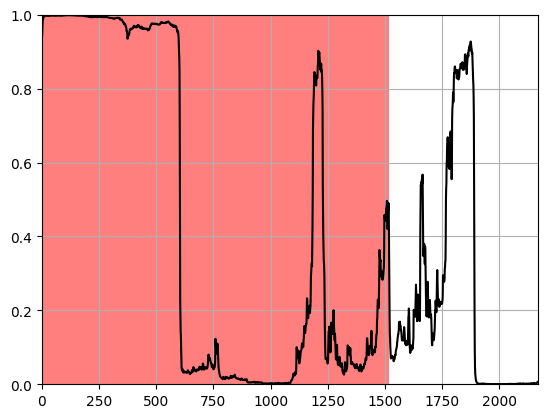

ENST00000517342
recall: 0.6918767690658569
iou: 0.4236706793308258
biotype: pseudogene
IP_572772  :  {'start': 375, 'stop': 732, 'MS': 3, 'TE': 0, 'frame': 1}
IP_572774  :  {'start': 751, 'stop': 895, 'MS': 0, 'TE': 0, 'frame': 2}
IP_572773  :  {'start': 783, 'stop': 1161, 'MS': 0, 'TE': 0, 'frame': 1}


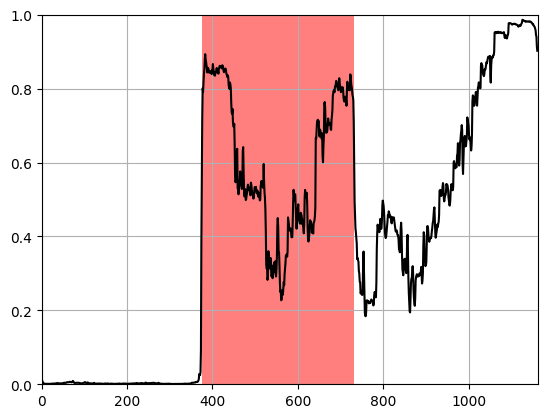

ENST00000513394
recall: 0.0
iou: 0.0
biotype: pseudogene
IP_572780  :  {'start': 135, 'stop': 288, 'MS': 11, 'TE': 0, 'frame': 1}
IP_572781  :  {'start': 481, 'stop': 571, 'MS': 1, 'TE': 0, 'frame': 2}


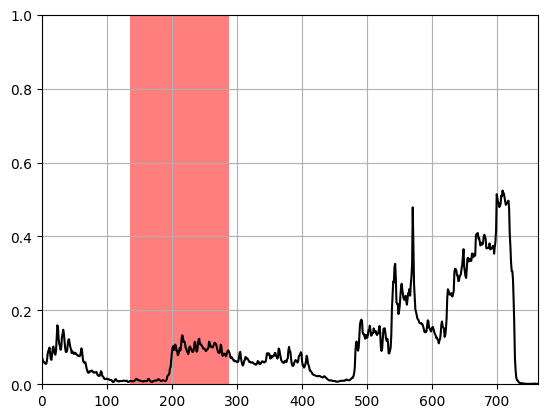

ENST00000438529
recall: 0.0
iou: 0.0
biotype: pseudogene
IP_581091  :  {'start': 275, 'stop': 548, 'MS': 1, 'TE': 0, 'frame': 3}
IP_581088  :  {'start': 547, 'stop': 895, 'MS': 1, 'TE': 0, 'frame': 2}
IP_581090  :  {'start': 842, 'stop': 944, 'MS': 0, 'TE': 0, 'frame': 3}
IP_581089  :  {'start': 934, 'stop': 1051, 'MS': 3, 'TE': 0, 'frame': 2}


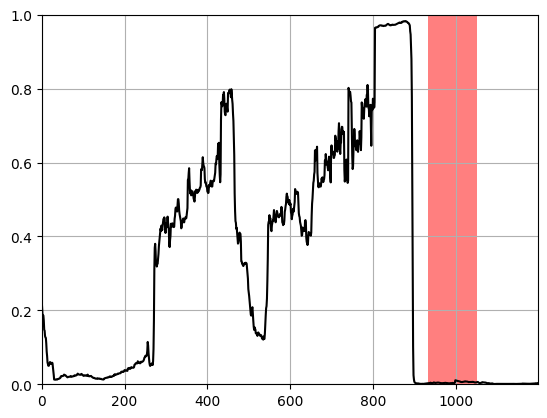

ENST00000423953
recall: 0.9036144614219666
iou: 0.9020618796348572
biotype: pseudogene
IP_581739  :  {'start': 0, 'stop': 594, 'MS': 3, 'TE': 0, 'frame': 1}
IP_581741  :  {'start': 532, 'stop': 703, 'MS': 2, 'TE': 0, 'frame': 2}
IP_581743  :  {'start': 671, 'stop': 797, 'MS': 0, 'TE': 0, 'frame': 3}
IP_581742  :  {'start': 730, 'stop': 1189, 'MS': 5, 'TE': 0, 'frame': 2}
IP_581740  :  {'start': 1176, 'stop': 1350, 'MS': 0, 'TE': 0, 'frame': 1}


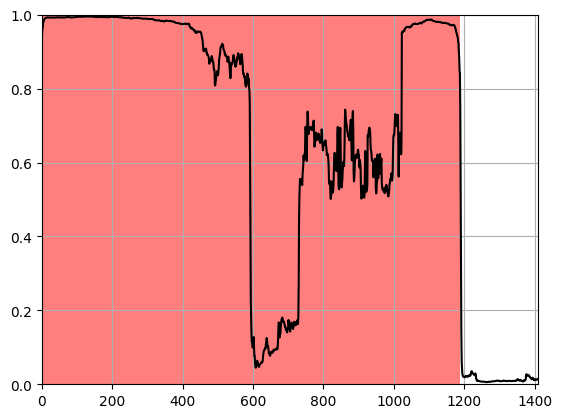

ENST00000434232
recall: 1.0
iou: 1.0
biotype: pseudogene
IP_581769  :  {'start': 0, 'stop': 420, 'MS': 2, 'TE': 0, 'frame': 1}
IP_581771  :  {'start': 97, 'stop': 190, 'MS': 0, 'TE': 0, 'frame': 2}
IP_581770  :  {'start': 565, 'stop': 688, 'MS': 0, 'TE': 0, 'frame': 2}


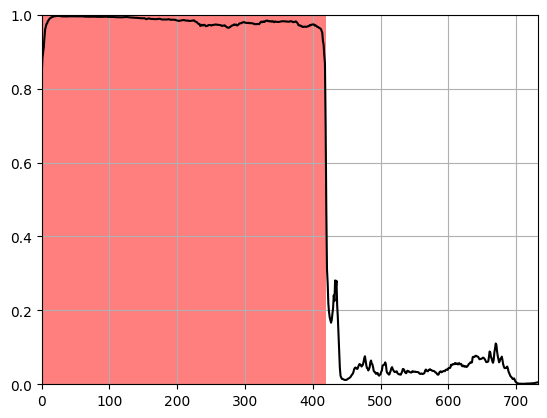

ENST00000444025
recall: 0.784679114818573
iou: 0.7633433938026428
biotype: pseudogene
IP_584319  :  {'start': 16, 'stop': 259, 'MS': 0, 'TE': 0, 'frame': 2}
IP_584318  :  {'start': 60, 'stop': 156, 'MS': 0, 'TE': 0, 'frame': 1}
IP_584317  :  {'start': 639, 'stop': 744, 'MS': 0, 'TE': 0, 'frame': 1}
IP_584321  :  {'start': 716, 'stop': 1067, 'MS': 2, 'TE': 0, 'frame': 3}
IP_584320  :  {'start': 1069, 'stop': 1684, 'MS': 8, 'TE': 0, 'frame': 2}


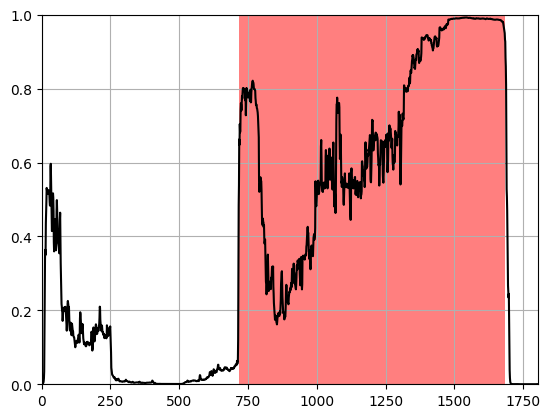

ENST00000441609
recall: 0.9979736804962158
iou: 0.9959555268287659
biotype: pseudogene
IP_586908  :  {'start': 0, 'stop': 156, 'MS': 0, 'TE': 0, 'frame': 1}
IP_586912  :  {'start': 103, 'stop': 565, 'MS': 7, 'TE': 0, 'frame': 2}
IP_586913  :  {'start': 614, 'stop': 716, 'MS': 0, 'TE': 0, 'frame': 3}
IP_586909  :  {'start': 661, 'stop': 829, 'MS': 0, 'TE': 0, 'frame': 2}
IP_586907  :  {'start': 825, 'stop': 1350, 'MS': 3, 'TE': 0, 'frame': 1}
IP_586911  :  {'start': 907, 'stop': 1030, 'MS': 0, 'TE': 0, 'frame': 2}
IP_586910  :  {'start': 1177, 'stop': 1288, 'MS': 0, 'TE': 0, 'frame': 2}


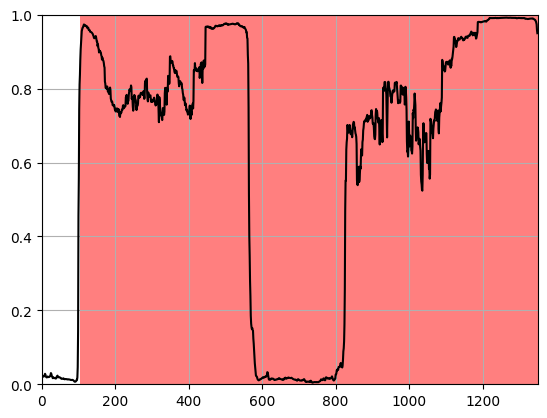

ENST00000428694
recall: 0.9947090148925781
iou: 0.9894737005233765
biotype: pseudogene
IP_587038  :  {'start': 161, 'stop': 350, 'MS': 3, 'TE': 0, 'frame': 3}
IP_587036  :  {'start': 408, 'stop': 531, 'MS': 0, 'TE': 0, 'frame': 1}
IP_587037  :  {'start': 530, 'stop': 770, 'MS': 0, 'TE': 0, 'frame': 3}


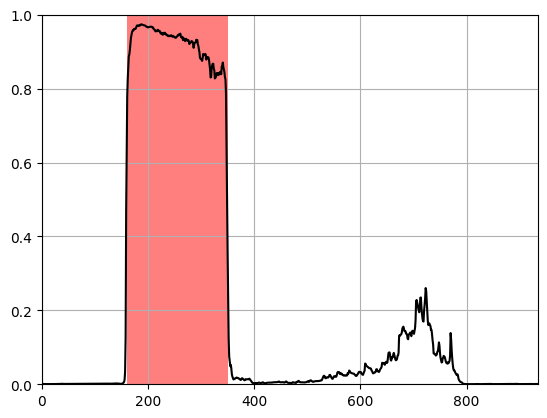

ENST00000405771
recall: 0.14685314893722534
iou: 0.14685314893722534
biotype: pseudogene
IP_589447  :  {'start': 176, 'stop': 317, 'MS': 0, 'TE': 0, 'frame': 3}
IP_589443  :  {'start': 349, 'stop': 592, 'MS': 4, 'TE': 1, 'frame': 2}
IP_589441  :  {'start': 540, 'stop': 705, 'MS': 3, 'TE': 0, 'frame': 1}
IP_589445  :  {'start': 658, 'stop': 757, 'MS': 0, 'TE': 0, 'frame': 2}
IP_589446  :  {'start': 704, 'stop': 1064, 'MS': 3, 'TE': 0, 'frame': 3}
IP_589442  :  {'start': 981, 'stop': 1104, 'MS': 0, 'TE': 0, 'frame': 1}
IP_589444  :  {'start': 1168, 'stop': 1297, 'MS': 0, 'TE': 0, 'frame': 2}


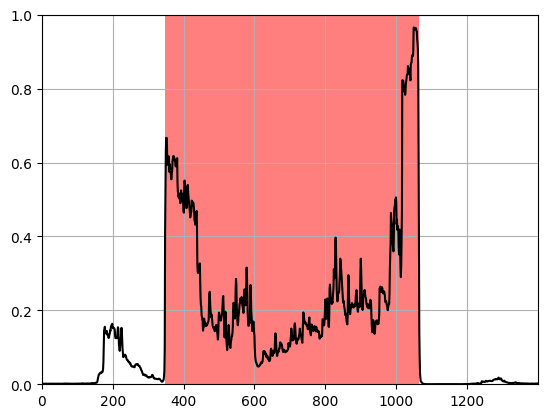

ENST00000403835
recall: 0.0
iou: 0.0
biotype: pseudogene
IP_591210  :  {'start': 161, 'stop': 272, 'MS': 5, 'TE': 0, 'frame': 3}
IP_591209  :  {'start': 564, 'stop': 720, 'MS': 0, 'TE': 0, 'frame': 1}


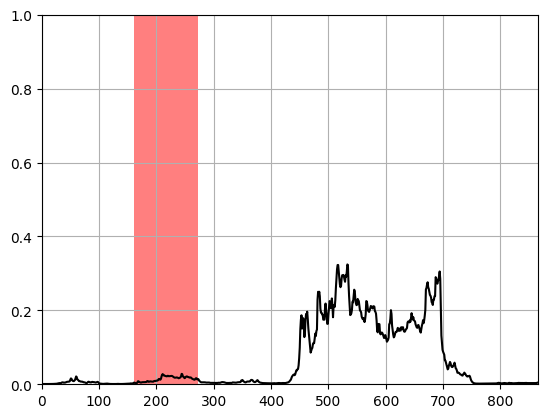

ENST00000403105
recall: 0.32058823108673096
iou: 0.2471655309200287
biotype: pseudogene
IP_592086  :  {'start': 0, 'stop': 123, 'MS': 0, 'TE': 0, 'frame': 1}
IP_592084  :  {'start': 240, 'stop': 381, 'MS': 5, 'TE': 0, 'frame': 1}
IP_592088  :  {'start': 364, 'stop': 580, 'MS': 4, 'TE': 0, 'frame': 2}
IP_592085  :  {'start': 576, 'stop': 696, 'MS': 0, 'TE': 0, 'frame': 1}
IP_592089  :  {'start': 596, 'stop': 722, 'MS': 0, 'TE': 0, 'frame': 3}
IP_592087  :  {'start': 739, 'stop': 874, 'MS': 0, 'TE': 0, 'frame': 2}


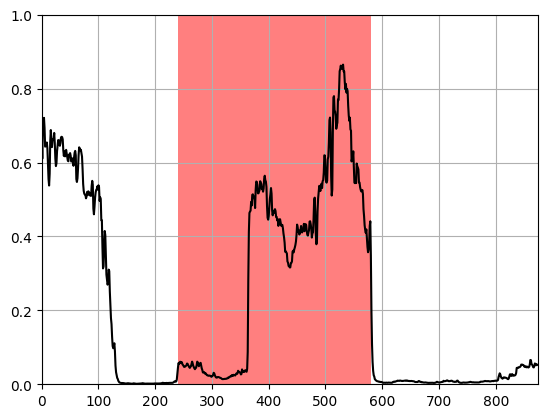

ENST00000457653
recall: 0.9893791079521179
iou: 0.3713584840297699
biotype: pseudogene
IP_592490  :  {'start': 0, 'stop': 540, 'MS': 0, 'TE': 0, 'frame': 1}
IP_140783  :  {'start': 19, 'stop': 142, 'MS': 1, 'TE': 0, 'frame': 2}
IP_592484  :  {'start': 101, 'stop': 209, 'MS': 0, 'TE': 0, 'frame': 3}
IP_592493  :  {'start': 371, 'stop': 488, 'MS': 0, 'TE': 0, 'frame': 3}
IP_3421895  :  {'start': 590, 'stop': 1814, 'MS': 2, 'TE': 0, 'frame': 3}
IP_592489  :  {'start': 966, 'stop': 1071, 'MS': 0, 'TE': 0, 'frame': 1}
IP_592491  :  {'start': 1273, 'stop': 1417, 'MS': 0, 'TE': 0, 'frame': 2}
IP_592481  :  {'start': 1536, 'stop': 1632, 'MS': 0, 'TE': 0, 'frame': 1}
IP_592492  :  {'start': 1834, 'stop': 2101, 'MS': 0, 'TE': 0, 'frame': 2}
IP_592495  :  {'start': 1874, 'stop': 2498, 'MS': 0, 'TE': 0, 'frame': 3}
IP_592474  :  {'start': 2511, 'stop': 2607, 'MS': 0, 'TE': 0, 'frame': 1}


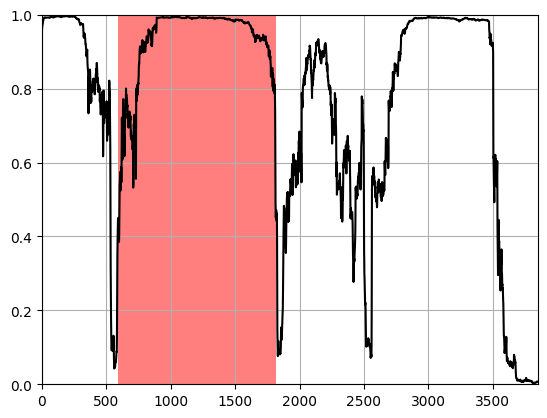

ENST00000403917
recall: 0.0
iou: 0.0
biotype: pseudogene
IP_593032  :  {'start': 63, 'stop': 174, 'MS': 0, 'TE': 0, 'frame': 1}
IP_593033  :  {'start': 67, 'stop': 262, 'MS': 0, 'TE': 0, 'frame': 2}
IP_593035  :  {'start': 377, 'stop': 488, 'MS': 2, 'TE': 0, 'frame': 3}
IP_593031  :  {'start': 393, 'stop': 525, 'MS': 0, 'TE': 0, 'frame': 1}
IP_593034  :  {'start': 466, 'stop': 625, 'MS': 0, 'TE': 0, 'frame': 2}


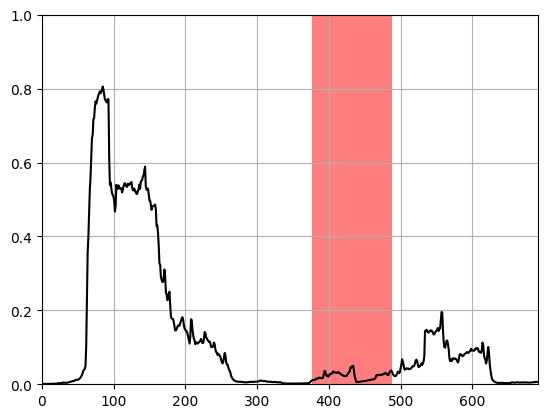

ENST00000402854
recall: 0.5214866399765015
iou: 0.5208816528320312
biotype: pseudogene
IP_595290  :  {'start': 17, 'stop': 410, 'MS': 53, 'TE': 0, 'frame': 3}
IP_595287  :  {'start': 189, 'stop': 378, 'MS': 0, 'TE': 0, 'frame': 1}
IP_595289  :  {'start': 430, 'stop': 625, 'MS': 8, 'TE': 0, 'frame': 2}
IP_595288  :  {'start': 744, 'stop': 1017, 'MS': 2, 'TE': 0, 'frame': 1}


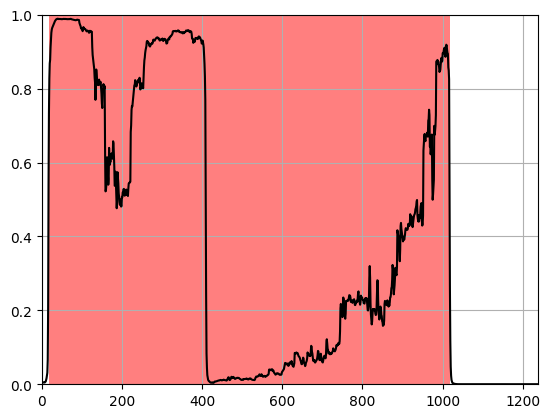

ENST00000404856
recall: 0.8728395104408264
iou: 0.4415990114212036
biotype: pseudogene
IP_595411  :  {'start': 0, 'stop': 732, 'MS': 0, 'TE': 0, 'frame': 1}
IP_595415  :  {'start': 358, 'stop': 511, 'MS': 0, 'TE': 0, 'frame': 2}
IP_595416  :  {'start': 737, 'stop': 863, 'MS': 0, 'TE': 0, 'frame': 3}
IP_595410  :  {'start': 786, 'stop': 1596, 'MS': 2, 'TE': 0, 'frame': 1}
IP_595412  :  {'start': 892, 'stop': 1036, 'MS': 0, 'TE': 0, 'frame': 2}
IP_595413  :  {'start': 1186, 'stop': 1309, 'MS': 0, 'TE': 0, 'frame': 2}
IP_595414  :  {'start': 1360, 'stop': 1555, 'MS': 0, 'TE': 0, 'frame': 2}


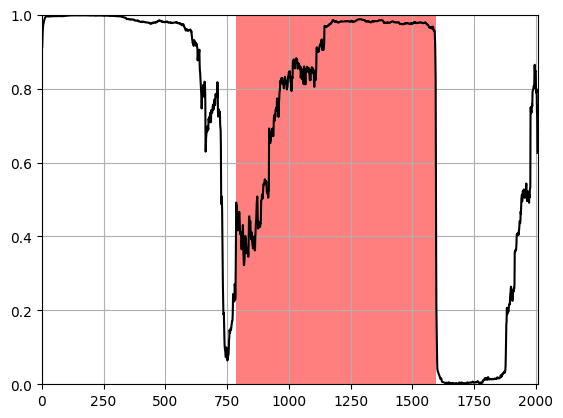

ENST00000441966
recall: 0.9964538812637329
iou: 0.7563930153846741
biotype: pseudogene
IP_597136  :  {'start': 0, 'stop': 183, 'MS': 1, 'TE': 0, 'frame': 1}
IP_597137  :  {'start': 179, 'stop': 287, 'MS': 0, 'TE': 0, 'frame': 3}
IP_597138  :  {'start': 320, 'stop': 884, 'MS': 3, 'TE': 0, 'frame': 3}
IP_597135  :  {'start': 894, 'stop': 1134, 'MS': 0, 'TE': 0, 'frame': 1}


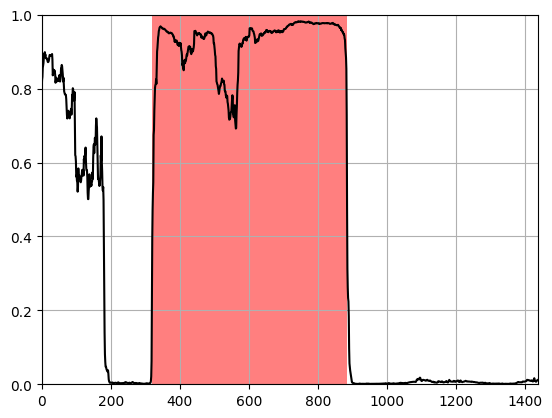

ENST00000508316
recall: 0.9971181750297546
iou: 0.938517153263092
biotype: pseudogene
IP_601720  :  {'start': 1, 'stop': 589, 'MS': 3, 'TE': 0, 'frame': 2}
IP_601725  :  {'start': 170, 'stop': 284, 'MS': 0, 'TE': 0, 'frame': 3}
IP_601723  :  {'start': 311, 'stop': 440, 'MS': 1, 'TE': 0, 'frame': 3}
IP_601724  :  {'start': 854, 'stop': 1010, 'MS': 0, 'TE': 0, 'frame': 3}
IP_601722  :  {'start': 1340, 'stop': 1793, 'MS': 3, 'TE': 0, 'frame': 3}
IP_601721  :  {'start': 1519, 'stop': 1642, 'MS': 0, 'TE': 0, 'frame': 2}


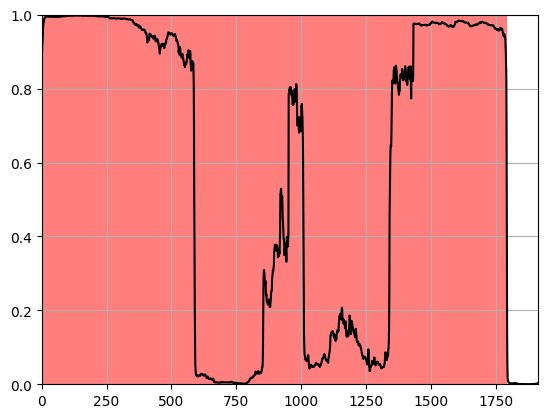

ENST00000505780
recall: 0.5784313678741455
iou: 0.3511904776096344
biotype: pseudogene
IP_602892  :  {'start': 56, 'stop': 236, 'MS': 0, 'TE': 0, 'frame': 3}
IP_602891  :  {'start': 67, 'stop': 169, 'MS': 4, 'TE': 0, 'frame': 2}


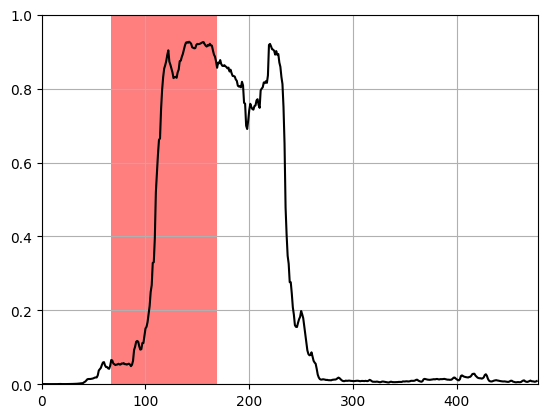

ENST00000504812
recall: 0.0
iou: 0.0
biotype: pseudogene
IP_603073  :  {'start': 2, 'stop': 131, 'MS': 0, 'TE': 0, 'frame': 3}
IP_603066  :  {'start': 144, 'stop': 387, 'MS': 0, 'TE': 0, 'frame': 1}
IP_603069  :  {'start': 316, 'stop': 412, 'MS': 1, 'TE': 0, 'frame': 2}
IP_603072  :  {'start': 398, 'stop': 593, 'MS': 25, 'TE': 0, 'frame': 3}
IP_603067  :  {'start': 709, 'stop': 895, 'MS': 1, 'TE': 0, 'frame': 2}
IP_603065  :  {'start': 804, 'stop': 984, 'MS': 1, 'TE': 0, 'frame': 1}
IP_603068  :  {'start': 973, 'stop': 1081, 'MS': 0, 'TE': 0, 'frame': 2}
IP_603071  :  {'start': 1094, 'stop': 1358, 'MS': 0, 'TE': 0, 'frame': 3}
IP_603070  :  {'start': 1237, 'stop': 1342, 'MS': 0, 'TE': 0, 'frame': 2}


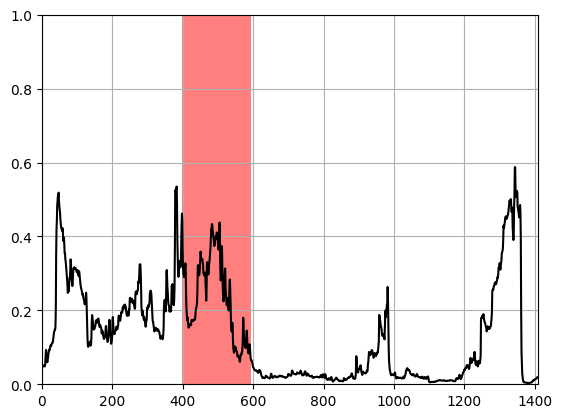

ENST00000513426
recall: 0.5117647051811218
iou: 0.23641304671764374
biotype: pseudogene
IP_603239  :  {'start': 0, 'stop': 384, 'MS': 1, 'TE': 0, 'frame': 1}
IP_603240  :  {'start': 187, 'stop': 697, 'MS': 4, 'TE': 0, 'frame': 2}
IP_603241  :  {'start': 485, 'stop': 659, 'MS': 0, 'TE': 0, 'frame': 3}
IP_603238  :  {'start': 750, 'stop': 1236, 'MS': 1, 'TE': 0, 'frame': 1}


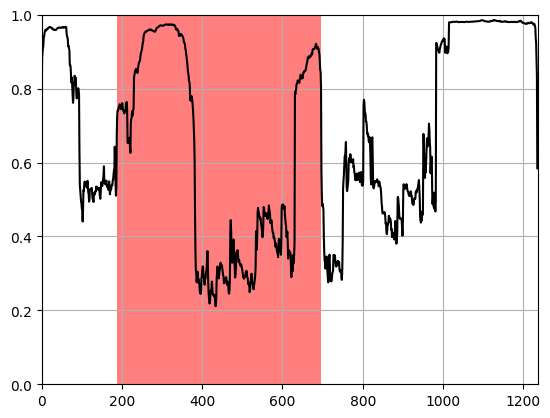

ENST00000497190
recall: 1.0
iou: 1.0
biotype: pseudogene
IP_614011  :  {'start': 0, 'stop': 261, 'MS': 29, 'TE': 0, 'frame': 1}


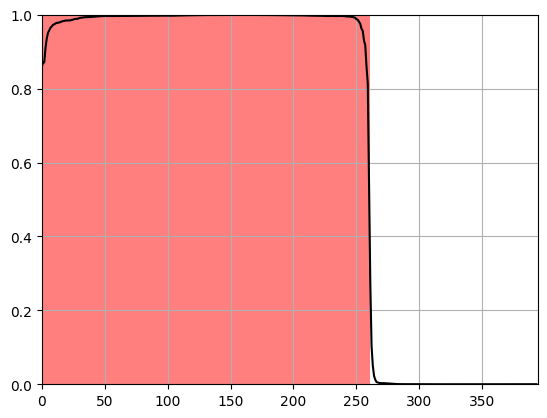

ENST00000513113
recall: 0.27835050225257874
iou: 0.21259842813014984
biotype: pseudogene
IP_614027  :  {'start': 0, 'stop': 189, 'MS': 0, 'TE': 0, 'frame': 1}
IP_614029  :  {'start': 107, 'stop': 398, 'MS': 2, 'TE': 0, 'frame': 3}
IP_614028  :  {'start': 411, 'stop': 528, 'MS': 0, 'TE': 0, 'frame': 1}


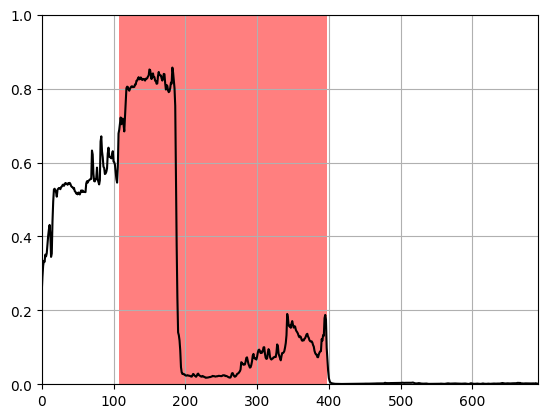

ENST00000512222
recall: 0.6867470145225525
iou: 0.5106382966041565
biotype: pseudogene
IP_614489  :  {'start': 0, 'stop': 357, 'MS': 0, 'TE': 0, 'frame': 1}
IP_614491  :  {'start': 161, 'stop': 251, 'MS': 0, 'TE': 0, 'frame': 3}
IP_614492  :  {'start': 458, 'stop': 839, 'MS': 12, 'TE': 0, 'frame': 3}
IP_614488  :  {'start': 633, 'stop': 1122, 'MS': 3, 'TE': 0, 'frame': 1}
IP_614490  :  {'start': 853, 'stop': 1030, 'MS': 0, 'TE': 0, 'frame': 2}


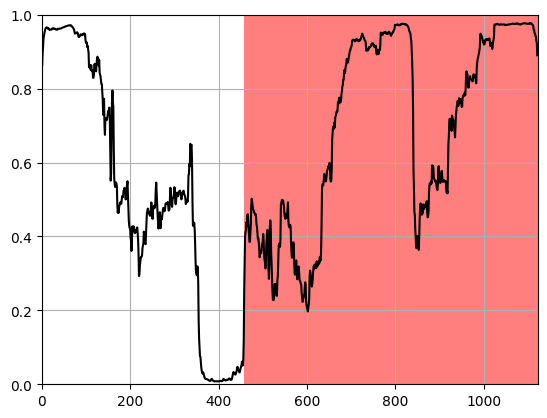

ENST00000512920
recall: 0.17037037014961243
iou: 0.17037037014961243
biotype: pseudogene
IP_614494  :  {'start': 349, 'stop': 463, 'MS': 0, 'TE': 0, 'frame': 2}
IP_614493  :  {'start': 696, 'stop': 831, 'MS': 9, 'TE': 0, 'frame': 1}


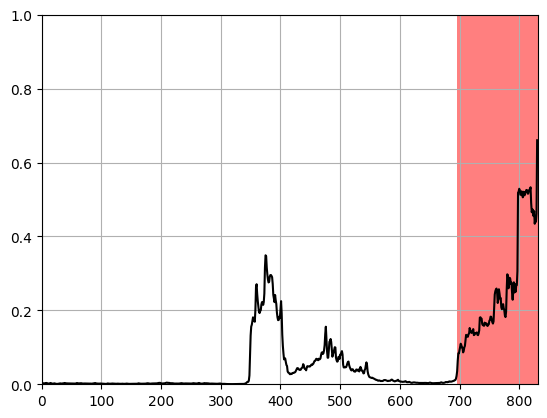

ENST00000440850
recall: 0.9888888597488403
iou: 0.43021148443222046
biotype: pseudogene
IP_619685  :  {'start': 269, 'stop': 380, 'MS': 0, 'TE': 1, 'frame': 3}
IP_619732  :  {'start': 345, 'stop': 963, 'MS': 0, 'TE': 0, 'frame': 1}
IP_619735  :  {'start': 472, 'stop': 682, 'MS': 0, 'TE': 0, 'frame': 2}
IP_619734  :  {'start': 838, 'stop': 1441, 'MS': 0, 'TE': 0, 'frame': 2}
IP_619736  :  {'start': 905, 'stop': 1046, 'MS': 0, 'TE': 0, 'frame': 3}
IP_619737  :  {'start': 1280, 'stop': 2000, 'MS': 4, 'TE': 0, 'frame': 3}
IP_619733  :  {'start': 1743, 'stop': 1938, 'MS': 0, 'TE': 0, 'frame': 1}


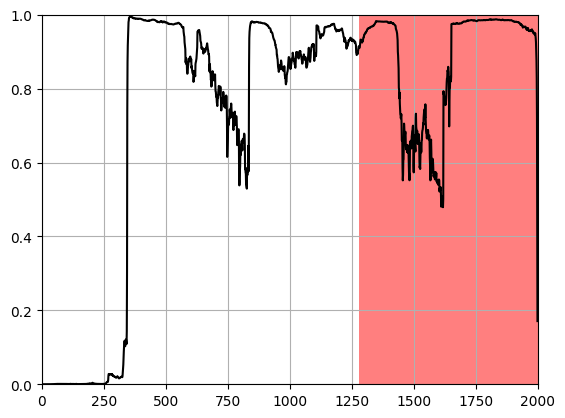

ENST00000629942
recall: 1.0
iou: 0.12696492671966553
biotype: pseudogene


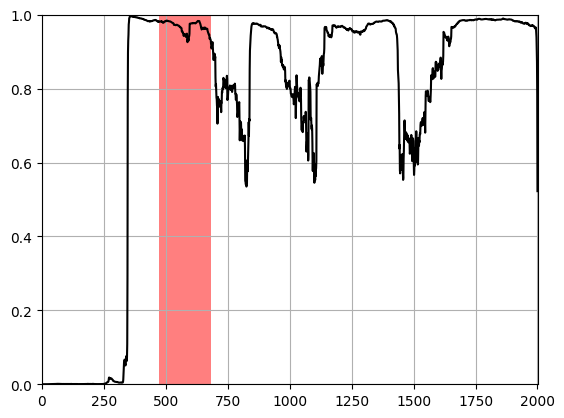

ENST00000397646
recall: 0.0
iou: 0.0
biotype: pseudogene
IP_620039  :  {'start': 208, 'stop': 313, 'MS': 0, 'TE': 0, 'frame': 2}
IP_620040  :  {'start': 637, 'stop': 820, 'MS': 5, 'TE': 0, 'frame': 2}
IP_620037  :  {'start': 1005, 'stop': 1146, 'MS': 0, 'TE': 0, 'frame': 1}
IP_620038  :  {'start': 1009, 'stop': 1111, 'MS': 0, 'TE': 0, 'frame': 2}


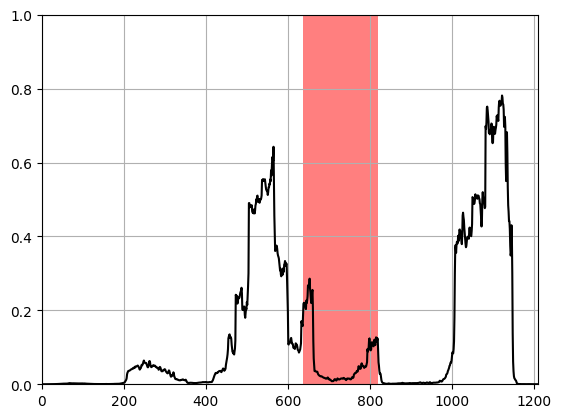

ENST00000422486
recall: 1.0
iou: 0.7657458782196045
biotype: pseudogene
IP_620408  :  {'start': 216, 'stop': 909, 'MS': 3, 'TE': 0, 'frame': 1}
IP_620409  :  {'start': 364, 'stop': 568, 'MS': 0, 'TE': 0, 'frame': 2}
IP_620407  :  {'start': 972, 'stop': 1284, 'MS': 0, 'TE': 0, 'frame': 1}
IP_620410  :  {'start': 991, 'stop': 1135, 'MS': 0, 'TE': 0, 'frame': 2}


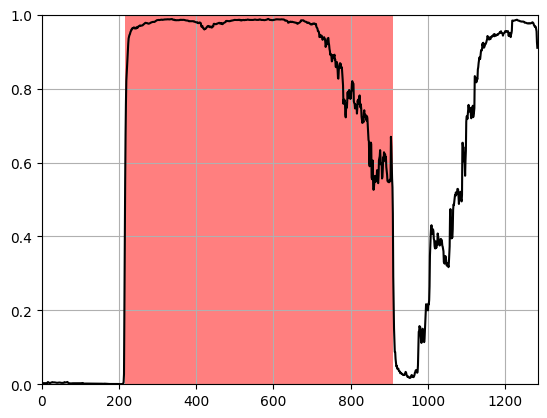

ENST00000463294
recall: 0.4566666781902313
iou: 0.4566666781902313
biotype: pseudogene
IP_622475  :  {'start': 165, 'stop': 273, 'MS': 0, 'TE': 0, 'frame': 1}
IP_622476  :  {'start': 306, 'stop': 606, 'MS': 12, 'TE': 0, 'frame': 1}
IP_622478  :  {'start': 487, 'stop': 736, 'MS': 0, 'TE': 0, 'frame': 2}
IP_622477  :  {'start': 847, 'stop': 937, 'MS': 0, 'TE': 0, 'frame': 2}


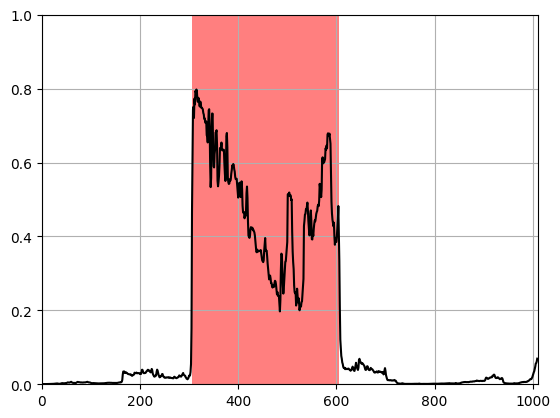

ENST00000492269
recall: 0.014184396713972092
iou: 0.014184396713972092
biotype: pseudogene
IP_623085  :  {'start': 134, 'stop': 275, 'MS': 17, 'TE': 0, 'frame': 3}
IP_623083  :  {'start': 408, 'stop': 546, 'MS': 0, 'TE': 0, 'frame': 1}
IP_623084  :  {'start': 547, 'stop': 805, 'MS': 0, 'TE': 0, 'frame': 2}


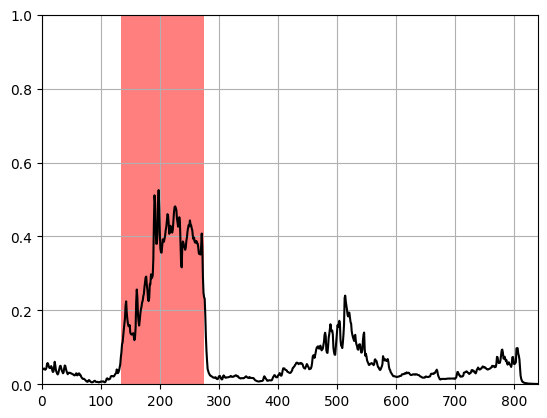

ENST00000473150
recall: 0.997187077999115
iou: 0.8501198887825012
biotype: pseudogene
IP_623199  :  {'start': 0, 'stop': 711, 'MS': 6, 'TE': 0, 'frame': 1}
IP_623201  :  {'start': 655, 'stop': 832, 'MS': 0, 'TE': 0, 'frame': 2}
IP_623200  :  {'start': 738, 'stop': 927, 'MS': 0, 'TE': 0, 'frame': 1}
IP_623203  :  {'start': 836, 'stop': 1232, 'MS': 0, 'TE': 0, 'frame': 3}
IP_623198  :  {'start': 1005, 'stop': 1128, 'MS': 0, 'TE': 0, 'frame': 1}
IP_623202  :  {'start': 1186, 'stop': 1456, 'MS': 0, 'TE': 0, 'frame': 2}
IP_623204  :  {'start': 1283, 'stop': 1394, 'MS': 0, 'TE': 0, 'frame': 3}


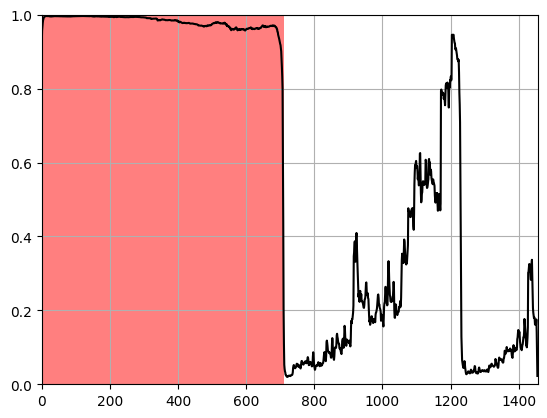

ENST00000472163
recall: 1.0
iou: 0.9921524524688721
biotype: pseudogene
IP_092486  :  {'start': 89, 'stop': 179, 'MS': 0, 'TE': 0, 'frame': 3}
IP_623330  :  {'start': 117, 'stop': 1002, 'MS': 4, 'TE': 0, 'frame': 1}
IP_623331  :  {'start': 643, 'stop': 904, 'MS': 0, 'TE': 0, 'frame': 2}


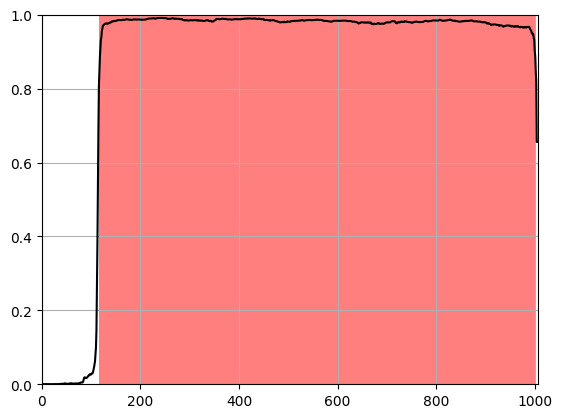

ENST00000483456
recall: 0.7142857313156128
iou: 0.7142857313156128
biotype: pseudogene
IP_623591  :  {'start': 0, 'stop': 270, 'MS': 4, 'TE': 0, 'frame': 1}
IP_623594  :  {'start': 296, 'stop': 404, 'MS': 4, 'TE': 0, 'frame': 3}
IP_623592  :  {'start': 303, 'stop': 396, 'MS': 0, 'TE': 0, 'frame': 1}
IP_623593  :  {'start': 400, 'stop': 493, 'MS': 0, 'TE': 0, 'frame': 2}


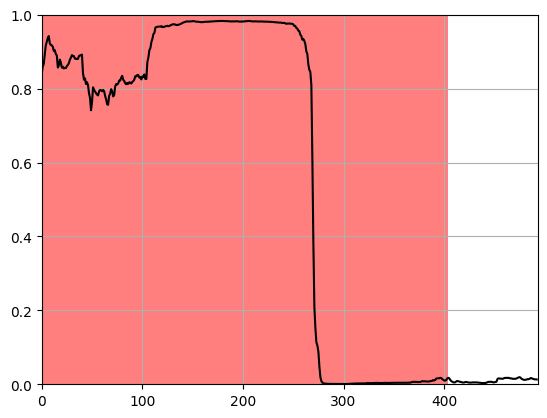

ENST00000459980
recall: 0.4107142984867096
iou: 0.4035087823867798
biotype: pseudogene
IP_623945  :  {'start': 193, 'stop': 298, 'MS': 0, 'TE': 0, 'frame': 2}
IP_623944  :  {'start': 531, 'stop': 651, 'MS': 0, 'TE': 0, 'frame': 1}
IP_623946  :  {'start': 614, 'stop': 782, 'MS': 5, 'TE': 0, 'frame': 3}


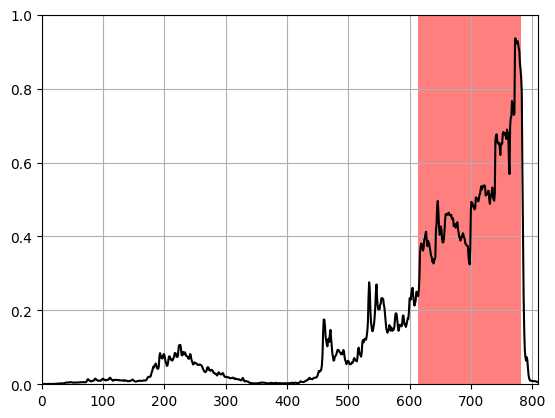

ENST00000413425
recall: 0.6086387634277344
iou: 0.4682779312133789
biotype: pseudogene
IP_626015  :  {'start': 0, 'stop': 465, 'MS': 2, 'TE': 0, 'frame': 1}
IP_626017  :  {'start': 253, 'stop': 385, 'MS': 0, 'TE': 0, 'frame': 2}
IP_626013  :  {'start': 498, 'stop': 612, 'MS': 2, 'TE': 0, 'frame': 1}
IP_626018  :  {'start': 560, 'stop': 797, 'MS': 5, 'TE': 0, 'frame': 3}
IP_626014  :  {'start': 1005, 'stop': 1128, 'MS': 0, 'TE': 0, 'frame': 1}
IP_626016  :  {'start': 1275, 'stop': 1386, 'MS': 0, 'TE': 0, 'frame': 1}


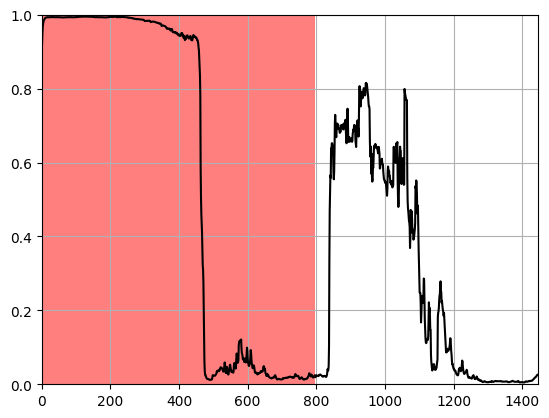

ENST00000445875
recall: 0.0
iou: 0.0
biotype: pseudogene
IP_634931  :  {'start': 0, 'stop': 162, 'MS': 0, 'TE': 0, 'frame': 1}
IP_634932  :  {'start': 109, 'stop': 319, 'MS': 0, 'TE': 0, 'frame': 2}
IP_634933  :  {'start': 278, 'stop': 461, 'MS': 0, 'TE': 0, 'frame': 3}
IP_634930  :  {'start': 384, 'stop': 564, 'MS': 2, 'TE': 0, 'frame': 1}


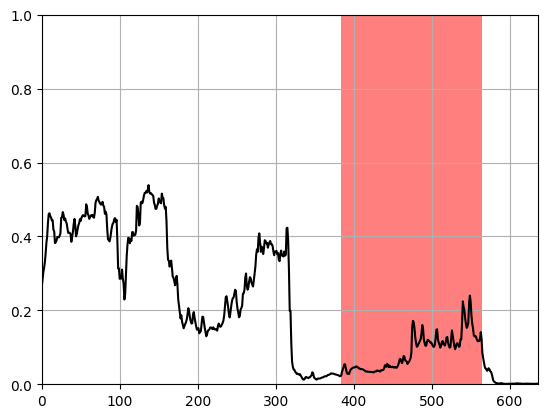

ENST00000440938
recall: 1.0
iou: 1.0
biotype: pseudogene
IP_635568  :  {'start': 0, 'stop': 498, 'MS': 4, 'TE': 0, 'frame': 1}
IP_635569  :  {'start': 304, 'stop': 397, 'MS': 0, 'TE': 0, 'frame': 2}


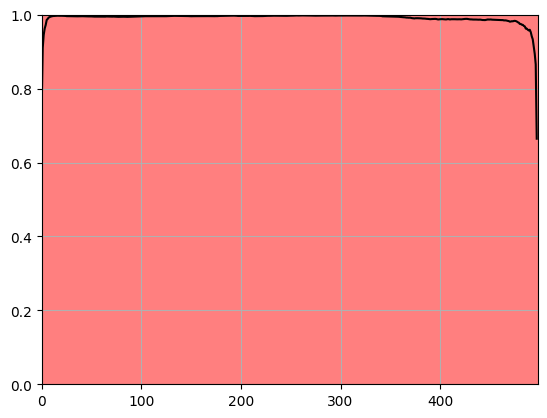

ENST00000471997
recall: 0.7258333563804626
iou: 0.6710323691368103
biotype: pseudogene
IP_636117  :  {'start': 0, 'stop': 171, 'MS': 0, 'TE': 0, 'frame': 1}
IP_636115  :  {'start': 393, 'stop': 486, 'MS': 0, 'TE': 0, 'frame': 1}
IP_636121  :  {'start': 467, 'stop': 1277, 'MS': 2, 'TE': 0, 'frame': 3}
IP_636116  :  {'start': 486, 'stop': 591, 'MS': 0, 'TE': 0, 'frame': 1}
IP_636119  :  {'start': 1144, 'stop': 1369, 'MS': 0, 'TE': 0, 'frame': 2}
IP_636120  :  {'start': 1346, 'stop': 1736, 'MS': 3, 'TE': 0, 'frame': 3}
IP_636118  :  {'start': 1393, 'stop': 1492, 'MS': 0, 'TE': 0, 'frame': 2}
IP_636114  :  {'start': 1455, 'stop': 1554, 'MS': 0, 'TE': 0, 'frame': 1}


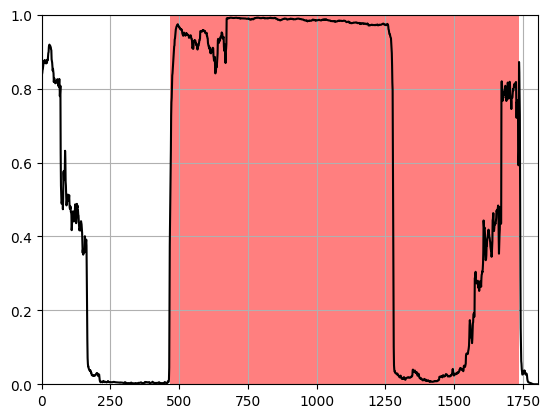

ENST00000397284
recall: 0.6603773832321167
iou: 0.6603773832321167
biotype: pseudogene
IP_637309  :  {'start': 109, 'stop': 229, 'MS': 0, 'TE': 0, 'frame': 2}
IP_637310  :  {'start': 206, 'stop': 338, 'MS': 0, 'TE': 0, 'frame': 3}
IP_637308  :  {'start': 243, 'stop': 402, 'MS': 55, 'TE': 0, 'frame': 1}


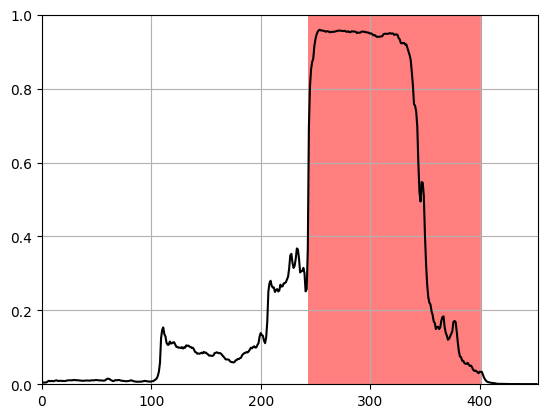

ENST00000424978
recall: 0.9942528605461121
iou: 0.7972350120544434
biotype: pseudogene
IP_638041  :  {'start': 2, 'stop': 173, 'MS': 0, 'TE': 0, 'frame': 3}
IP_638039  :  {'start': 82, 'stop': 430, 'MS': 2, 'TE': 0, 'frame': 2}
IP_638040  :  {'start': 607, 'stop': 721, 'MS': 0, 'TE': 0, 'frame': 2}
IP_638038  :  {'start': 784, 'stop': 1030, 'MS': 0, 'TE': 0, 'frame': 2}
IP_638037  :  {'start': 819, 'stop': 1071, 'MS': 0, 'TE': 0, 'frame': 1}
IP_638042  :  {'start': 890, 'stop': 989, 'MS': 0, 'TE': 0, 'frame': 3}


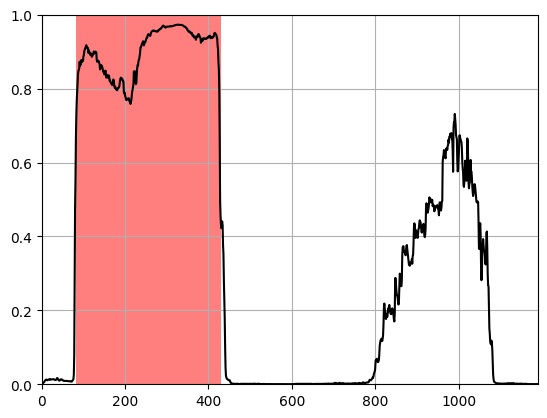

ENST00000445234
recall: 1.0
iou: 0.882446825504303
biotype: pseudogene
IP_638065  :  {'start': 51, 'stop': 1710, 'MS': 2, 'TE': 0, 'frame': 1}
IP_638071  :  {'start': 583, 'stop': 742, 'MS': 0, 'TE': 0, 'frame': 2}
IP_638072  :  {'start': 857, 'stop': 947, 'MS': 0, 'TE': 0, 'frame': 3}
IP_638067  :  {'start': 877, 'stop': 1039, 'MS': 0, 'TE': 0, 'frame': 2}
IP_638070  :  {'start': 1207, 'stop': 1345, 'MS': 0, 'TE': 0, 'frame': 2}
IP_638066  :  {'start': 1351, 'stop': 1495, 'MS': 0, 'TE': 0, 'frame': 2}
IP_638069  :  {'start': 1756, 'stop': 1846, 'MS': 0, 'TE': 0, 'frame': 2}
IP_638068  :  {'start': 2230, 'stop': 2323, 'MS': 0, 'TE': 0, 'frame': 2}


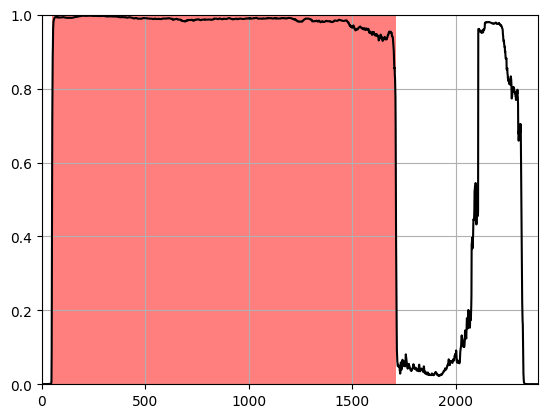

ENST00000439895
recall: 0.7473118305206299
iou: 0.7032040357589722
biotype: pseudogene
IP_638891  :  {'start': 0, 'stop': 231, 'MS': 9, 'TE': 0, 'frame': 1}
IP_638894  :  {'start': 227, 'stop': 461, 'MS': 0, 'TE': 0, 'frame': 3}
IP_638893  :  {'start': 334, 'stop': 661, 'MS': 5, 'TE': 0, 'frame': 2}
IP_638890  :  {'start': 513, 'stop': 657, 'MS': 0, 'TE': 0, 'frame': 1}
IP_638895  :  {'start': 881, 'stop': 1145, 'MS': 0, 'TE': 0, 'frame': 3}
IP_638892  :  {'start': 1122, 'stop': 1221, 'MS': 0, 'TE': 0, 'frame': 1}


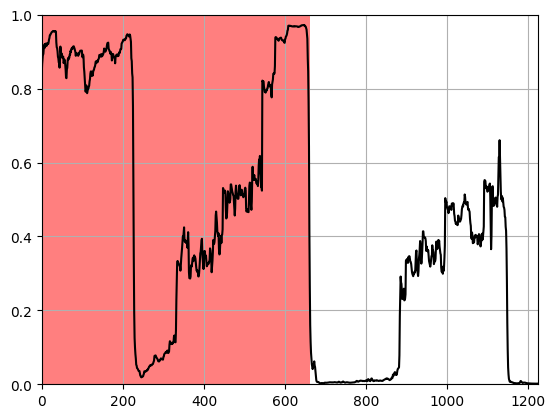

ENST00000458718
recall: 1.0
iou: 1.0
biotype: pseudogene
IP_653288  :  {'start': 76, 'stop': 280, 'MS': 3, 'TE': 0, 'frame': 2}


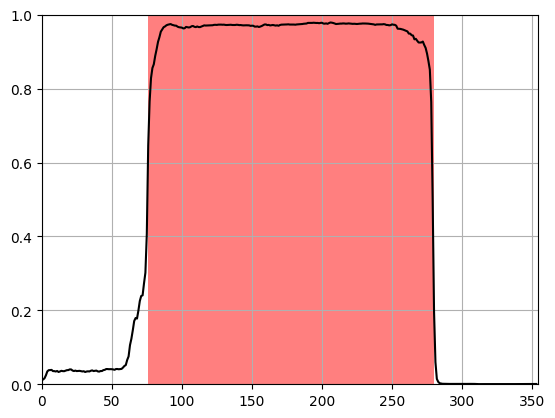

ENST00000616842
recall: 0.961904764175415
iou: 0.5188356041908264
biotype: pseudogene
IP_653555  :  {'start': 92, 'stop': 407, 'MS': 5, 'TE': 0, 'frame': 3}
IP_653556  :  {'start': 665, 'stop': 935, 'MS': 0, 'TE': 0, 'frame': 3}
IP_653553  :  {'start': 978, 'stop': 1134, 'MS': 0, 'TE': 0, 'frame': 1}
IP_653554  :  {'start': 1303, 'stop': 1417, 'MS': 0, 'TE': 0, 'frame': 2}


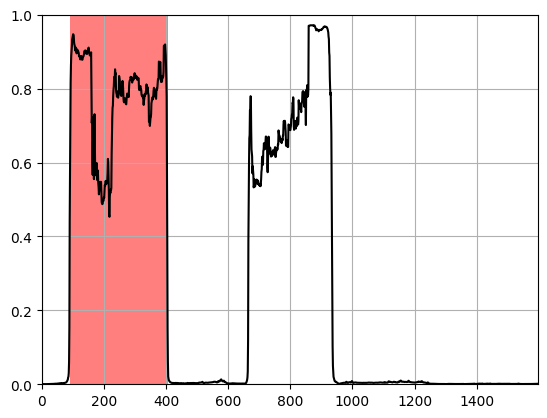

ENST00000438116
recall: 0.0
iou: 0.0
biotype: pseudogene
IP_653670  :  {'start': 4, 'stop': 115, 'MS': 0, 'TE': 0, 'frame': 2}
IP_653664  :  {'start': 303, 'stop': 438, 'MS': 0, 'TE': 0, 'frame': 1}
IP_653671  :  {'start': 368, 'stop': 530, 'MS': 0, 'TE': 0, 'frame': 3}
IP_653669  :  {'start': 415, 'stop': 562, 'MS': 0, 'TE': 0, 'frame': 2}
IP_653666  :  {'start': 558, 'stop': 765, 'MS': 0, 'TE': 2, 'frame': 1}
IP_653668  :  {'start': 829, 'stop': 922, 'MS': 0, 'TE': 0, 'frame': 2}
IP_653672  :  {'start': 959, 'stop': 1202, 'MS': 0, 'TE': 0, 'frame': 3}
IP_653665  :  {'start': 978, 'stop': 1122, 'MS': 0, 'TE': 0, 'frame': 1}
IP_653667  :  {'start': 1134, 'stop': 1263, 'MS': 0, 'TE': 0, 'frame': 1}


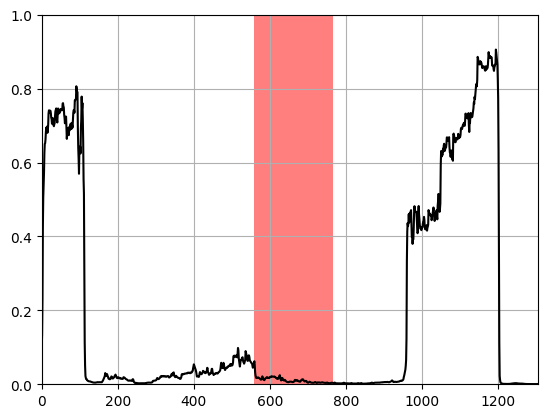

ENST00000428790
recall: 0.3928571343421936
iou: 0.34020617604255676
biotype: pseudogene
IP_657543  :  {'start': 4, 'stop': 208, 'MS': 1, 'TE': 0, 'frame': 2}
IP_657542  :  {'start': 123, 'stop': 222, 'MS': 0, 'TE': 0, 'frame': 1}
IP_657544  :  {'start': 241, 'stop': 577, 'MS': 3, 'TE': 0, 'frame': 2}


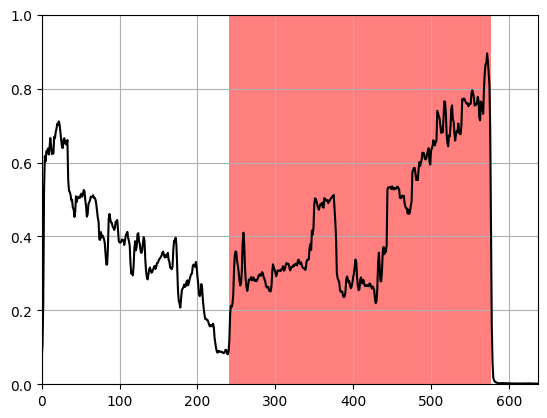

ENST00000406845
recall: 0.0
iou: 0.0
biotype: pseudogene
IP_658325  :  {'start': 145, 'stop': 265, 'MS': 0, 'TE': 0, 'frame': 2}
IP_658328  :  {'start': 311, 'stop': 641, 'MS': 0, 'TE': 0, 'frame': 3}
IP_658326  :  {'start': 673, 'stop': 796, 'MS': 0, 'TE': 0, 'frame': 2}
IP_658330  :  {'start': 728, 'stop': 1049, 'MS': 0, 'TE': 0, 'frame': 3}
IP_658323  :  {'start': 930, 'stop': 1020, 'MS': 0, 'TE': 0, 'frame': 1}
IP_658327  :  {'start': 1174, 'stop': 1264, 'MS': 0, 'TE': 0, 'frame': 2}
IP_658329  :  {'start': 1226, 'stop': 1331, 'MS': 0, 'TE': 0, 'frame': 3}
IP_658324  :  {'start': 1308, 'stop': 1419, 'MS': 2, 'TE': 0, 'frame': 1}


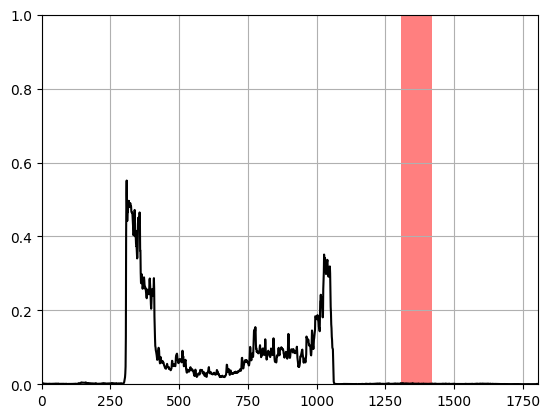

ENST00000464473
recall: 1.0
iou: 1.0
biotype: pseudogene
IP_662080  :  {'start': 0, 'stop': 498, 'MS': 30, 'TE': 0, 'frame': 1}
IP_662081  :  {'start': 304, 'stop': 397, 'MS': 0, 'TE': 0, 'frame': 2}


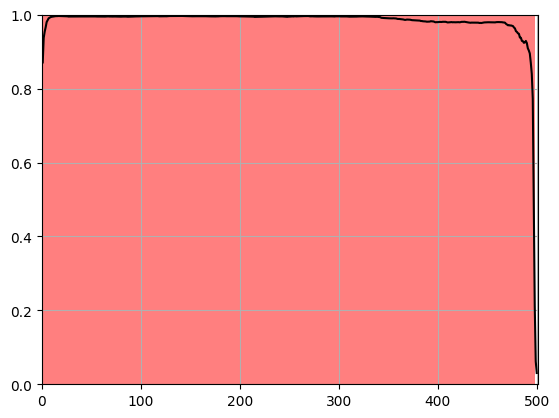

ENST00000450070
recall: 1.0
iou: 1.0
biotype: pseudogene
IP_662403  :  {'start': 0, 'stop': 426, 'MS': 100, 'TE': 0, 'frame': 1}
IP_662404  :  {'start': 566, 'stop': 683, 'MS': 0, 'TE': 0, 'frame': 3}


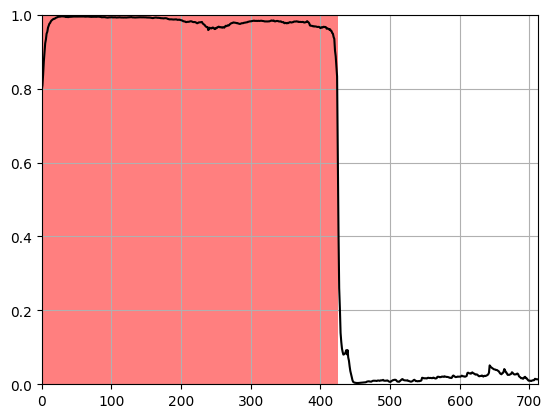

ENST00000422958
recall: 0.9977169036865234
iou: 0.9977169036865234
biotype: pseudogene
IP_665862  :  {'start': 0, 'stop': 438, 'MS': 26, 'TE': 0, 'frame': 1}


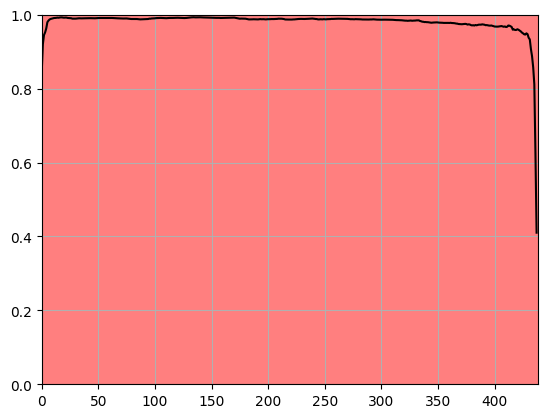

ENST00000435008
recall: 1.0
iou: 0.9933775067329407
biotype: pseudogene
IP_665899  :  {'start': 0, 'stop': 117, 'MS': 0, 'TE': 0, 'frame': 1}
IP_665898  :  {'start': 135, 'stop': 270, 'MS': 0, 'TE': 0, 'frame': 1}
IP_665901  :  {'start': 179, 'stop': 479, 'MS': 6, 'TE': 0, 'frame': 3}
IP_665900  :  {'start': 303, 'stop': 396, 'MS': 0, 'TE': 0, 'frame': 1}


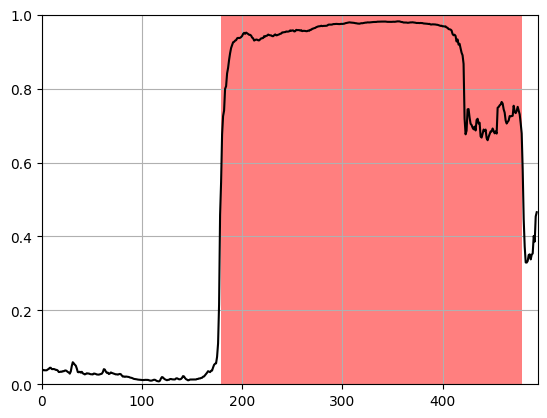

ENST00000452067
recall: 0.9300000071525574
iou: 0.9269102811813354
biotype: pseudogene
IP_666901  :  {'start': 395, 'stop': 695, 'MS': 2, 'TE': 0, 'frame': 3}
IP_666900  :  {'start': 402, 'stop': 507, 'MS': 0, 'TE': 0, 'frame': 1}
IP_666899  :  {'start': 546, 'stop': 672, 'MS': 0, 'TE': 0, 'frame': 1}


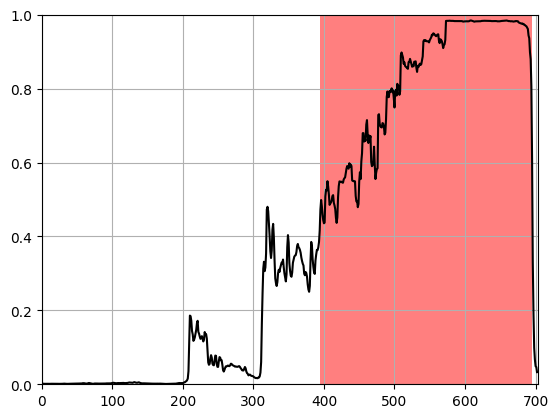

ENST00000420409
recall: 0.9967637658119202
iou: 0.9967637658119202
biotype: pseudogene
IP_667053  :  {'start': 75, 'stop': 171, 'MS': 0, 'TE': 0, 'frame': 1}
IP_667058  :  {'start': 266, 'stop': 389, 'MS': 0, 'TE': 0, 'frame': 3}
IP_667055  :  {'start': 413, 'stop': 722, 'MS': 16, 'TE': 0, 'frame': 3}
IP_667052  :  {'start': 690, 'stop': 840, 'MS': 0, 'TE': 0, 'frame': 1}
IP_667057  :  {'start': 749, 'stop': 1034, 'MS': 0, 'TE': 0, 'frame': 3}
IP_667056  :  {'start': 1082, 'stop': 1256, 'MS': 0, 'TE': 0, 'frame': 3}
IP_667054  :  {'start': 1188, 'stop': 1371, 'MS': 0, 'TE': 0, 'frame': 1}


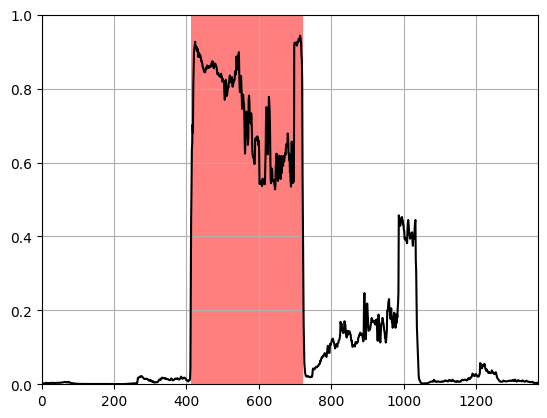

ENST00000414328
recall: 1.0
iou: 0.9963768124580383
biotype: pseudogene
IP_669028  :  {'start': 0, 'stop': 825, 'MS': 15, 'TE': 0, 'frame': 1}
IP_669031  :  {'start': 679, 'stop': 892, 'MS': 0, 'TE': 0, 'frame': 2}
IP_669029  :  {'start': 1038, 'stop': 1128, 'MS': 0, 'TE': 0, 'frame': 1}
IP_669030  :  {'start': 1275, 'stop': 1386, 'MS': 0, 'TE': 0, 'frame': 1}


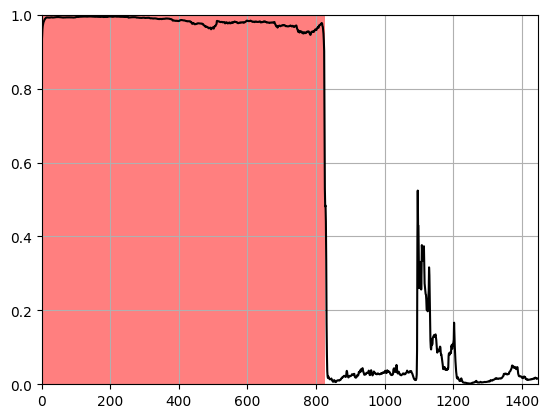

ENST00000424736
recall: 0.09273182600736618
iou: 0.0738522931933403
biotype: pseudogene
IP_669887  :  {'start': 0, 'stop': 222, 'MS': 6, 'TE': 6, 'frame': 1}
IP_092486  :  {'start': 104, 'stop': 194, 'MS': 0, 'TE': 0, 'frame': 3}
IP_669888  :  {'start': 550, 'stop': 745, 'MS': 0, 'TE': 0, 'frame': 2}
IP_669886  :  {'start': 759, 'stop': 936, 'MS': 0, 'TE': 2, 'frame': 1}


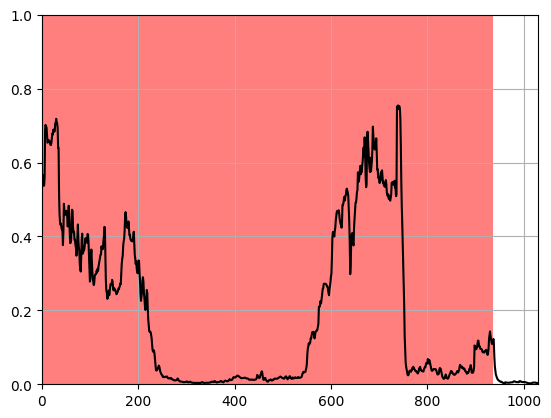

ENST00000454070
recall: 0.9968253970146179
iou: 0.9968253970146179
biotype: pseudogene
IP_670462  :  {'start': 174, 'stop': 489, 'MS': 12, 'TE': 0, 'frame': 1}
IP_670463  :  {'start': 298, 'stop': 391, 'MS': 1, 'TE': 0, 'frame': 2}


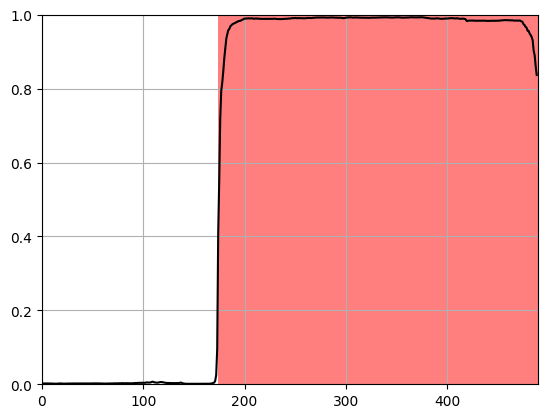

ENST00000440922
recall: 0.9973118305206299
iou: 0.9973118305206299
biotype: pseudogene
IP_670808  :  {'start': 65, 'stop': 437, 'MS': 2, 'TE': 0, 'frame': 3}
IP_670803  :  {'start': 459, 'stop': 693, 'MS': 0, 'TE': 0, 'frame': 1}
IP_670806  :  {'start': 505, 'stop': 682, 'MS': 0, 'TE': 0, 'frame': 2}
IP_670804  :  {'start': 720, 'stop': 999, 'MS': 0, 'TE': 0, 'frame': 1}
IP_670805  :  {'start': 760, 'stop': 868, 'MS': 0, 'TE': 0, 'frame': 2}
IP_670807  :  {'start': 1219, 'stop': 1309, 'MS': 0, 'TE': 0, 'frame': 2}


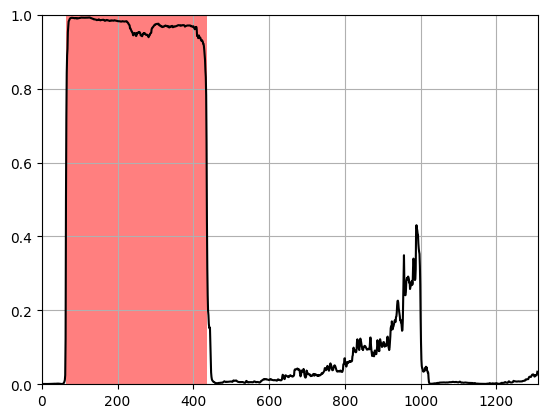

ENST00000437410
recall: 0.07323232293128967
iou: 0.036340851336717606
biotype: pseudogene
IP_670859  :  {'start': 101, 'stop': 191, 'MS': 0, 'TE': 0, 'frame': 3}
IP_670857  :  {'start': 129, 'stop': 354, 'MS': 2, 'TE': 0, 'frame': 1}
IP_670856  :  {'start': 372, 'stop': 543, 'MS': 0, 'TE': 2, 'frame': 1}
IP_670858  :  {'start': 546, 'stop': 966, 'MS': 0, 'TE': 0, 'frame': 1}


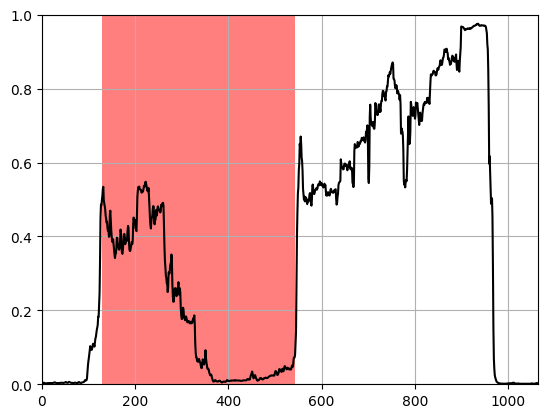

ENST00000449818
recall: 0.8031609058380127
iou: 0.8031609058380127
biotype: pseudogene
IP_671259  :  {'start': 12, 'stop': 573, 'MS': 6, 'TE': 0, 'frame': 1}
IP_671261  :  {'start': 569, 'stop': 689, 'MS': 0, 'TE': 0, 'frame': 3}
IP_671260  :  {'start': 589, 'stop': 715, 'MS': 0, 'TE': 0, 'frame': 2}
IP_671258  :  {'start': 732, 'stop': 867, 'MS': 6, 'TE': 1, 'frame': 1}


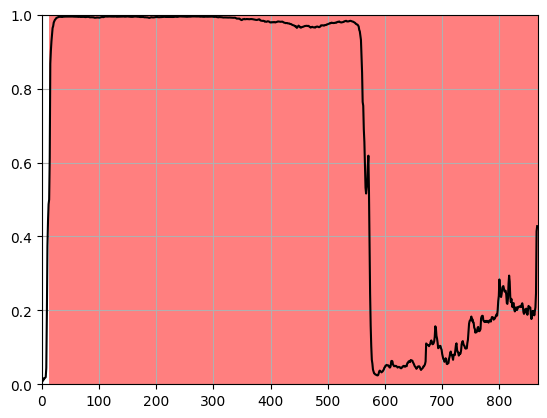

ENST00000430398
recall: 0.9988998770713806
iou: 0.9537814855575562
biotype: pseudogene
IP_671495  :  {'start': 63, 'stop': 972, 'MS': 13, 'TE': 0, 'frame': 1}
IP_671498  :  {'start': 437, 'stop': 587, 'MS': 0, 'TE': 0, 'frame': 3}
IP_671496  :  {'start': 583, 'stop': 673, 'MS': 0, 'TE': 0, 'frame': 2}
IP_671497  :  {'start': 697, 'stop': 826, 'MS': 0, 'TE': 0, 'frame': 2}
IP_671499  :  {'start': 806, 'stop': 1124, 'MS': 0, 'TE': 0, 'frame': 3}
IP_671494  :  {'start': 1062, 'stop': 1173, 'MS': 0, 'TE': 0, 'frame': 1}
IP_671493  :  {'start': 1320, 'stop': 1431, 'MS': 0, 'TE': 0, 'frame': 1}


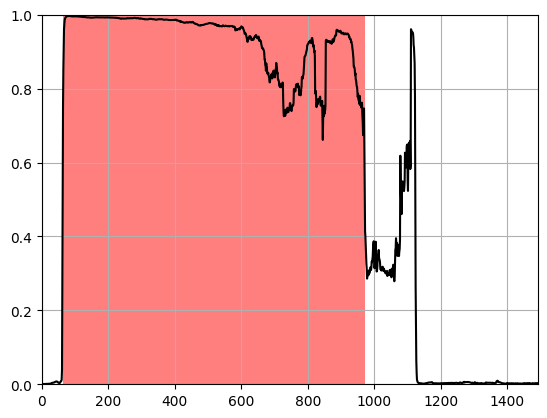

ENST00000603781
recall: 1.0
iou: 1.0
biotype: pseudogene
IP_671983  :  {'start': 120, 'stop': 246, 'MS': 2, 'TE': 0, 'frame': 1}


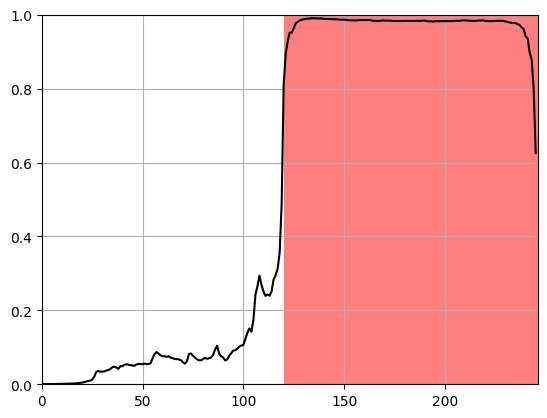

ENST00000411837
recall: 1.0
iou: 1.0
biotype: pseudogene
IP_672453  :  {'start': 0, 'stop': 492, 'MS': 7, 'TE': 0, 'frame': 1}
IP_672454  :  {'start': 301, 'stop': 394, 'MS': 0, 'TE': 0, 'frame': 2}


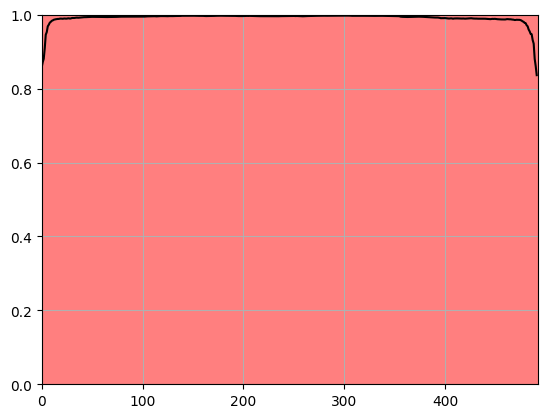

ENST00000604727
recall: 1.0
iou: 0.7919340133666992
biotype: pseudogene
IP_672470  :  {'start': 111, 'stop': 408, 'MS': 0, 'TE': 0, 'frame': 1}
IP_672475  :  {'start': 188, 'stop': 1052, 'MS': 221, 'TE': 0, 'frame': 3}
IP_672472  :  {'start': 612, 'stop': 858, 'MS': 0, 'TE': 0, 'frame': 1}
IP_672473  :  {'start': 936, 'stop': 1059, 'MS': 0, 'TE': 0, 'frame': 1}
IP_672474  :  {'start': 1058, 'stop': 1382, 'MS': 1, 'TE': 0, 'frame': 3}
IP_672471  :  {'start': 1212, 'stop': 1323, 'MS': 0, 'TE': 0, 'frame': 1}


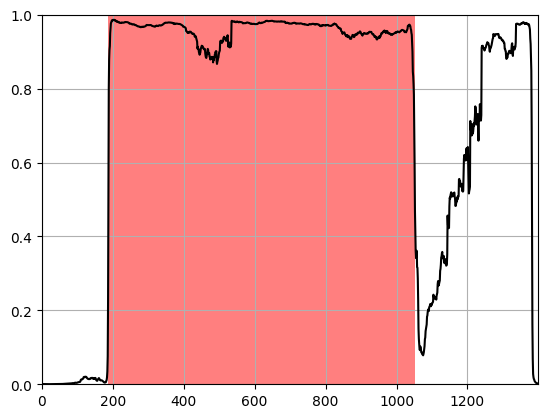

ENST00000541697
recall: 1.0
iou: 0.9973614811897278
biotype: pseudogene
IP_687491  :  {'start': 0, 'stop': 1134, 'MS': 8, 'TE': 0, 'frame': 1}
IP_687492  :  {'start': 79, 'stop': 169, 'MS': 0, 'TE': 0, 'frame': 2}
IP_687493  :  {'start': 724, 'stop': 1177, 'MS': 0, 'TE': 0, 'frame': 2}


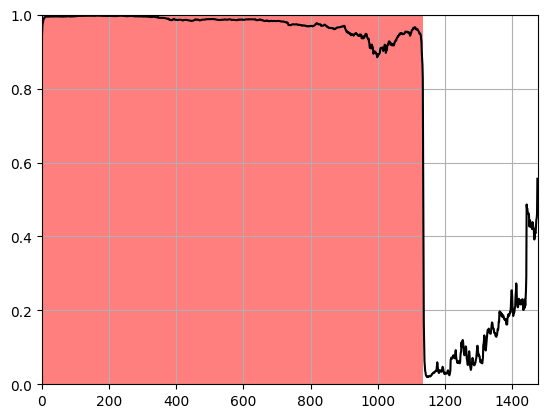

ENST00000497576
recall: 1.0
iou: 1.0
biotype: pseudogene
IP_689145  :  {'start': 0, 'stop': 441, 'MS': 2, 'TE': 0, 'frame': 1}
IP_689146  :  {'start': 229, 'stop': 364, 'MS': 0, 'TE': 0, 'frame': 2}


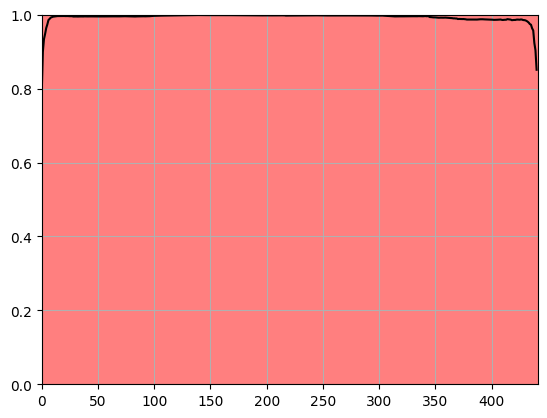

ENST00000455058
recall: 1.0
iou: 0.18129496276378632
biotype: pseudogene
IP_689515  :  {'start': 152, 'stop': 293, 'MS': 0, 'TE': 0, 'frame': 3}
IP_689517  :  {'start': 289, 'stop': 982, 'MS': 0, 'TE': 0, 'frame': 2}
IP_689516  :  {'start': 375, 'stop': 558, 'MS': 1, 'TE': 0, 'frame': 1}
IP_689518  :  {'start': 575, 'stop': 701, 'MS': 2, 'TE': 0, 'frame': 3}


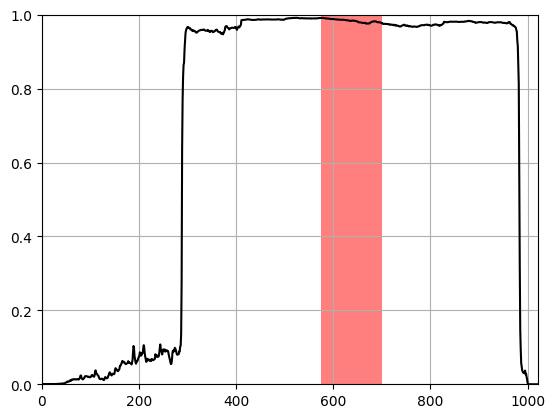

ENST00000497718
recall: 0.49462366104125977
iou: 0.04217603802680969
biotype: pseudogene
IP_689683  :  {'start': 200, 'stop': 569, 'MS': 0, 'TE': 0, 'frame': 3}
IP_689682  :  {'start': 501, 'stop': 723, 'MS': 0, 'TE': 0, 'frame': 1}
IP_689684  :  {'start': 803, 'stop': 938, 'MS': 0, 'TE': 0, 'frame': 3}
IP_3430467  :  {'start': 992, 'stop': 1994, 'MS': 1, 'TE': 0, 'frame': 3}
IP_689680  :  {'start': 2222, 'stop': 2357, 'MS': 0, 'TE': 0, 'frame': 3}
IP_3430466  :  {'start': 2260, 'stop': 3565, 'MS': 1, 'TE': 0, 'frame': 2}
IP_689676  :  {'start': 2501, 'stop': 2720, 'MS': 0, 'TE': 0, 'frame': 3}
IP_689677  :  {'start': 3404, 'stop': 3521, 'MS': 0, 'TE': 0, 'frame': 3}
IP_689671  :  {'start': 3633, 'stop': 3732, 'MS': 0, 'TE': 0, 'frame': 1}
IP_689681  :  {'start': 3686, 'stop': 4157, 'MS': 0, 'TE': 0, 'frame': 3}
IP_689675  :  {'start': 4166, 'stop': 4424, 'MS': 0, 'TE': 0, 'frame': 3}
IP_689673  :  {'start': 4215, 'stop': 4461, 'MS': 0, 'TE': 0, 'frame': 1}
IP_689678  :  {'start': 4625

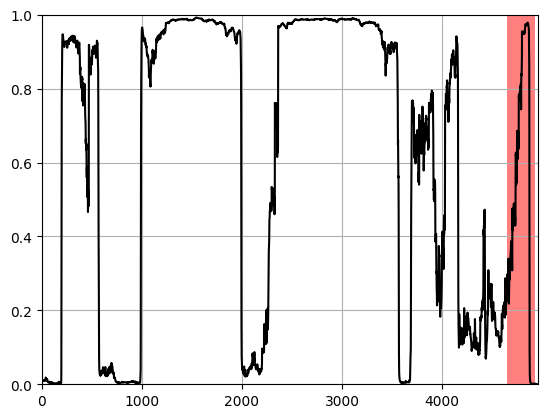

ENST00000470049
recall: 0.9885057210922241
iou: 0.9885057210922241
biotype: pseudogene
IP_701740  :  {'start': 0, 'stop': 120, 'MS': 0, 'TE': 0, 'frame': 1}
IP_701742  :  {'start': 131, 'stop': 305, 'MS': 3, 'TE': 0, 'frame': 3}
IP_701741  :  {'start': 333, 'stop': 423, 'MS': 0, 'TE': 0, 'frame': 1}


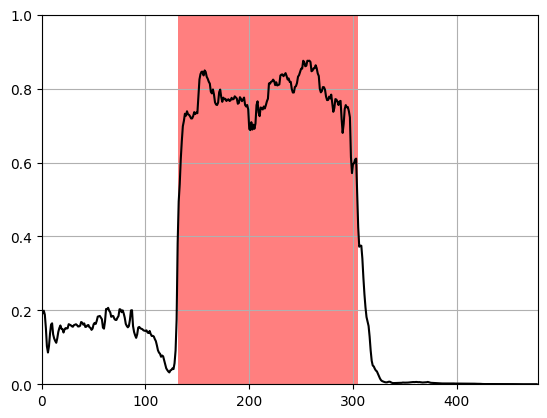

ENST00000592443
recall: 0.06560636311769485
iou: 0.03654485195875168
biotype: pseudogene
IP_702979  :  {'start': 204, 'stop': 633, 'MS': 1, 'TE': 0, 'frame': 1}
IP_702981  :  {'start': 601, 'stop': 952, 'MS': 2, 'TE': 0, 'frame': 2}
IP_702982  :  {'start': 710, 'stop': 806, 'MS': 0, 'TE': 0, 'frame': 3}
IP_702978  :  {'start': 762, 'stop': 1104, 'MS': 2, 'TE': 0, 'frame': 1}
IP_702980  :  {'start': 1300, 'stop': 1399, 'MS': 0, 'TE': 0, 'frame': 2}


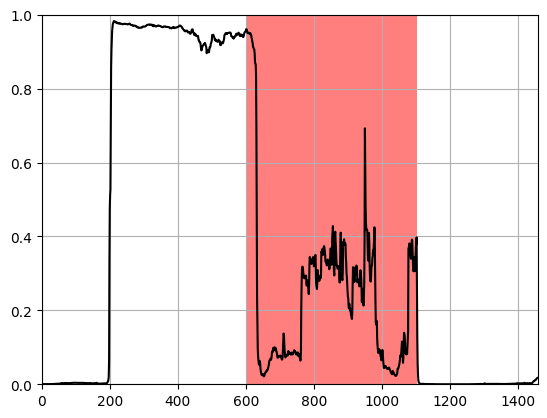

ENST00000571086
recall: 0.8020833134651184
iou: 0.7993079423904419
biotype: pseudogene
IP_707757  :  {'start': 22, 'stop': 286, 'MS': 0, 'TE': 0, 'frame': 2}
IP_707756  :  {'start': 66, 'stop': 354, 'MS': 2, 'TE': 0, 'frame': 1}
IP_707758  :  {'start': 191, 'stop': 386, 'MS': 0, 'TE': 0, 'frame': 3}
IP_707755  :  {'start': 438, 'stop': 708, 'MS': 0, 'TE': 0, 'frame': 1}


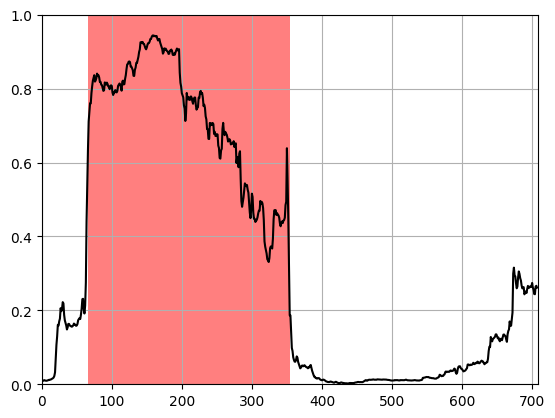

ENST00000570311
recall: 0.9335317611694336
iou: 0.23649157583713531
biotype: pseudogene
IP_708535  :  {'start': 0, 'stop': 2610, 'MS': 0, 'TE': 0, 'frame': 1}
IP_708542  :  {'start': 62, 'stop': 155, 'MS': 0, 'TE': 0, 'frame': 3}
IP_259181  :  {'start': 217, 'stop': 400, 'MS': 0, 'TE': 0, 'frame': 2}
IP_256764  :  {'start': 832, 'stop': 925, 'MS': 0, 'TE': 0, 'frame': 2}
IP_708538  :  {'start': 940, 'stop': 1132, 'MS': 0, 'TE': 0, 'frame': 2}
IP_708540  :  {'start': 2512, 'stop': 2641, 'MS': 0, 'TE': 0, 'frame': 2}
IP_708543  :  {'start': 2885, 'stop': 3242, 'MS': 0, 'TE': 0, 'frame': 3}
IP_708539  :  {'start': 3259, 'stop': 4267, 'MS': 2, 'TE': 0, 'frame': 2}
IP_708541  :  {'start': 4034, 'stop': 4154, 'MS': 0, 'TE': 0, 'frame': 3}
IP_708536  :  {'start': 4338, 'stop': 4548, 'MS': 0, 'TE': 0, 'frame': 1}
IP_708537  :  {'start': 4489, 'stop': 4591, 'MS': 1, 'TE': 0, 'frame': 2}


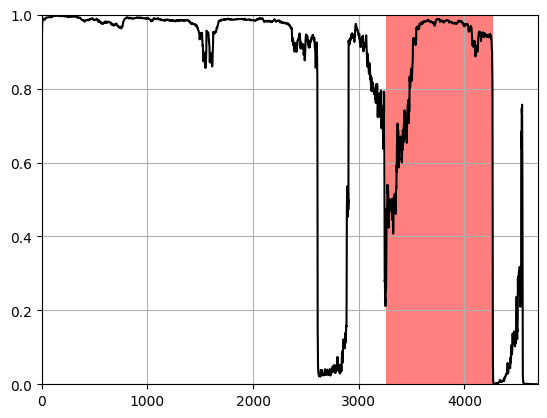

ENST00000577607
recall: 0.998106062412262
iou: 0.998106062412262
biotype: pseudogene
IP_708909  :  {'start': 78, 'stop': 606, 'MS': 19, 'TE': 0, 'frame': 1}
IP_708910  :  {'start': 304, 'stop': 571, 'MS': 0, 'TE': 0, 'frame': 2}
IP_708911  :  {'start': 709, 'stop': 799, 'MS': 0, 'TE': 0, 'frame': 2}


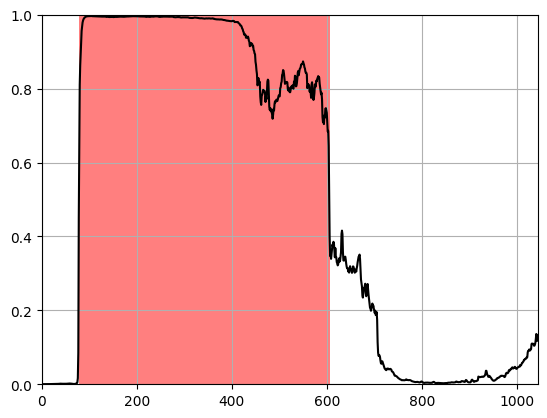

ENST00000562317
recall: 0.9745370149612427
iou: 0.6572989821434021
biotype: pseudogene
IP_723350  :  {'start': 0, 'stop': 477, 'MS': 0, 'TE': 0, 'frame': 1}
IP_723351  :  {'start': 413, 'stop': 1277, 'MS': 13, 'TE': 0, 'frame': 3}
IP_723348  :  {'start': 681, 'stop': 837, 'MS': 0, 'TE': 0, 'frame': 1}
IP_723349  :  {'start': 1008, 'stop': 1128, 'MS': 0, 'TE': 0, 'frame': 1}


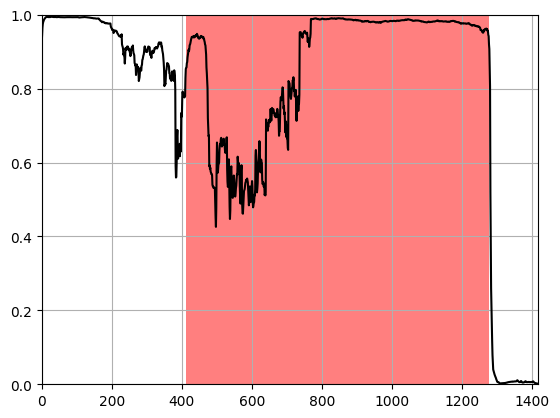

ENST00000560090
recall: 1.0
iou: 0.5199386477470398
biotype: pseudogene
IP_734672  :  {'start': 198, 'stop': 537, 'MS': 13, 'TE': 0, 'frame': 1}
IP_734674  :  {'start': 655, 'stop': 931, 'MS': 0, 'TE': 0, 'frame': 2}
IP_734673  :  {'start': 1009, 'stop': 1132, 'MS': 0, 'TE': 0, 'frame': 2}


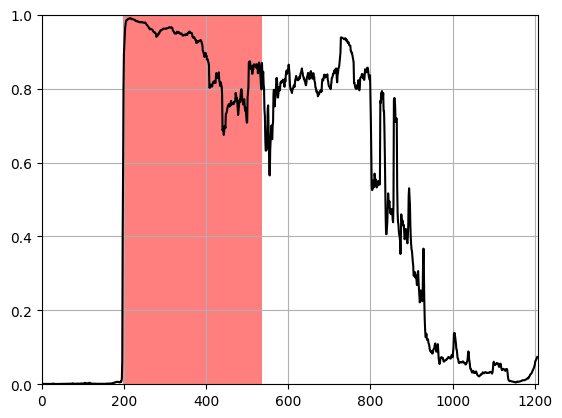

ENST00000558669
recall: 0.0
iou: 0.0
biotype: pseudogene
IP_734906  :  {'start': 132, 'stop': 258, 'MS': 2, 'TE': 0, 'frame': 1}
IP_734908  :  {'start': 491, 'stop': 614, 'MS': 0, 'TE': 0, 'frame': 3}
IP_734907  :  {'start': 511, 'stop': 640, 'MS': 0, 'TE': 0, 'frame': 2}


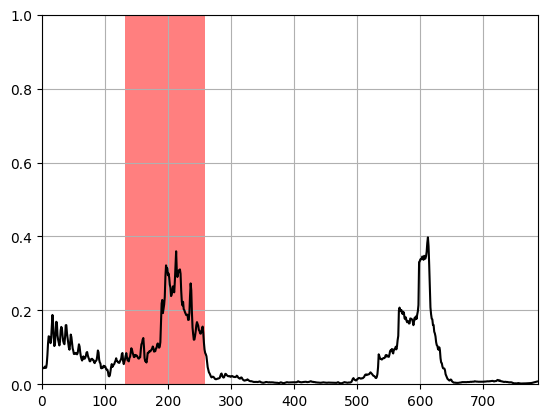

ENST00000564027
recall: 1.0
iou: 0.3252032399177551
biotype: pseudogene
IP_734962  :  {'start': 0, 'stop': 369, 'MS': 1, 'TE': 0, 'frame': 1}
IP_734964  :  {'start': 110, 'stop': 266, 'MS': 0, 'TE': 0, 'frame': 3}
IP_734963  :  {'start': 157, 'stop': 277, 'MS': 2, 'TE': 0, 'frame': 2}


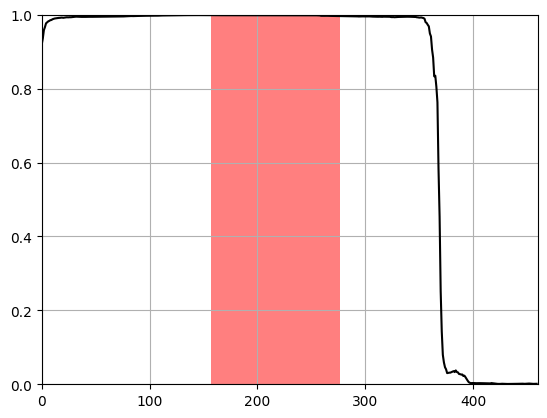

ENST00000558927
recall: 0.9295634627342224
iou: 0.9231526851654053
biotype: pseudogene
IP_735563  :  {'start': 177, 'stop': 318, 'MS': 0, 'TE': 0, 'frame': 1}
IP_735567  :  {'start': 325, 'stop': 442, 'MS': 0, 'TE': 0, 'frame': 2}
IP_735569  :  {'start': 350, 'stop': 800, 'MS': 12, 'TE': 0, 'frame': 3}
IP_735568  :  {'start': 839, 'stop': 1397, 'MS': 24, 'TE': 0, 'frame': 3}
IP_735564  :  {'start': 1008, 'stop': 1131, 'MS': 0, 'TE': 0, 'frame': 1}
IP_735565  :  {'start': 1134, 'stop': 1227, 'MS': 1, 'TE': 0, 'frame': 1}
IP_735566  :  {'start': 1278, 'stop': 1449, 'MS': 0, 'TE': 0, 'frame': 1}


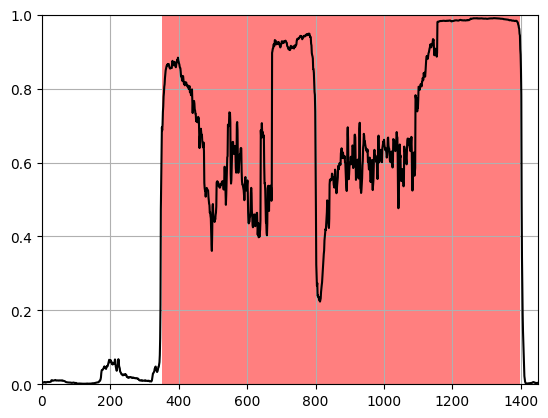

ENST00000465295
recall: 0.5388888716697693
iou: 0.5388888716697693
biotype: pseudogene
IP_736025  :  {'start': 0, 'stop': 180, 'MS': 2, 'TE': 0, 'frame': 1}


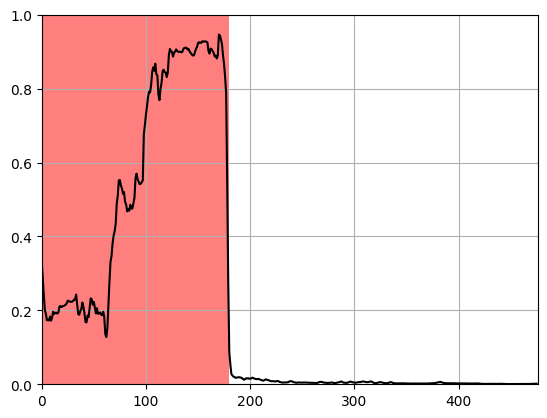

ENST00000557146
recall: 1.0
iou: 0.9974026083946228
biotype: pseudogene
IP_736336  :  {'start': 0, 'stop': 384, 'MS': 2, 'TE': 0, 'frame': 1}
IP_736337  :  {'start': 362, 'stop': 533, 'MS': 0, 'TE': 0, 'frame': 3}
IP_736338  :  {'start': 641, 'stop': 767, 'MS': 0, 'TE': 0, 'frame': 3}


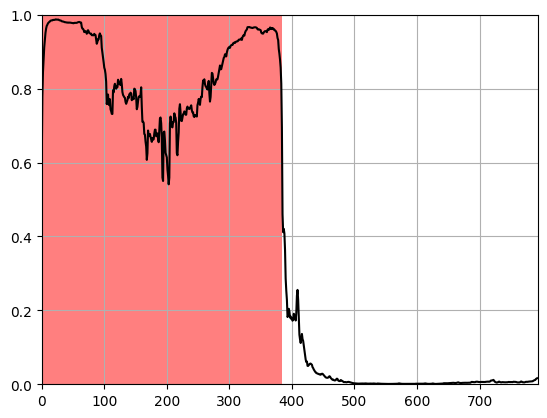

ENST00000560847
recall: 0.9960317611694336
iou: 0.9960317611694336
biotype: pseudogene
IP_737118  :  {'start': 163, 'stop': 667, 'MS': 11, 'TE': 0, 'frame': 2}
IP_737119  :  {'start': 626, 'stop': 854, 'MS': 1, 'TE': 0, 'frame': 3}
IP_737117  :  {'start': 660, 'stop': 882, 'MS': 0, 'TE': 0, 'frame': 1}
IP_737120  :  {'start': 878, 'stop': 1001, 'MS': 0, 'TE': 0, 'frame': 3}


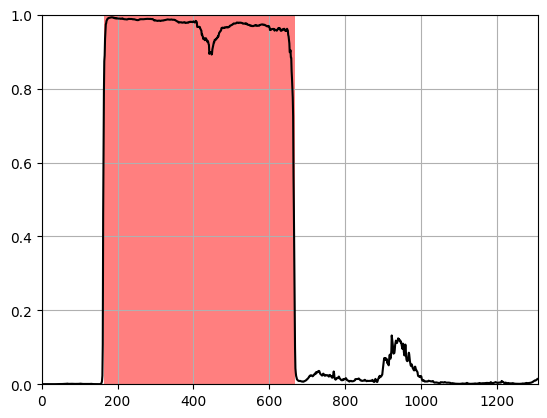

ENST00000520721
recall: 0.9835391044616699
iou: 0.9795082211494446
biotype: pseudogene
IP_745206  :  {'start': 0, 'stop': 243, 'MS': 5, 'TE': 0, 'frame': 1}


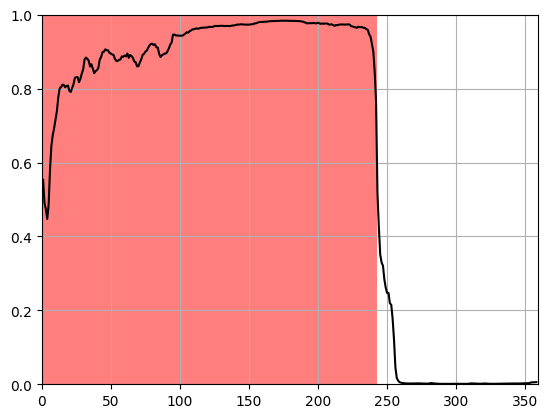

ENST00000604654
recall: 0.9985875487327576
iou: 0.9985875487327576
biotype: pseudogene
IP_745315  :  {'start': 0, 'stop': 708, 'MS': 5, 'TE': 0, 'frame': 1}


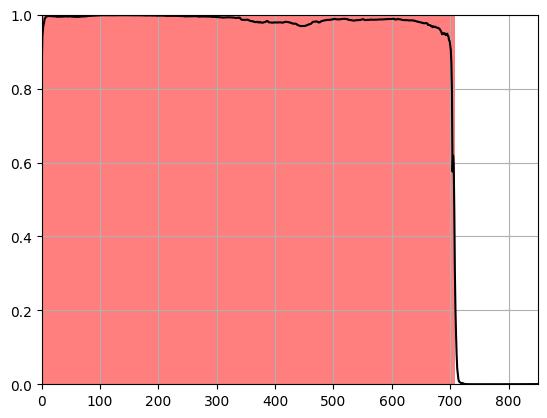

ENST00000557533
recall: 0.0
iou: 0.0
biotype: pseudogene
IP_746924  :  {'start': 117, 'stop': 216, 'MS': 0, 'TE': 0, 'frame': 1}
IP_746925  :  {'start': 267, 'stop': 381, 'MS': 0, 'TE': 0, 'frame': 1}
IP_746921  :  {'start': 420, 'stop': 558, 'MS': 0, 'TE': 0, 'frame': 1}
IP_746922  :  {'start': 600, 'stop': 717, 'MS': 0, 'TE': 0, 'frame': 1}
IP_746926  :  {'start': 616, 'stop': 712, 'MS': 0, 'TE': 0, 'frame': 2}
IP_746927  :  {'start': 799, 'stop': 889, 'MS': 0, 'TE': 0, 'frame': 2}
IP_746923  :  {'start': 888, 'stop': 1038, 'MS': 2, 'TE': 0, 'frame': 1}


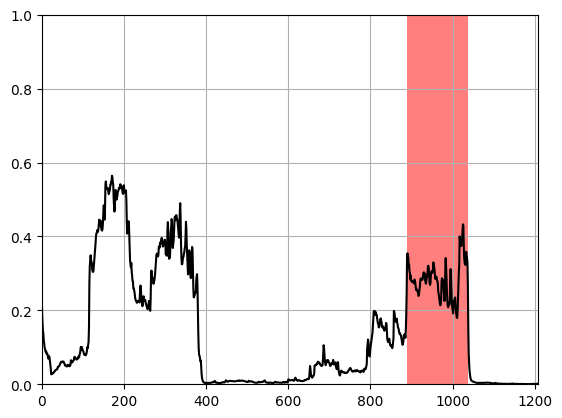

ENST00000619520
recall: 0.23391813039779663
iou: 0.07984031736850739
biotype: pseudogene
IP_754554  :  {'start': 0, 'stop': 171, 'MS': 2, 'TE': 0, 'frame': 1}
IP_754552  :  {'start': 183, 'stop': 297, 'MS': 1, 'TE': 0, 'frame': 1}
IP_754555  :  {'start': 346, 'stop': 730, 'MS': 0, 'TE': 0, 'frame': 2}
IP_754553  :  {'start': 726, 'stop': 1158, 'MS': 1, 'TE': 0, 'frame': 1}


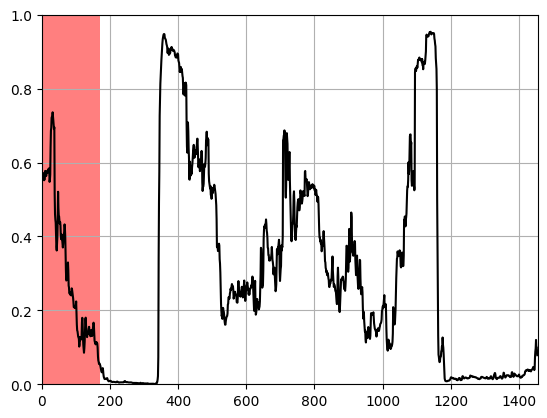

ENST00000423401
recall: 1.0
iou: 0.9927007555961609
biotype: pseudogene
IP_754785  :  {'start': 0, 'stop': 408, 'MS': 7, 'TE': 0, 'frame': 1}


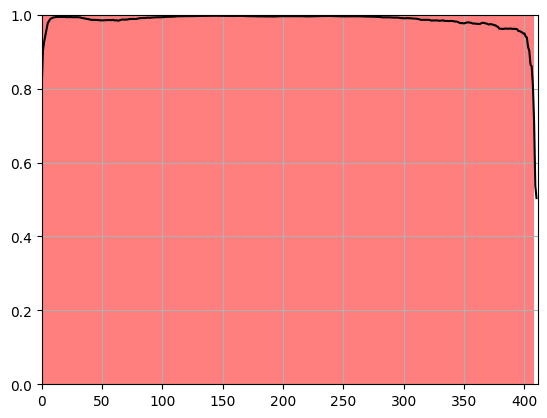

ENST00000451871
recall: 0.9925925731658936
iou: 0.9925925731658936
biotype: pseudogene
IP_755245  :  {'start': 260, 'stop': 362, 'MS': 0, 'TE': 0, 'frame': 3}
IP_755244  :  {'start': 466, 'stop': 871, 'MS': 2, 'TE': 0, 'frame': 2}
IP_755246  :  {'start': 596, 'stop': 698, 'MS': 0, 'TE': 0, 'frame': 3}
IP_755241  :  {'start': 867, 'stop': 1119, 'MS': 0, 'TE': 0, 'frame': 1}
IP_755247  :  {'start': 1232, 'stop': 1328, 'MS': 0, 'TE': 0, 'frame': 3}
IP_755242  :  {'start': 1342, 'stop': 1456, 'MS': 0, 'TE': 0, 'frame': 2}
IP_755243  :  {'start': 1606, 'stop': 1717, 'MS': 0, 'TE': 0, 'frame': 2}


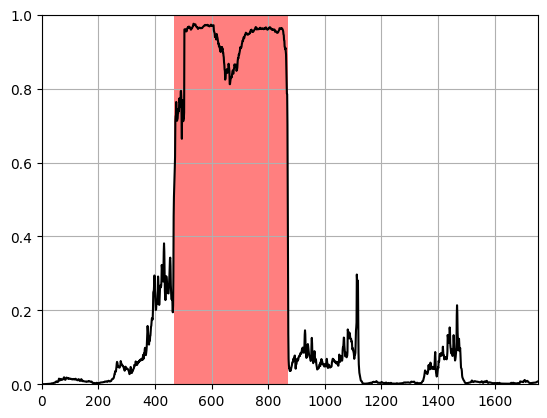

ENST00000445530
recall: 0.0
iou: 0.0
biotype: pseudogene
IP_755320  :  {'start': 82, 'stop': 202, 'MS': 0, 'TE': 0, 'frame': 2}
IP_755319  :  {'start': 229, 'stop': 352, 'MS': 0, 'TE': 0, 'frame': 2}
IP_755317  :  {'start': 327, 'stop': 471, 'MS': 0, 'TE': 0, 'frame': 1}
IP_755318  :  {'start': 835, 'stop': 1003, 'MS': 0, 'TE': 0, 'frame': 2}
IP_755316  :  {'start': 1161, 'stop': 1275, 'MS': 0, 'TE': 0, 'frame': 1}
IP_755321  :  {'start': 1364, 'stop': 1505, 'MS': 2, 'TE': 0, 'frame': 3}


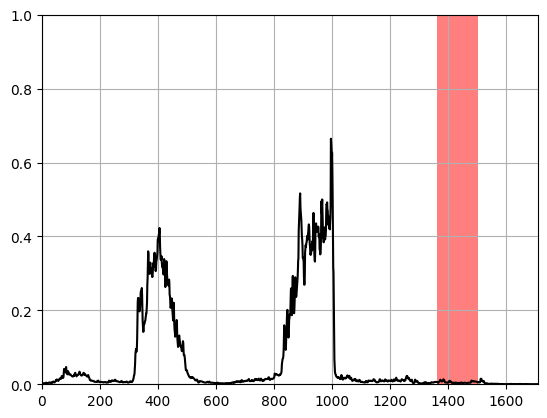

ENST00000442257
recall: 0.6779661178588867
iou: 0.45627376437187195
biotype: pseudogene
IP_755805  :  {'start': 78, 'stop': 291, 'MS': 0, 'TE': 0, 'frame': 1}
IP_755804  :  {'start': 396, 'stop': 561, 'MS': 0, 'TE': 0, 'frame': 1}
IP_755807  :  {'start': 437, 'stop': 608, 'MS': 0, 'TE': 0, 'frame': 3}
IP_755803  :  {'start': 720, 'stop': 1074, 'MS': 2, 'TE': 0, 'frame': 1}
IP_755808  :  {'start': 749, 'stop': 854, 'MS': 1, 'TE': 0, 'frame': 3}
IP_755806  :  {'start': 1063, 'stop': 1210, 'MS': 0, 'TE': 0, 'frame': 2}


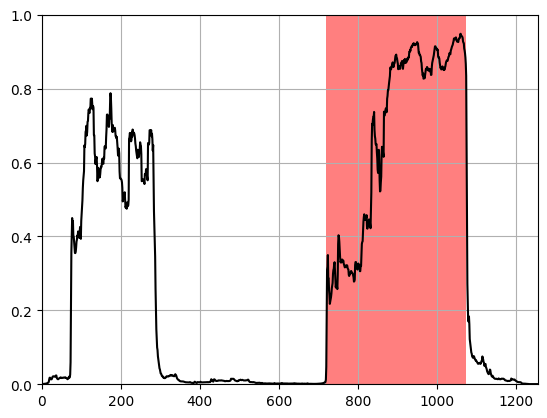

ENST00000458378
recall: 1.0
iou: 0.9975000023841858
biotype: pseudogene
IP_755980  :  {'start': 0, 'stop': 399, 'MS': 13, 'TE': 0, 'frame': 1}
IP_755981  :  {'start': 121, 'stop': 262, 'MS': 0, 'TE': 0, 'frame': 2}
IP_755982  :  {'start': 395, 'stop': 485, 'MS': 1, 'TE': 0, 'frame': 3}


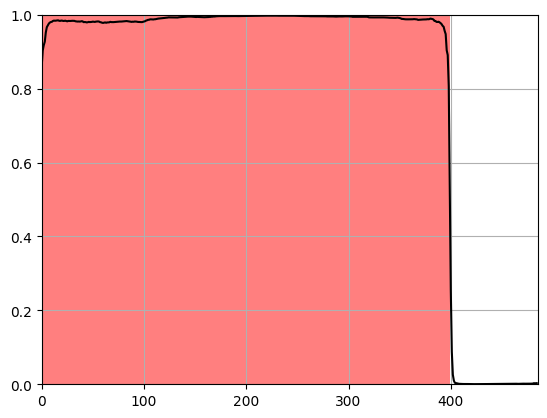

ENST00000414095
recall: 0.00401606410741806
iou: 0.002754820976406336
biotype: pseudogene
IP_758392  :  {'start': 0, 'stop': 96, 'MS': 7, 'TE': 0, 'frame': 1}
IP_758394  :  {'start': 95, 'stop': 224, 'MS': 0, 'TE': 0, 'frame': 3}
IP_758396  :  {'start': 227, 'stop': 398, 'MS': 0, 'TE': 0, 'frame': 3}
IP_758393  :  {'start': 447, 'stop': 600, 'MS': 3, 'TE': 0, 'frame': 1}
IP_758395  :  {'start': 680, 'stop': 800, 'MS': 0, 'TE': 0, 'frame': 3}


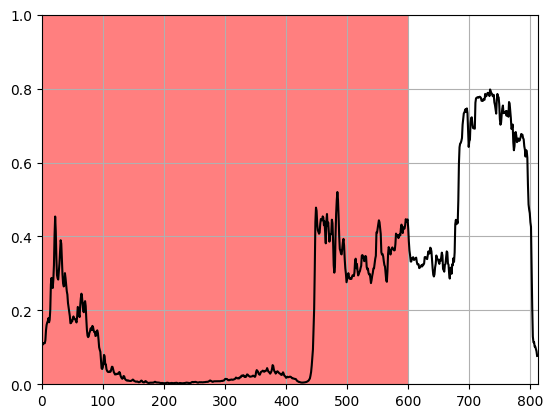

ENST00000481157
recall: 0.0
iou: 0.0
biotype: pseudogene
IP_761202  :  {'start': 0, 'stop': 318, 'MS': 0, 'TE': 0, 'frame': 1}
IP_761203  :  {'start': 504, 'stop': 627, 'MS': 8, 'TE': 0, 'frame': 1}


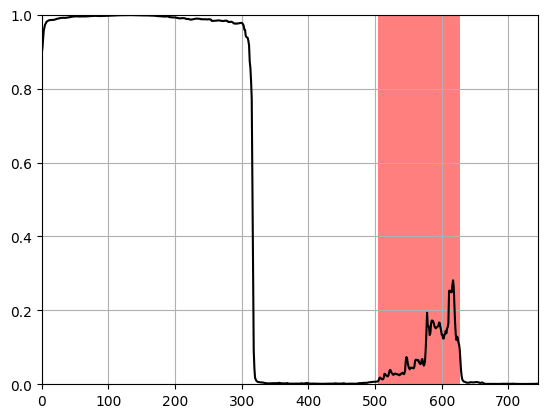

ENST00000551916
recall: 0.9979487061500549
iou: 0.9959058165550232
biotype: pseudogene
IP_761334  :  {'start': 0, 'stop': 231, 'MS': 0, 'TE': 0, 'frame': 1}
IP_761337  :  {'start': 199, 'stop': 448, 'MS': 0, 'TE': 0, 'frame': 2}
IP_761338  :  {'start': 356, 'stop': 1331, 'MS': 7, 'TE': 0, 'frame': 3}
IP_761333  :  {'start': 942, 'stop': 1137, 'MS': 0, 'TE': 0, 'frame': 1}
IP_761335  :  {'start': 1140, 'stop': 1233, 'MS': 0, 'TE': 0, 'frame': 1}
IP_761336  :  {'start': 1284, 'stop': 1455, 'MS': 0, 'TE': 0, 'frame': 1}


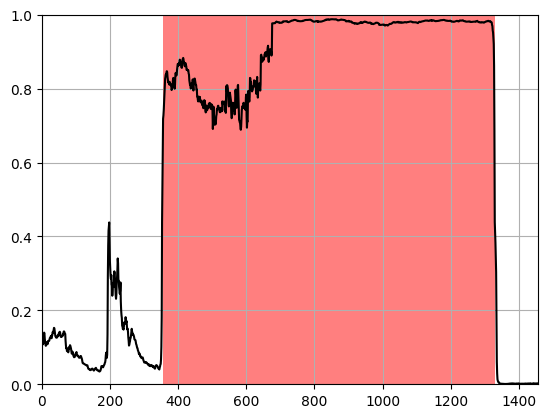

ENST00000547726
recall: 0.2256944477558136
iou: 0.07531865686178207
biotype: pseudogene
IP_762807  :  {'start': 0, 'stop': 288, 'MS': 5, 'TE': 0, 'frame': 1}
IP_762810  :  {'start': 170, 'stop': 260, 'MS': 0, 'TE': 0, 'frame': 3}
IP_762808  :  {'start': 471, 'stop': 1047, 'MS': 1, 'TE': 0, 'frame': 1}
IP_762809  :  {'start': 745, 'stop': 919, 'MS': 0, 'TE': 0, 'frame': 2}


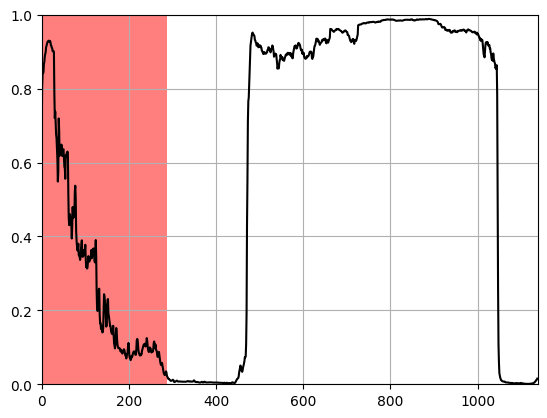

ENST00000540992
recall: 1.0
iou: 0.14105504751205444
biotype: pseudogene
IP_762934  :  {'start': 16, 'stop': 127, 'MS': 0, 'TE': 0, 'frame': 2}
IP_762933  :  {'start': 57, 'stop': 927, 'MS': 0, 'TE': 0, 'frame': 1}
IP_762935  :  {'start': 397, 'stop': 625, 'MS': 0, 'TE': 0, 'frame': 2}
IP_762936  :  {'start': 668, 'stop': 791, 'MS': 2, 'TE': 0, 'frame': 3}


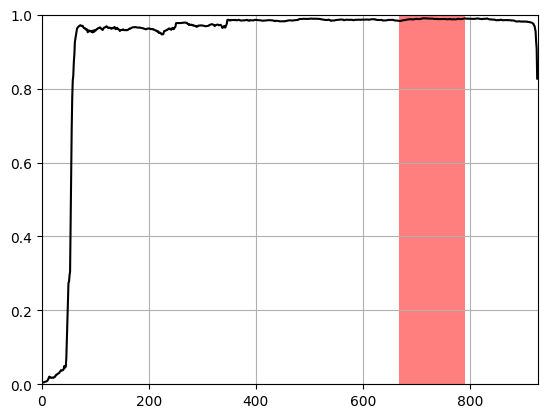

ENST00000645902
recall: 0.8637992739677429
iou: 0.8607142567634583
biotype: pseudogene


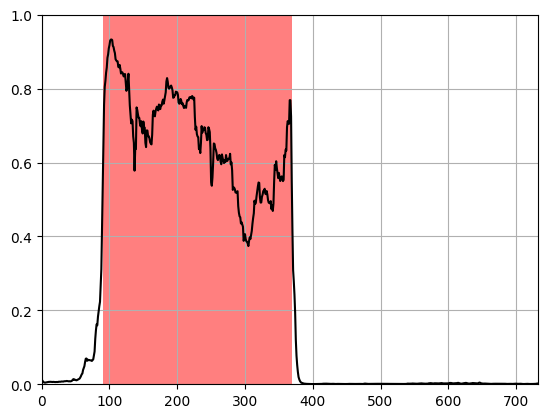

ENST00000631171
recall: 0.5036319494247437
iou: 0.5036319494247437
biotype: pseudogene


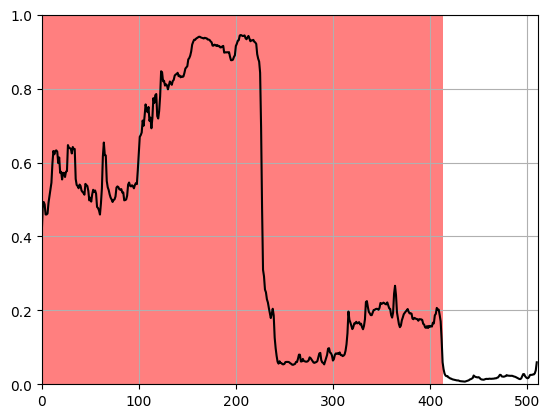

ENST00000604842
recall: 0.0
iou: 0.0
biotype: pseudogene
IP_773677  :  {'start': 10, 'stop': 157, 'MS': 0, 'TE': 0, 'frame': 2}
IP_773676  :  {'start': 309, 'stop': 417, 'MS': 0, 'TE': 0, 'frame': 1}
IP_773678  :  {'start': 403, 'stop': 568, 'MS': 2, 'TE': 0, 'frame': 2}
IP_773675  :  {'start': 504, 'stop': 639, 'MS': 0, 'TE': 0, 'frame': 1}


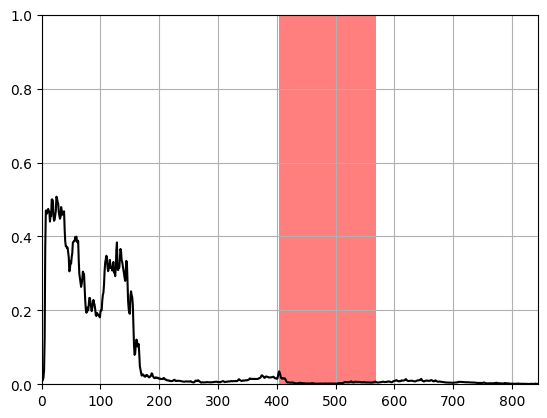

ENST00000533003
recall: 0.9707475900650024
iou: 0.9707475900650024
biotype: pseudogene
IP_773968  :  {'start': 2, 'stop': 122, 'MS': 1, 'TE': 0, 'frame': 3}
IP_773966  :  {'start': 353, 'stop': 932, 'MS': 18, 'TE': 0, 'frame': 3}
IP_773964  :  {'start': 657, 'stop': 786, 'MS': 0, 'TE': 0, 'frame': 1}
IP_773965  :  {'start': 766, 'stop': 1276, 'MS': 41, 'TE': 0, 'frame': 2}
IP_773967  :  {'start': 1010, 'stop': 1133, 'MS': 0, 'TE': 0, 'frame': 3}


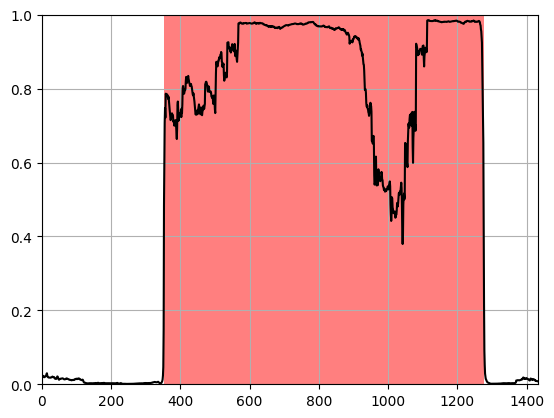

ENST00000425960
recall: 0.7358490824699402
iou: 0.731249988079071
biotype: pseudogene
IP_774225  :  {'start': 180, 'stop': 498, 'MS': 2, 'TE': 0, 'frame': 1}
IP_774227  :  {'start': 430, 'stop': 520, 'MS': 0, 'TE': 0, 'frame': 2}
IP_774229  :  {'start': 632, 'stop': 821, 'MS': 0, 'TE': 0, 'frame': 3}
IP_774226  :  {'start': 675, 'stop': 909, 'MS': 0, 'TE': 0, 'frame': 1}
IP_774228  :  {'start': 817, 'stop': 949, 'MS': 0, 'TE': 0, 'frame': 2}


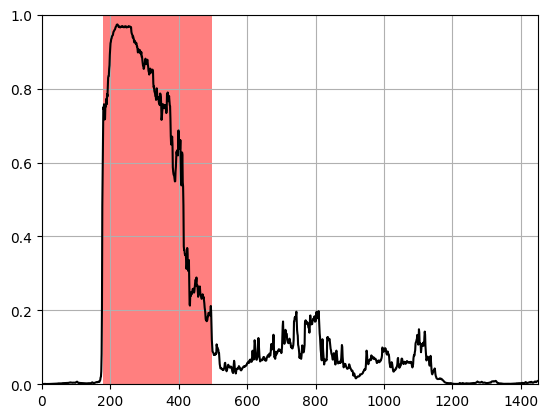

ENST00000533985
recall: 0.932659924030304
iou: 0.6108048558235168
biotype: pseudogene
IP_776995  :  {'start': 257, 'stop': 566, 'MS': 0, 'TE': 0, 'frame': 3}
IP_776994  :  {'start': 605, 'stop': 722, 'MS': 0, 'TE': 1, 'frame': 3}
IP_776992  :  {'start': 718, 'stop': 1312, 'MS': 6, 'TE': 0, 'frame': 2}
IP_776996  :  {'start': 788, 'stop': 1241, 'MS': 2, 'TE': 0, 'frame': 3}
IP_776993  :  {'start': 1333, 'stop': 1507, 'MS': 0, 'TE': 0, 'frame': 2}


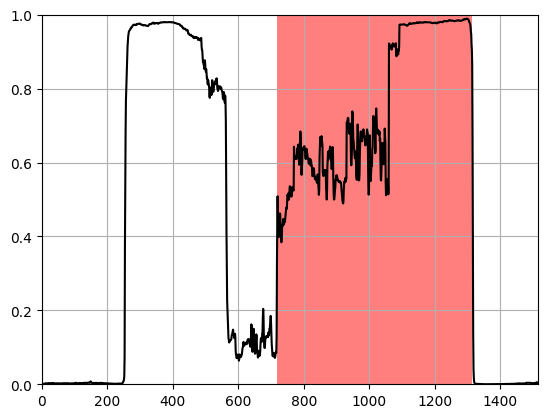

ENST00000434991
recall: 0.28205129504203796
iou: 0.07089151442050934
biotype: pseudogene
IP_777297  :  {'start': 0, 'stop': 234, 'MS': 2, 'TE': 0, 'frame': 1}
IP_777298  :  {'start': 169, 'stop': 931, 'MS': 1, 'TE': 0, 'frame': 2}


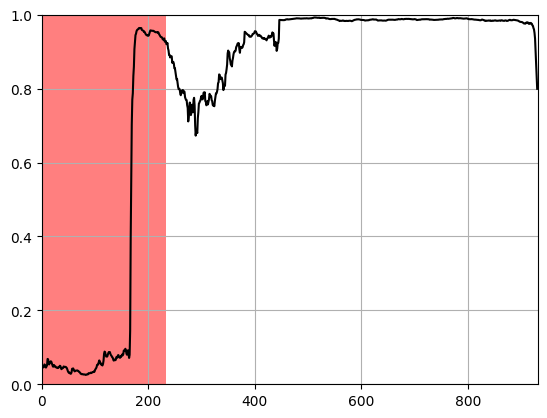

ENST00000441370
recall: 0.9977924823760986
iou: 0.9168357253074646
biotype: pseudogene
IP_789717  :  {'start': 59, 'stop': 512, 'MS': 2, 'TE': 0, 'frame': 3}
IP_789715  :  {'start': 454, 'stop': 649, 'MS': 1, 'TE': 0, 'frame': 2}
IP_789711  :  {'start': 774, 'stop': 939, 'MS': 0, 'TE': 0, 'frame': 1}
IP_789713  :  {'start': 778, 'stop': 871, 'MS': 1, 'TE': 0, 'frame': 2}
IP_789716  :  {'start': 848, 'stop': 1037, 'MS': 0, 'TE': 0, 'frame': 3}
IP_789712  :  {'start': 1113, 'stop': 1365, 'MS': 0, 'TE': 0, 'frame': 1}
IP_789714  :  {'start': 1117, 'stop': 1312, 'MS': 0, 'TE': 0, 'frame': 2}


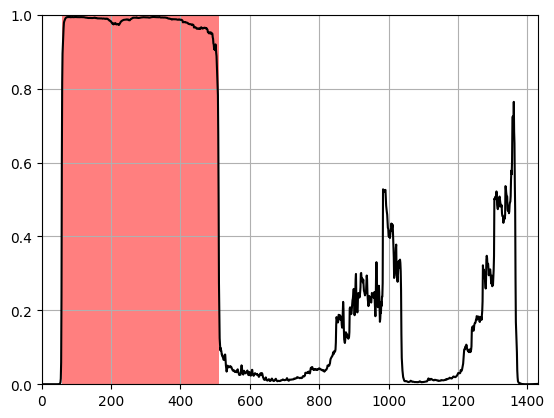

ENST00000401429
recall: 0.9925925731658936
iou: 0.9617224931716919
biotype: pseudogene
IP_790150  :  {'start': 0, 'stop': 810, 'MS': 12, 'TE': 0, 'frame': 1}
IP_790151  :  {'start': 170, 'stop': 302, 'MS': 0, 'TE': 0, 'frame': 3}
IP_790149  :  {'start': 816, 'stop': 1041, 'MS': 0, 'TE': 0, 'frame': 1}
IP_643376  :  {'start': 1037, 'stop': 1139, 'MS': 0, 'TE': 0, 'frame': 3}


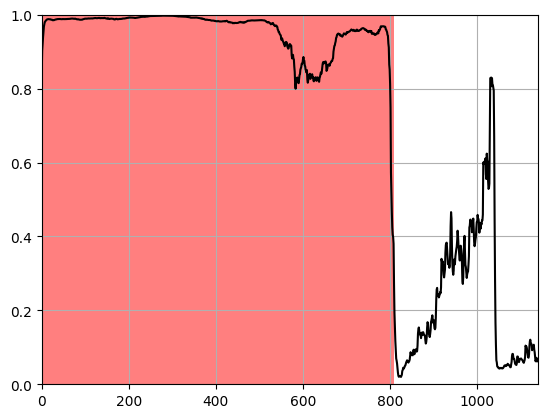

ENST00000451609
recall: 1.0
iou: 0.9943820238113403
biotype: pseudogene
IP_790880  :  {'start': 326, 'stop': 1211, 'MS': 43, 'TE': 0, 'frame': 3}
IP_790879  :  {'start': 978, 'stop': 1101, 'MS': 0, 'TE': 0, 'frame': 1}


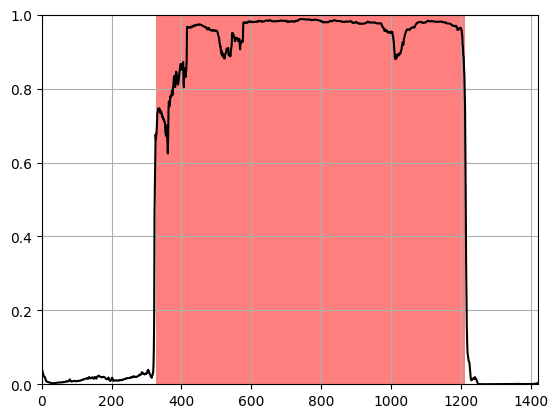

ENST00000487348
recall: 1.0
iou: 1.0
biotype: pseudogene
IP_060331  :  {'start': 0, 'stop': 492, 'MS': 7, 'TE': 0, 'frame': 1}
IP_060332  :  {'start': 292, 'stop': 385, 'MS': 0, 'TE': 0, 'frame': 2}


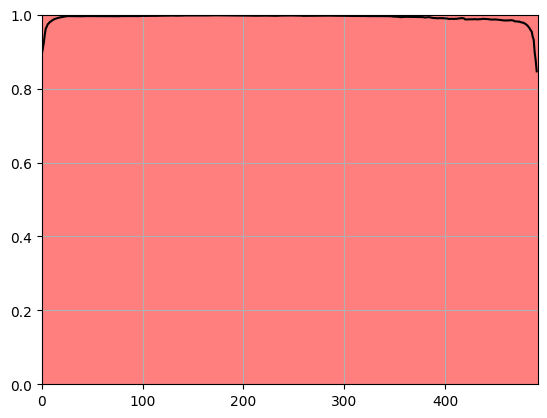

ENST00000435916
recall: 1.0
iou: 0.37142857909202576
biotype: pseudogene
IP_789496  :  {'start': 0, 'stop': 546, 'MS': 2, 'TE': 0, 'frame': 1}
IP_092182  :  {'start': 298, 'stop': 457, 'MS': 0, 'TE': 0, 'frame': 2}
IP_092179  :  {'start': 865, 'stop': 1006, 'MS': 0, 'TE': 0, 'frame': 2}
IP_789499  :  {'start': 872, 'stop': 1769, 'MS': 0, 'TE': 0, 'frame': 3}
IP_789498  :  {'start': 1248, 'stop': 1395, 'MS': 0, 'TE': 0, 'frame': 1}
IP_789497  :  {'start': 1488, 'stop': 1650, 'MS': 0, 'TE': 0, 'frame': 1}


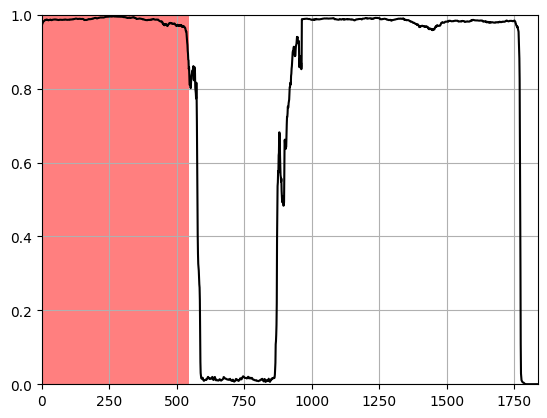

ENST00000449217
recall: 0.08205128461122513
iou: 0.07881773263216019
biotype: pseudogene
IP_556300  :  {'start': 25, 'stop': 151, 'MS': 0, 'TE': 0, 'frame': 2}
IP_556302  :  {'start': 47, 'stop': 242, 'MS': 3, 'TE': 0, 'frame': 3}
IP_556299  :  {'start': 408, 'stop': 636, 'MS': 0, 'TE': 0, 'frame': 1}
IP_556301  :  {'start': 674, 'stop': 797, 'MS': 0, 'TE': 0, 'frame': 3}


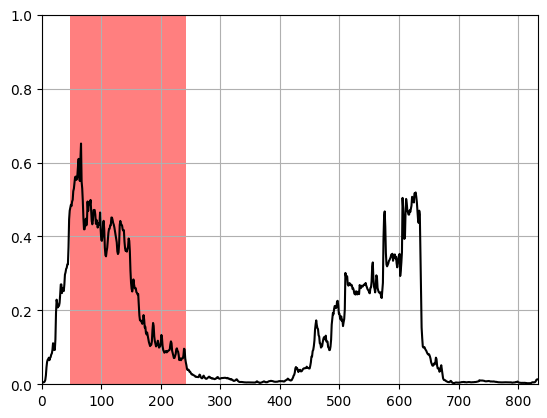

ENST00000434750
recall: 0.7518518567085266
iou: 0.6082397103309631
biotype: pseudogene
IP_556624  :  {'start': 0, 'stop': 804, 'MS': 21, 'TE': 0, 'frame': 1}
IP_556625  :  {'start': 679, 'stop': 781, 'MS': 0, 'TE': 0, 'frame': 2}
IP_556623  :  {'start': 852, 'stop': 1128, 'MS': 2, 'TE': 0, 'frame': 1}
IP_556626  :  {'start': 1094, 'stop': 1448, 'MS': 0, 'TE': 0, 'frame': 3}
IP_556622  :  {'start': 1275, 'stop': 1386, 'MS': 1, 'TE': 0, 'frame': 1}


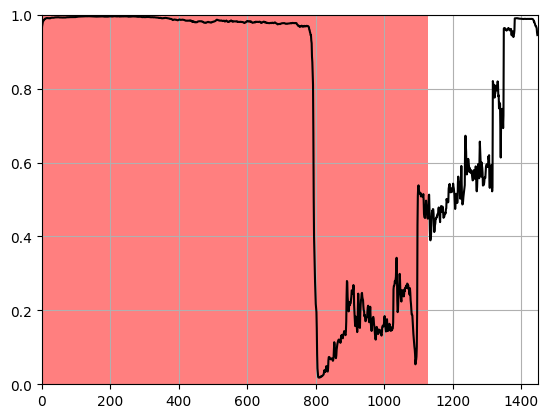

ENST00000419045
recall: 1.0
iou: 0.5840708017349243
biotype: pseudogene
IP_556960  :  {'start': 146, 'stop': 320, 'MS': 0, 'TE': 0, 'frame': 3}
IP_556957  :  {'start': 165, 'stop': 495, 'MS': 7, 'TE': 0, 'frame': 1}
IP_556958  :  {'start': 460, 'stop': 562, 'MS': 0, 'TE': 0, 'frame': 2}
IP_556959  :  {'start': 598, 'stop': 715, 'MS': 0, 'TE': 0, 'frame': 2}
IP_556956  :  {'start': 675, 'stop': 978, 'MS': 1, 'TE': 0, 'frame': 1}


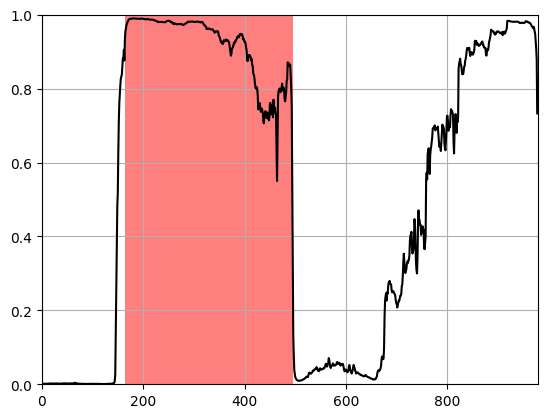

ENST00000457562
recall: 1.0
iou: 1.0
biotype: pseudogene
IP_556969  :  {'start': 0, 'stop': 810, 'MS': 2, 'TE': 0, 'frame': 1}
IP_556972  :  {'start': 586, 'stop': 694, 'MS': 0, 'TE': 0, 'frame': 2}
IP_556970  :  {'start': 933, 'stop': 1074, 'MS': 0, 'TE': 0, 'frame': 1}
IP_556971  :  {'start': 1176, 'stop': 1281, 'MS': 0, 'TE': 0, 'frame': 1}


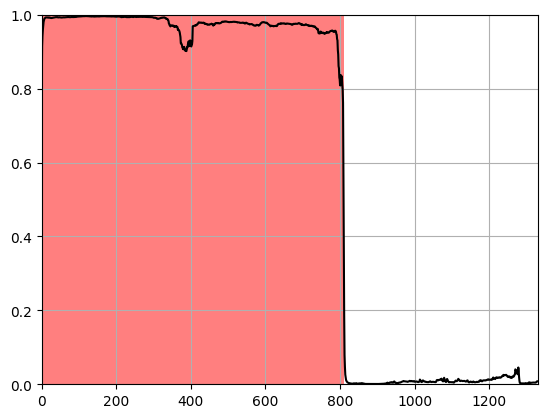

ENST00000439244
recall: 0.9898989796638489
iou: 0.9898989796638489
biotype: pseudogene
IP_557288  :  {'start': 88, 'stop': 286, 'MS': 2, 'TE': 0, 'frame': 2}


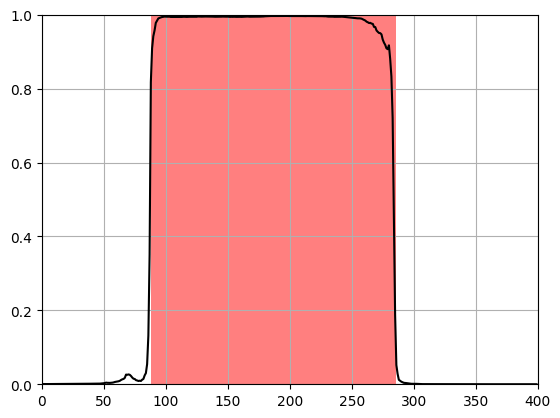

ENST00000430258
recall: 0.5692307949066162
iou: 0.26241135597229004
biotype: pseudogene
IP_557423  :  {'start': 81, 'stop': 432, 'MS': 0, 'TE': 0, 'frame': 1}
IP_557424  :  {'start': 322, 'stop': 517, 'MS': 3, 'TE': 0, 'frame': 2}


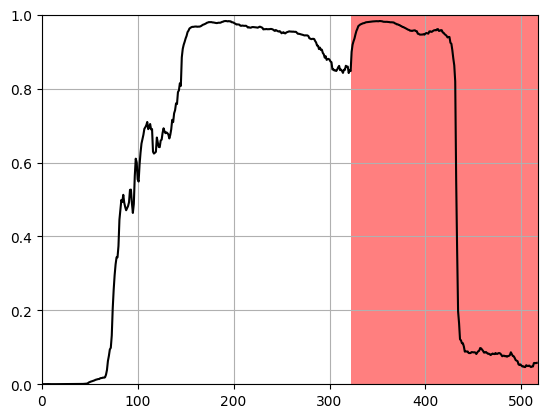

ENST00000434972
recall: 0.9981378316879272
iou: 0.6291079521179199
biotype: pseudogene
IP_557925  :  {'start': 0, 'stop': 156, 'MS': 0, 'TE': 0, 'frame': 1}
IP_557927  :  {'start': 65, 'stop': 602, 'MS': 2, 'TE': 0, 'frame': 3}
IP_557924  :  {'start': 357, 'stop': 453, 'MS': 0, 'TE': 0, 'frame': 1}
IP_557923  :  {'start': 729, 'stop': 882, 'MS': 1, 'TE': 0, 'frame': 1}
IP_557926  :  {'start': 869, 'stop': 1184, 'MS': 1, 'TE': 0, 'frame': 3}


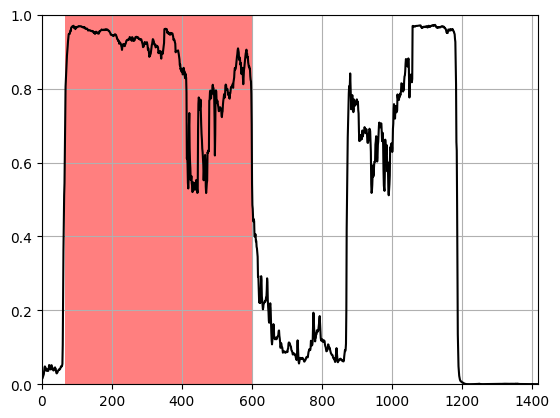

ENST00000435496
recall: 0.6241496801376343
iou: 0.6241496801376343
biotype: pseudogene
IP_558535  :  {'start': 0, 'stop': 339, 'MS': 6, 'TE': 0, 'frame': 1}
IP_558537  :  {'start': 247, 'stop': 391, 'MS': 0, 'TE': 0, 'frame': 2}
IP_558538  :  {'start': 439, 'stop': 688, 'MS': 9, 'TE': 0, 'frame': 2}
IP_558540  :  {'start': 473, 'stop': 701, 'MS': 0, 'TE': 0, 'frame': 3}
IP_558539  :  {'start': 697, 'stop': 934, 'MS': 0, 'TE': 0, 'frame': 2}
IP_558536  :  {'start': 1128, 'stop': 1239, 'MS': 0, 'TE': 0, 'frame': 1}


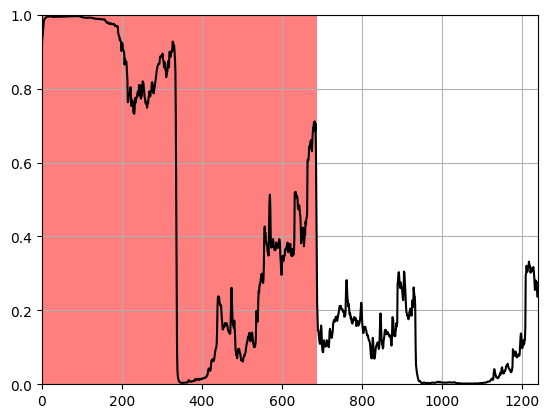

ENST00000458237
recall: 1.0
iou: 1.0
biotype: pseudogene
IP_559584  :  {'start': 0, 'stop': 549, 'MS': 10, 'TE': 0, 'frame': 1}
IP_559585  :  {'start': 545, 'stop': 686, 'MS': 0, 'TE': 0, 'frame': 3}


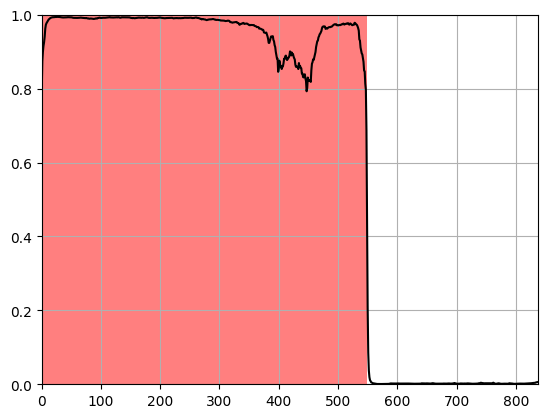

ENST00000418838
recall: 0.8704253435134888
iou: 0.5699481964111328
biotype: pseudogene
IP_560693  :  {'start': 0, 'stop': 534, 'MS': 0, 'TE': 0, 'frame': 1}
IP_560694  :  {'start': 385, 'stop': 529, 'MS': 0, 'TE': 0, 'frame': 2}
IP_560695  :  {'start': 533, 'stop': 1544, 'MS': 4, 'TE': 0, 'frame': 3}
IP_560692  :  {'start': 591, 'stop': 681, 'MS': 0, 'TE': 0, 'frame': 1}


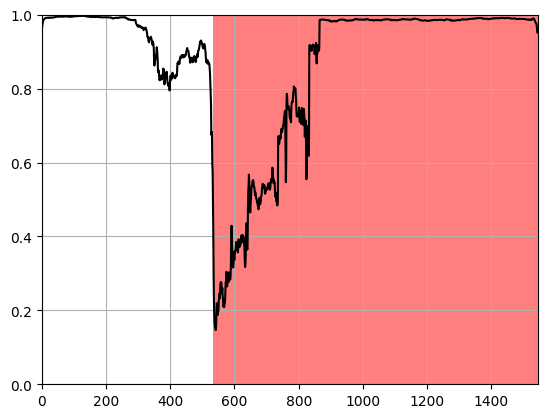

ENST00000445357
recall: 0.8286479115486145
iou: 0.5516933798789978
biotype: pseudogene
IP_561564  :  {'start': 45, 'stop': 387, 'MS': 1, 'TE': 0, 'frame': 1}
IP_561567  :  {'start': 85, 'stop': 190, 'MS': 0, 'TE': 0, 'frame': 2}
IP_561566  :  {'start': 415, 'stop': 1162, 'MS': 2, 'TE': 0, 'frame': 2}
IP_561570  :  {'start': 449, 'stop': 644, 'MS': 0, 'TE': 0, 'frame': 3}
IP_561569  :  {'start': 692, 'stop': 788, 'MS': 0, 'TE': 0, 'frame': 3}
IP_561568  :  {'start': 1171, 'stop': 1306, 'MS': 0, 'TE': 0, 'frame': 2}
IP_561565  :  {'start': 1465, 'stop': 1621, 'MS': 0, 'TE': 0, 'frame': 2}
IP_561563  :  {'start': 1719, 'stop': 1842, 'MS': 0, 'TE': 0, 'frame': 1}


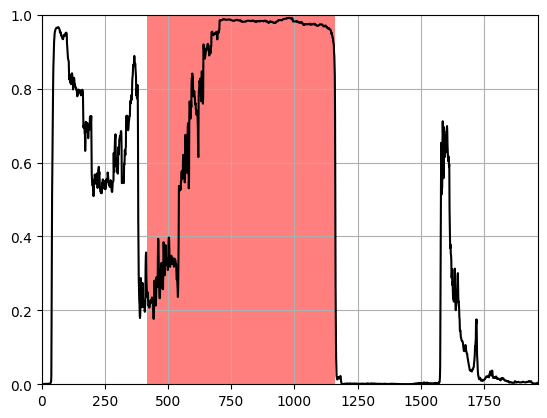

ENST00000323496
recall: 1.0
iou: 0.9926470518112183
biotype: pseudogene
IP_563312  :  {'start': 79, 'stop': 214, 'MS': 10, 'TE': 2, 'frame': 2}
IP_563310  :  {'start': 325, 'stop': 472, 'MS': 0, 'TE': 0, 'frame': 2}
IP_563311  :  {'start': 511, 'stop': 613, 'MS': 0, 'TE': 0, 'frame': 2}


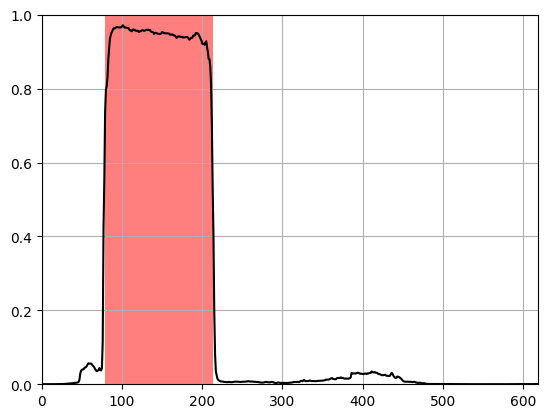

ENST00000412782
recall: 0.0
iou: 0.0
biotype: pseudogene
IP_567564  :  {'start': 156, 'stop': 291, 'MS': 0, 'TE': 0, 'frame': 1}
IP_567568  :  {'start': 164, 'stop': 287, 'MS': 2, 'TE': 0, 'frame': 3}
IP_567566  :  {'start': 293, 'stop': 458, 'MS': 0, 'TE': 0, 'frame': 3}
IP_567567  :  {'start': 503, 'stop': 644, 'MS': 0, 'TE': 0, 'frame': 3}
IP_567565  :  {'start': 677, 'stop': 953, 'MS': 0, 'TE': 0, 'frame': 3}


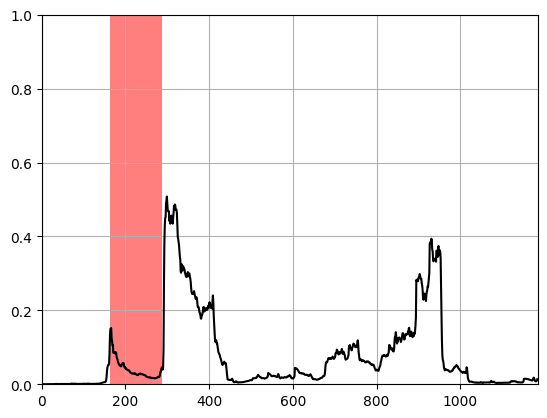

ENST00000520656
recall: 0.18614718317985535
iou: 0.034959349781274796
biotype: pseudogene
IP_569848  :  {'start': 9, 'stop': 888, 'MS': 0, 'TE': 0, 'frame': 1}
IP_569850  :  {'start': 379, 'stop': 529, 'MS': 0, 'TE': 0, 'frame': 2}
IP_569849  :  {'start': 712, 'stop': 805, 'MS': 0, 'TE': 0, 'frame': 2}
IP_569853  :  {'start': 845, 'stop': 1076, 'MS': 4, 'TE': 0, 'frame': 3}
IP_569851  :  {'start': 1003, 'stop': 1186, 'MS': 0, 'TE': 0, 'frame': 2}
IP_569854  :  {'start': 1193, 'stop': 1295, 'MS': 0, 'TE': 0, 'frame': 3}
IP_569852  :  {'start': 1240, 'stop': 1510, 'MS': 0, 'TE': 0, 'frame': 2}


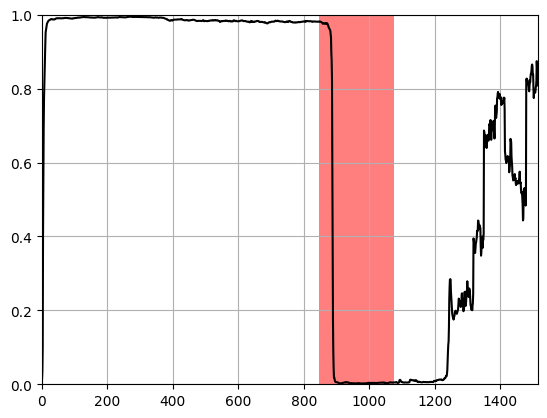

ENST00000517767
recall: 1.0
iou: 0.9811320900917053
biotype: pseudogene
IP_571605  :  {'start': 0, 'stop': 312, 'MS': 4, 'TE': 0, 'frame': 1}
IP_571606  :  {'start': 65, 'stop': 230, 'MS': 0, 'TE': 0, 'frame': 3}


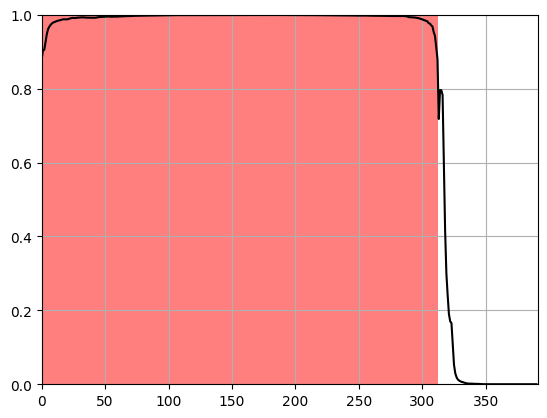

ENST00000521088
recall: 1.0
iou: 0.9971469044685364
biotype: pseudogene
IP_572673  :  {'start': 1, 'stop': 700, 'MS': 40, 'TE': 0, 'frame': 2}
IP_572674  :  {'start': 482, 'stop': 572, 'MS': 0, 'TE': 0, 'frame': 3}


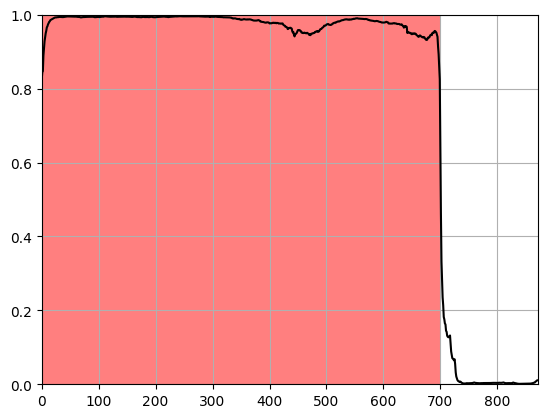

ENST00000517543
recall: 0.0
iou: 0.0
biotype: pseudogene
IP_573444  :  {'start': 0, 'stop': 114, 'MS': 3, 'TE': 0, 'frame': 1}
IP_573448  :  {'start': 257, 'stop': 416, 'MS': 0, 'TE': 0, 'frame': 3}
IP_573446  :  {'start': 472, 'stop': 604, 'MS': 1, 'TE': 0, 'frame': 2}
IP_573445  :  {'start': 708, 'stop': 873, 'MS': 0, 'TE': 0, 'frame': 1}
IP_573447  :  {'start': 1060, 'stop': 1228, 'MS': 0, 'TE': 0, 'frame': 2}


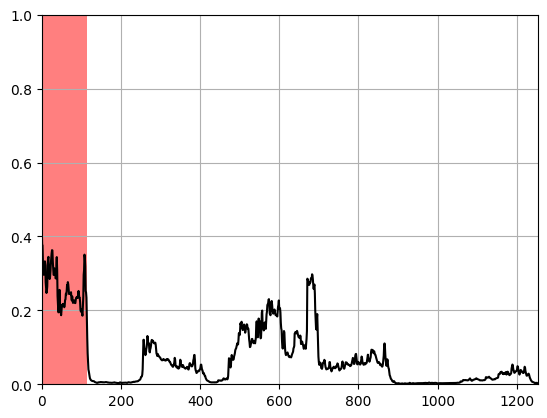

ENST00000399037
recall: 0.9959349632263184
iou: 0.8844765424728394
biotype: pseudogene
IP_578626  :  {'start': 1, 'stop': 493, 'MS': 3, 'TE': 0, 'frame': 2}
IP_578627  :  {'start': 395, 'stop': 545, 'MS': 0, 'TE': 0, 'frame': 3}
IP_578628  :  {'start': 602, 'stop': 704, 'MS': 0, 'TE': 0, 'frame': 3}
IP_578629  :  {'start': 860, 'stop': 1097, 'MS': 0, 'TE': 0, 'frame': 3}
IP_578625  :  {'start': 1068, 'stop': 1317, 'MS': 0, 'TE': 0, 'frame': 1}
IP_578630  :  {'start': 1220, 'stop': 1322, 'MS': 0, 'TE': 0, 'frame': 3}


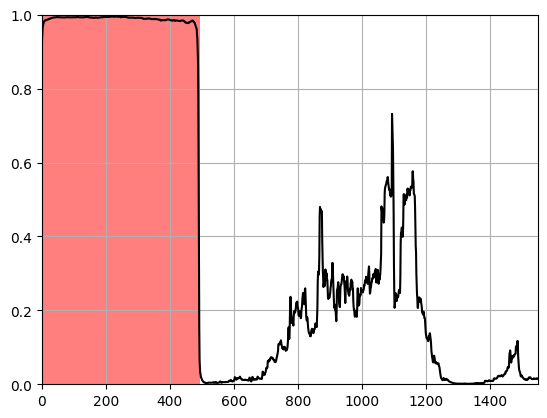

ENST00000402383
recall: 0.9931507110595703
iou: 0.7923497557640076
biotype: pseudogene
IP_590879  :  {'start': 85, 'stop': 337, 'MS': 0, 'TE': 0, 'frame': 2}
IP_590877  :  {'start': 177, 'stop': 270, 'MS': 1, 'TE': 0, 'frame': 1}
IP_590880  :  {'start': 389, 'stop': 626, 'MS': 0, 'TE': 0, 'frame': 3}
IP_590878  :  {'start': 829, 'stop': 1267, 'MS': 2, 'TE': 0, 'frame': 2}
IP_590881  :  {'start': 1064, 'stop': 1232, 'MS': 0, 'TE': 0, 'frame': 3}


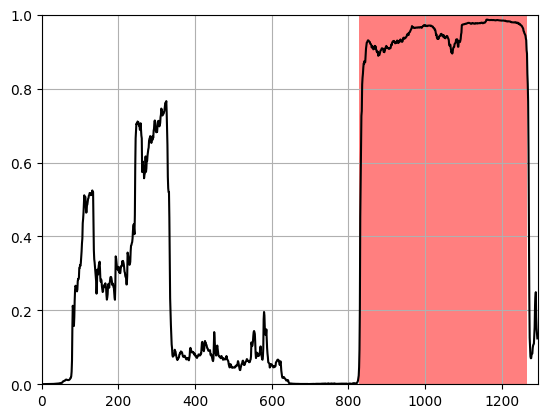

ENST00000454078
recall: 0.2613636255264282
iou: 0.09857142716646194
biotype: pseudogene
IP_592076  :  {'start': 0, 'stop': 435, 'MS': 0, 'TE': 0, 'frame': 1}
IP_592078  :  {'start': 499, 'stop': 625, 'MS': 0, 'TE': 0, 'frame': 2}
IP_592075  :  {'start': 543, 'stop': 807, 'MS': 17, 'TE': 0, 'frame': 1}
IP_592077  :  {'start': 906, 'stop': 1101, 'MS': 0, 'TE': 0, 'frame': 1}


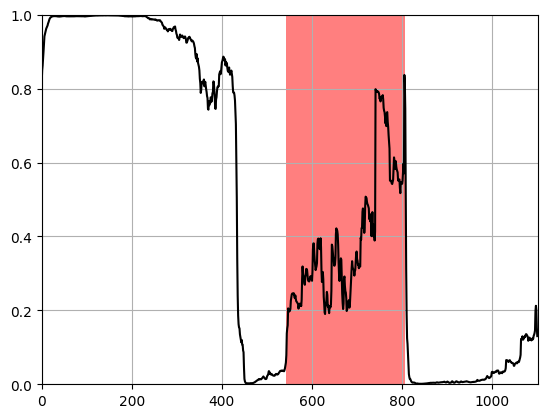

ENST00000415681
recall: 0.4009009003639221
iou: 0.20273348689079285
biotype: pseudogene
IP_592421  :  {'start': 0, 'stop': 222, 'MS': 19, 'TE': 0, 'frame': 1}
IP_592424  :  {'start': 239, 'stop': 341, 'MS': 0, 'TE': 0, 'frame': 3}
IP_592422  :  {'start': 349, 'stop': 613, 'MS': 0, 'TE': 0, 'frame': 2}
IP_592423  :  {'start': 563, 'stop': 686, 'MS': 0, 'TE': 0, 'frame': 3}


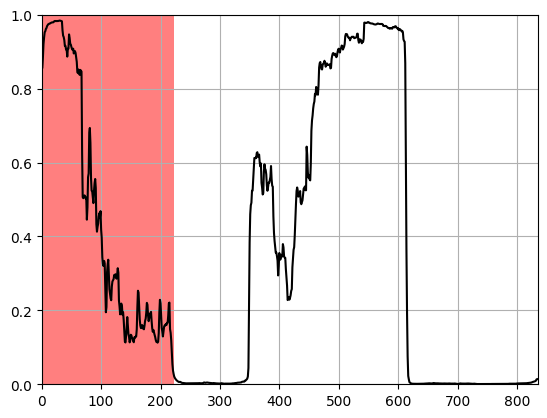

ENST00000406052
recall: 0.4479166567325592
iou: 0.3520982563495636
biotype: pseudogene
IP_595302  :  {'start': 279, 'stop': 633, 'MS': 0, 'TE': 0, 'frame': 1}
IP_595305  :  {'start': 347, 'stop': 572, 'MS': 0, 'TE': 0, 'frame': 3}
IP_595307  :  {'start': 581, 'stop': 1001, 'MS': 4, 'TE': 0, 'frame': 3}
IP_595301  :  {'start': 702, 'stop': 951, 'MS': 0, 'TE': 0, 'frame': 1}
IP_595303  :  {'start': 1029, 'stop': 1152, 'MS': 0, 'TE': 0, 'frame': 1}
IP_595306  :  {'start': 1109, 'stop': 1457, 'MS': 3, 'TE': 0, 'frame': 3}
IP_595304  :  {'start': 1299, 'stop': 1395, 'MS': 0, 'TE': 0, 'frame': 1}


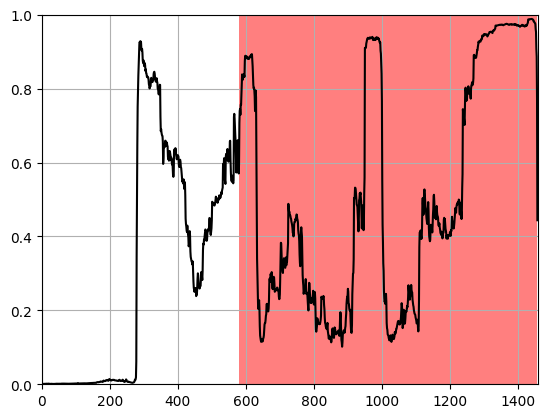

ENST00000408034
recall: 1.0
iou: 0.9937106966972351
biotype: pseudogene
IP_595438  :  {'start': 0, 'stop': 102, 'MS': 0, 'TE': 0, 'frame': 1}
IP_595437  :  {'start': 135, 'stop': 609, 'MS': 25, 'TE': 0, 'frame': 1}
IP_595440  :  {'start': 199, 'stop': 298, 'MS': 0, 'TE': 0, 'frame': 2}
IP_595441  :  {'start': 620, 'stop': 857, 'MS': 0, 'TE': 0, 'frame': 3}
IP_595439  :  {'start': 646, 'stop': 763, 'MS': 0, 'TE': 0, 'frame': 2}


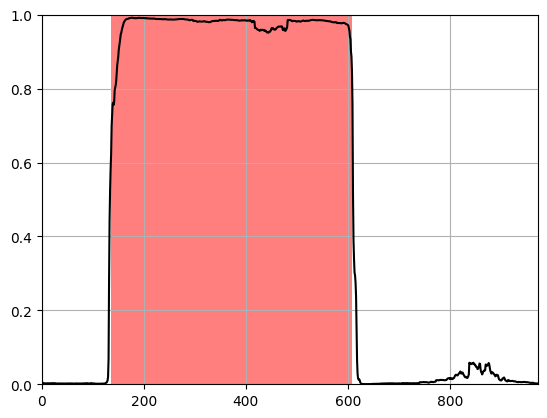

ENST00000515599
recall: 1.0
iou: 0.9864130616188049
biotype: pseudogene
IP_601473  :  {'start': 2, 'stop': 119, 'MS': 0, 'TE': 0, 'frame': 3}
IP_601469  :  {'start': 165, 'stop': 891, 'MS': 13, 'TE': 0, 'frame': 1}
IP_601470  :  {'start': 241, 'stop': 466, 'MS': 0, 'TE': 0, 'frame': 2}
IP_601471  :  {'start': 523, 'stop': 613, 'MS': 0, 'TE': 0, 'frame': 2}
IP_601472  :  {'start': 901, 'stop': 1069, 'MS': 1, 'TE': 0, 'frame': 2}
IP_601474  :  {'start': 983, 'stop': 1106, 'MS': 0, 'TE': 0, 'frame': 3}


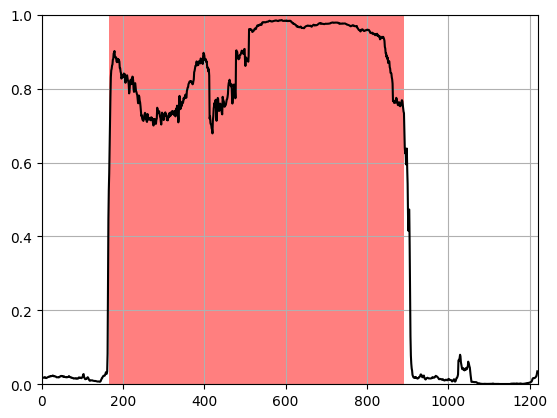

ENST00000507235
recall: 0.680232584476471
iou: 0.3574337959289551
biotype: pseudogene
IP_601506  :  {'start': 2, 'stop': 488, 'MS': 0, 'TE': 0, 'frame': 3}
IP_601502  :  {'start': 189, 'stop': 420, 'MS': 0, 'TE': 0, 'frame': 1}
IP_601503  :  {'start': 445, 'stop': 961, 'MS': 3, 'TE': 0, 'frame': 2}
IP_601504  :  {'start': 494, 'stop': 707, 'MS': 0, 'TE': 0, 'frame': 3}
IP_601505  :  {'start': 1127, 'stop': 1244, 'MS': 0, 'TE': 0, 'frame': 3}


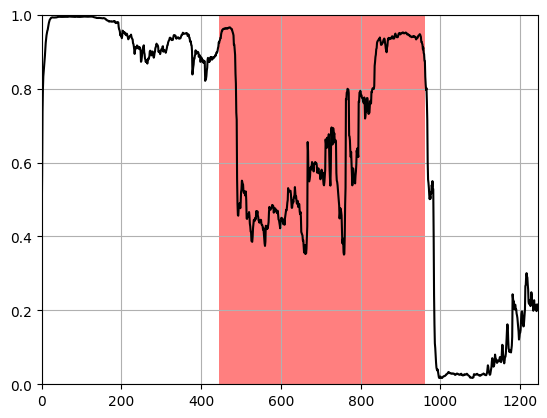

ENST00000513509
recall: 1.0
iou: 0.6838235259056091
biotype: pseudogene
IP_602139  :  {'start': 87, 'stop': 180, 'MS': 4, 'TE': 0, 'frame': 1}


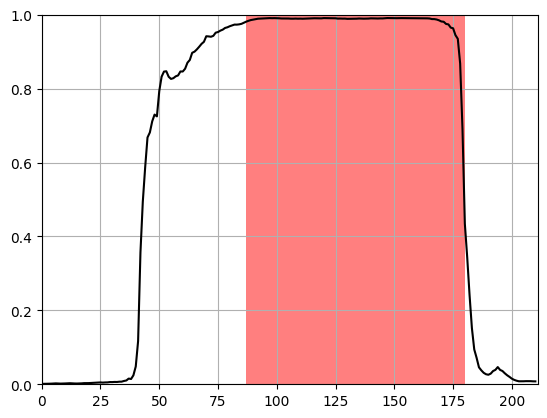

ENST00000505925
recall: 0.748633861541748
iou: 0.5367286801338196
biotype: pseudogene
IP_602213  :  {'start': 120, 'stop': 402, 'MS': 0, 'TE': 0, 'frame': 1}
IP_602216  :  {'start': 259, 'stop': 361, 'MS': 0, 'TE': 0, 'frame': 2}
IP_602214  :  {'start': 706, 'stop': 802, 'MS': 0, 'TE': 0, 'frame': 2}
IP_602215  :  {'start': 814, 'stop': 970, 'MS': 0, 'TE': 0, 'frame': 2}
IP_602217  :  {'start': 983, 'stop': 1160, 'MS': 12, 'TE': 0, 'frame': 3}
IP_602212  :  {'start': 1521, 'stop': 2076, 'MS': 2, 'TE': 0, 'frame': 1}


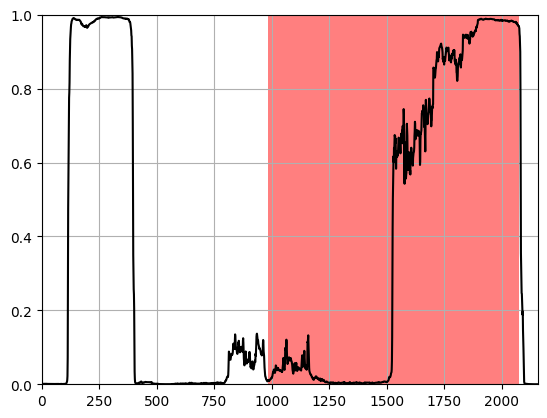

ENST00000512863
recall: 0.991830050945282
iou: 0.8442280888557434
biotype: pseudogene
IP_602534  :  {'start': 181, 'stop': 793, 'MS': 34, 'TE': 0, 'frame': 2}
IP_602536  :  {'start': 686, 'stop': 788, 'MS': 0, 'TE': 0, 'frame': 3}
IP_602532  :  {'start': 1011, 'stop': 1107, 'MS': 0, 'TE': 0, 'frame': 1}
IP_602535  :  {'start': 1136, 'stop': 1247, 'MS': 1, 'TE': 0, 'frame': 3}
IP_602533  :  {'start': 1288, 'stop': 1399, 'MS': 0, 'TE': 0, 'frame': 2}


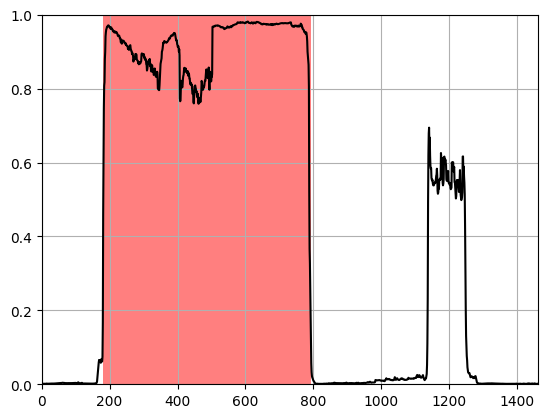

ENST00000425840
recall: 0.9964157938957214
iou: 0.9964157938957214
biotype: pseudogene
IP_602796  :  {'start': 15, 'stop': 126, 'MS': 0, 'TE': 0, 'frame': 1}
IP_602798  :  {'start': 188, 'stop': 467, 'MS': 67, 'TE': 0, 'frame': 3}
IP_602797  :  {'start': 312, 'stop': 417, 'MS': 0, 'TE': 0, 'frame': 1}


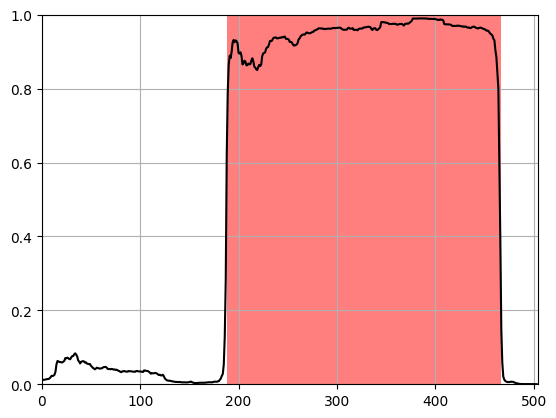

ENST00000399458
recall: 0.8076062798500061
iou: 0.42222222685813904
biotype: pseudogene
IP_603058  :  {'start': 0, 'stop': 372, 'MS': 0, 'TE': 0, 'frame': 1}
IP_603062  :  {'start': 22, 'stop': 157, 'MS': 0, 'TE': 0, 'frame': 2}
IP_603063  :  {'start': 440, 'stop': 887, 'MS': 3, 'TE': 0, 'frame': 3}
IP_603057  :  {'start': 735, 'stop': 906, 'MS': 0, 'TE': 0, 'frame': 1}
IP_603061  :  {'start': 739, 'stop': 871, 'MS': 0, 'TE': 0, 'frame': 2}
IP_603064  :  {'start': 902, 'stop': 1157, 'MS': 0, 'TE': 0, 'frame': 3}
IP_603056  :  {'start': 1161, 'stop': 1443, 'MS': 1, 'TE': 0, 'frame': 1}
IP_603060  :  {'start': 1201, 'stop': 1303, 'MS': 0, 'TE': 0, 'frame': 2}
IP_603059  :  {'start': 1315, 'stop': 1417, 'MS': 0, 'TE': 0, 'frame': 2}


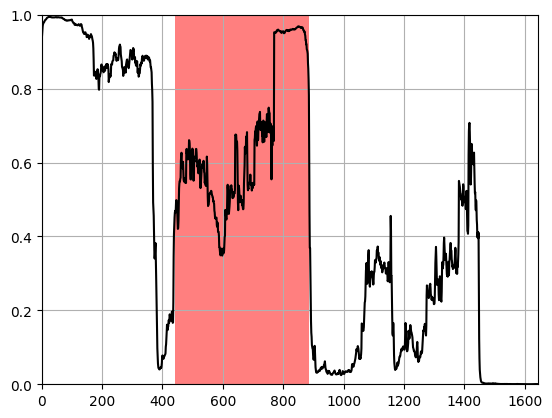

ENST00000437639
recall: 1.0
iou: 1.0
biotype: pseudogene
IP_604775  :  {'start': 0, 'stop': 3018, 'MS': 4, 'TE': 0, 'frame': 1}
IP_604777  :  {'start': 739, 'stop': 871, 'MS': 0, 'TE': 0, 'frame': 2}
IP_604776  :  {'start': 1837, 'stop': 2155, 'MS': 0, 'TE': 0, 'frame': 2}


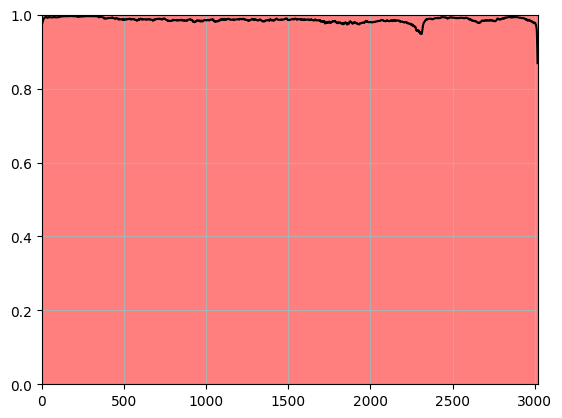

ENST00000428454
recall: 0.0
iou: 0.0
biotype: pseudogene
IP_790190  :  {'start': 198, 'stop': 333, 'MS': 0, 'TE': 0, 'frame': 1}
IP_790191  :  {'start': 244, 'stop': 340, 'MS': 0, 'TE': 0, 'frame': 2}
IP_790193  :  {'start': 454, 'stop': 556, 'MS': 0, 'TE': 0, 'frame': 2}
IP_612831  :  {'start': 763, 'stop': 937, 'MS': 1, 'TE': 0, 'frame': 2}
IP_725020  :  {'start': 885, 'stop': 1026, 'MS': 0, 'TE': 0, 'frame': 1}
IP_790194  :  {'start': 1022, 'stop': 1145, 'MS': 0, 'TE': 0, 'frame': 3}
IP_790189  :  {'start': 1041, 'stop': 1245, 'MS': 3, 'TE': 0, 'frame': 1}
IP_790188  :  {'start': 1248, 'stop': 1392, 'MS': 0, 'TE': 0, 'frame': 1}
IP_790195  :  {'start': 1373, 'stop': 1505, 'MS': 0, 'TE': 0, 'frame': 3}
IP_790187  :  {'start': 1437, 'stop': 1593, 'MS': 0, 'TE': 0, 'frame': 1}
IP_790192  :  {'start': 1837, 'stop': 1960, 'MS': 0, 'TE': 0, 'frame': 2}
IP_790196  :  {'start': 1868, 'stop': 1994, 'MS': 0, 'TE': 0, 'frame': 3}


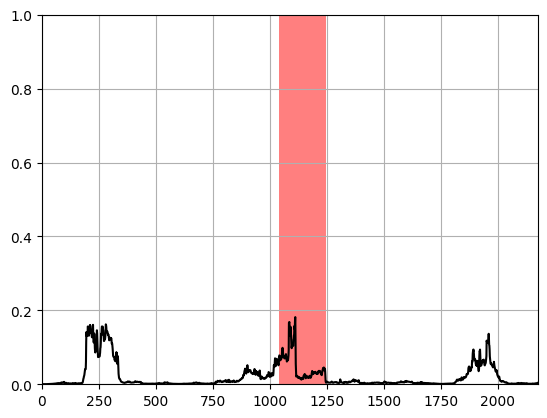

ENST00000512037
recall: 0.5598591566085815
iou: 0.5598591566085815
biotype: pseudogene
IP_612847  :  {'start': 0, 'stop': 345, 'MS': 4, 'TE': 0, 'frame': 1}
IP_612846  :  {'start': 351, 'stop': 615, 'MS': 1, 'TE': 0, 'frame': 1}
IP_612849  :  {'start': 611, 'stop': 1130, 'MS': 2, 'TE': 0, 'frame': 3}
IP_612848  :  {'start': 1096, 'stop': 1402, 'MS': 20, 'TE': 0, 'frame': 2}


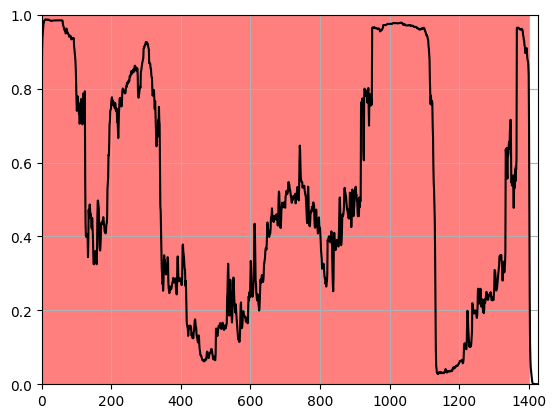

ENST00000510079
recall: 0.49462366104125977
iou: 0.25205478072166443
biotype: pseudogene
IP_614557  :  {'start': 0, 'stop': 450, 'MS': 0, 'TE': 0, 'frame': 1}
IP_614556  :  {'start': 534, 'stop': 882, 'MS': 4, 'TE': 0, 'frame': 1}
IP_614558  :  {'start': 971, 'stop': 1181, 'MS': 3, 'TE': 0, 'frame': 3}


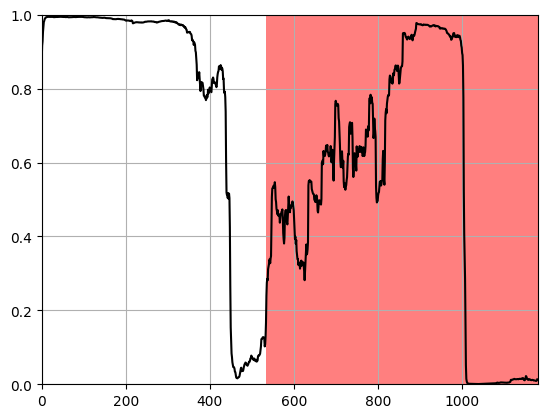

ENST00000493466
recall: 0.0
iou: 0.0
biotype: pseudogene
IP_614652  :  {'start': 0, 'stop': 264, 'MS': 0, 'TE': 0, 'frame': 1}
IP_614653  :  {'start': 319, 'stop': 478, 'MS': 3, 'TE': 0, 'frame': 2}


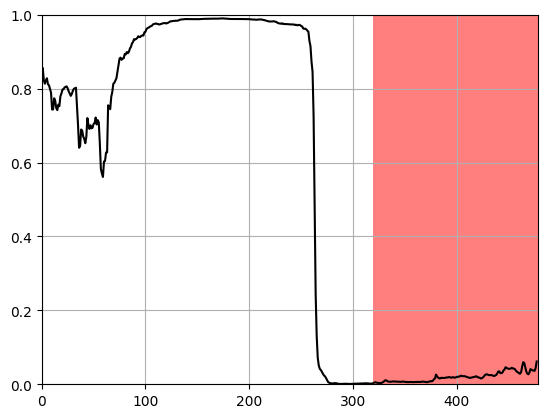

ENST00000454858
recall: 0.4747474789619446
iou: 0.26404494047164917
biotype: pseudogene
IP_619907  :  {'start': 0, 'stop': 198, 'MS': 5, 'TE': 0, 'frame': 1}
IP_619909  :  {'start': 104, 'stop': 356, 'MS': 0, 'TE': 0, 'frame': 3}
IP_619908  :  {'start': 348, 'stop': 474, 'MS': 0, 'TE': 0, 'frame': 1}


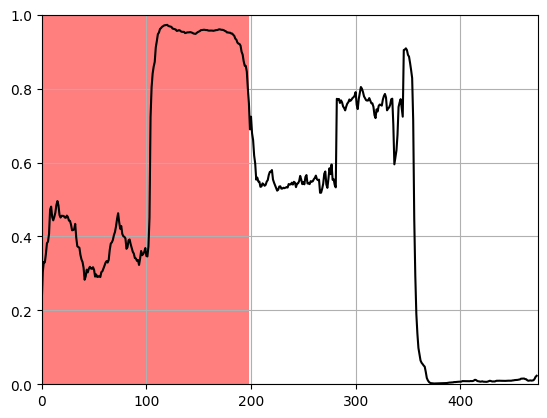

ENST00000472924
recall: 0.17893217504024506
iou: 0.14885954558849335
biotype: pseudogene
IP_620483  :  {'start': 0, 'stop': 237, 'MS': 0, 'TE': 0, 'frame': 1}
IP_620487  :  {'start': 184, 'stop': 538, 'MS': 2, 'TE': 0, 'frame': 2}
IP_620482  :  {'start': 333, 'stop': 450, 'MS': 0, 'TE': 0, 'frame': 1}
IP_620485  :  {'start': 655, 'stop': 757, 'MS': 0, 'TE': 0, 'frame': 2}
IP_620488  :  {'start': 737, 'stop': 1076, 'MS': 4, 'TE': 0, 'frame': 3}
IP_620486  :  {'start': 1075, 'stop': 1171, 'MS': 1, 'TE': 0, 'frame': 2}
IP_620481  :  {'start': 1158, 'stop': 1395, 'MS': 0, 'TE': 0, 'frame': 1}
IP_620484  :  {'start': 1222, 'stop': 1333, 'MS': 0, 'TE': 0, 'frame': 2}


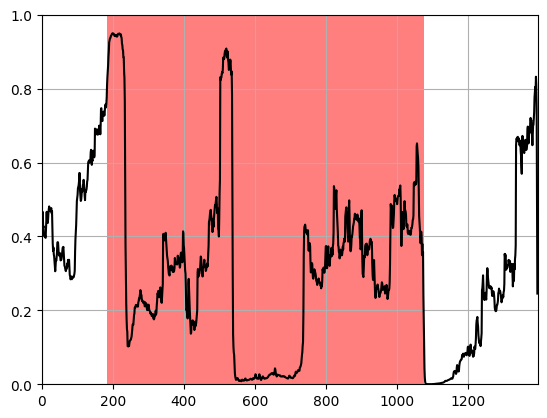

ENST00000483112
recall: 1.0
iou: 0.9958246350288391
biotype: pseudogene
IP_621691  :  {'start': 2, 'stop': 479, 'MS': 66, 'TE': 0, 'frame': 3}
IP_621690  :  {'start': 583, 'stop': 706, 'MS': 0, 'TE': 0, 'frame': 2}


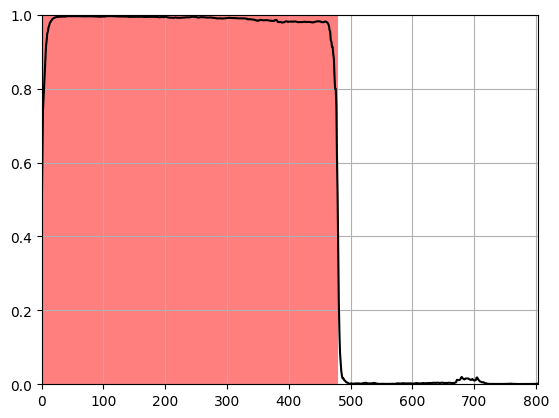

ENST00000489121
recall: 0.803428590297699
iou: 0.7898876667022705
biotype: pseudogene
IP_621887  :  {'start': 0, 'stop': 120, 'MS': 0, 'TE': 0, 'frame': 1}
IP_621885  :  {'start': 177, 'stop': 405, 'MS': 0, 'TE': 0, 'frame': 1}
IP_621891  :  {'start': 326, 'stop': 443, 'MS': 0, 'TE': 0, 'frame': 3}
IP_621888  :  {'start': 565, 'stop': 1117, 'MS': 5, 'TE': 0, 'frame': 2}
IP_621892  :  {'start': 683, 'stop': 932, 'MS': 0, 'TE': 0, 'frame': 3}
IP_621886  :  {'start': 1083, 'stop': 1440, 'MS': 7, 'TE': 0, 'frame': 1}
IP_621889  :  {'start': 1120, 'stop': 1255, 'MS': 0, 'TE': 0, 'frame': 2}
IP_621890  :  {'start': 1264, 'stop': 1378, 'MS': 0, 'TE': 0, 'frame': 2}


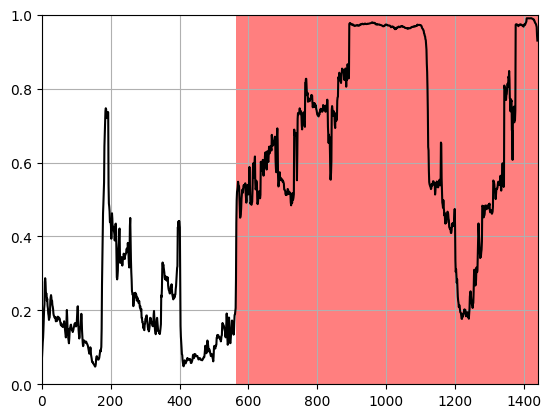

ENST00000483867
recall: 0.99790358543396
iou: 0.8321678042411804
biotype: pseudogene
IP_622328  :  {'start': 0, 'stop': 477, 'MS': 5, 'TE': 0, 'frame': 1}
IP_622327  :  {'start': 582, 'stop': 720, 'MS': 0, 'TE': 0, 'frame': 1}


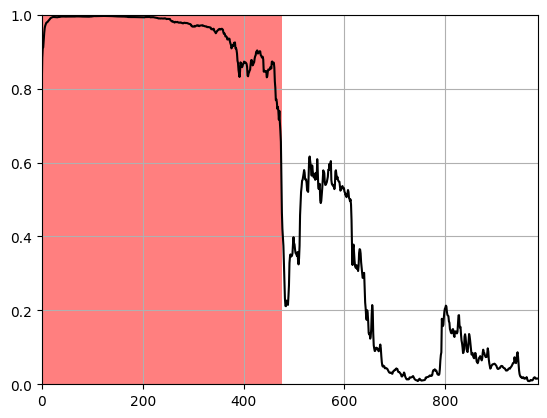

ENST00000483942
recall: 0.7297297120094299
iou: 0.7280898690223694
biotype: pseudogene
IP_623568  :  {'start': 168, 'stop': 441, 'MS': 3, 'TE': 0, 'frame': 1}
IP_623569  :  {'start': 403, 'stop': 703, 'MS': 0, 'TE': 0, 'frame': 2}
IP_623570  :  {'start': 584, 'stop': 827, 'MS': 0, 'TE': 0, 'frame': 3}
IP_623567  :  {'start': 858, 'stop': 1020, 'MS': 0, 'TE': 0, 'frame': 1}
IP_623571  :  {'start': 986, 'stop': 1157, 'MS': 11, 'TE': 0, 'frame': 3}


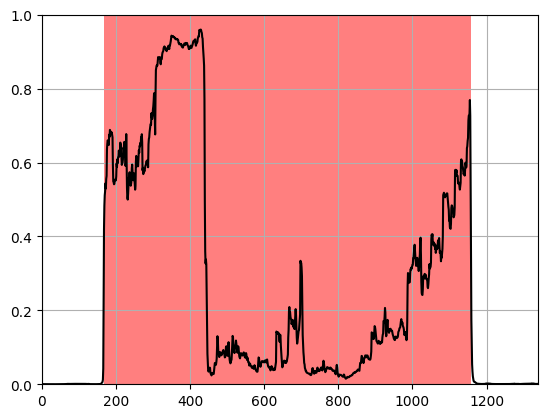

ENST00000424409
recall: 1.0
iou: 0.9972299337387085
biotype: pseudogene
IP_624426  :  {'start': 0, 'stop': 360, 'MS': 2, 'TE': 0, 'frame': 1}
IP_624427  :  {'start': 43, 'stop': 268, 'MS': 0, 'TE': 0, 'frame': 2}


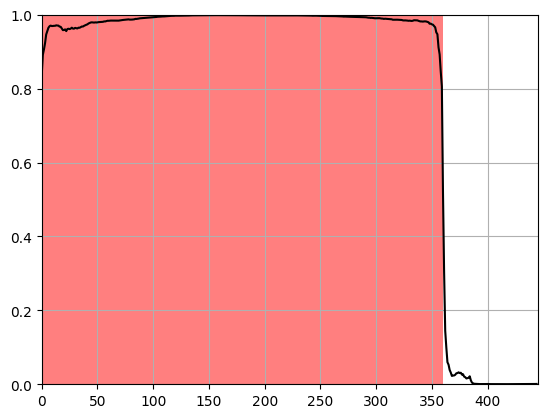

ENST00000605097
recall: 1.0
iou: 1.0
biotype: pseudogene
IP_624592  :  {'start': 64, 'stop': 241, 'MS': 2, 'TE': 0, 'frame': 2}
IP_624593  :  {'start': 307, 'stop': 403, 'MS': 0, 'TE': 0, 'frame': 2}
IP_624594  :  {'start': 314, 'stop': 449, 'MS': 0, 'TE': 0, 'frame': 3}
IP_624595  :  {'start': 470, 'stop': 572, 'MS': 0, 'TE': 0, 'frame': 3}


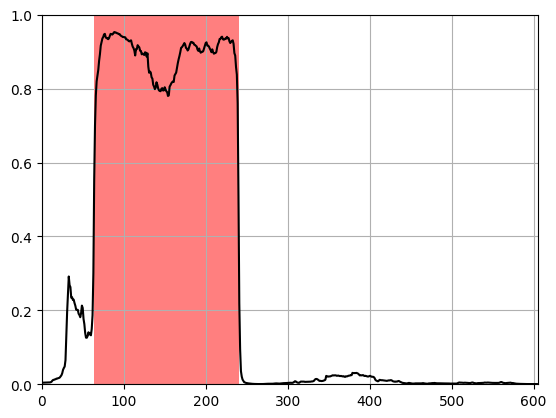

ENST00000491506
recall: 1.0
iou: 1.0
biotype: pseudogene
IP_624731  :  {'start': 0, 'stop': 567, 'MS': 9, 'TE': 0, 'frame': 1}
IP_624734  :  {'start': 97, 'stop': 190, 'MS': 0, 'TE': 0, 'frame': 2}
IP_624733  :  {'start': 355, 'stop': 454, 'MS': 0, 'TE': 0, 'frame': 2}
IP_624735  :  {'start': 496, 'stop': 592, 'MS': 0, 'TE': 0, 'frame': 2}
IP_624736  :  {'start': 503, 'stop': 599, 'MS': 0, 'TE': 0, 'frame': 3}
IP_624737  :  {'start': 692, 'stop': 866, 'MS': 0, 'TE': 0, 'frame': 3}
IP_624732  :  {'start': 708, 'stop': 849, 'MS': 0, 'TE': 0, 'frame': 1}


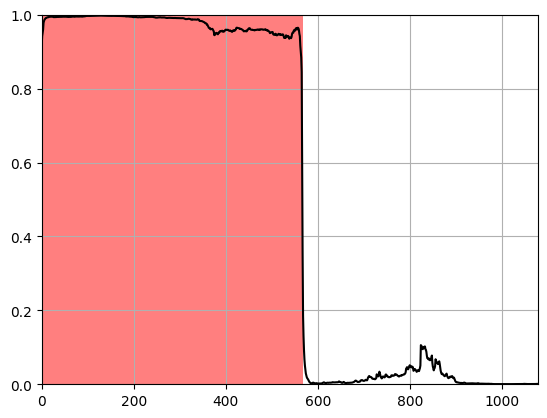

ENST00000431082
recall: 0.9864864945411682
iou: 0.9864864945411682
biotype: pseudogene
IP_624765  :  {'start': 104, 'stop': 245, 'MS': 0, 'TE': 0, 'frame': 3}
IP_624763  :  {'start': 154, 'stop': 376, 'MS': 28, 'TE': 0, 'frame': 2}
IP_624764  :  {'start': 278, 'stop': 470, 'MS': 0, 'TE': 0, 'frame': 3}


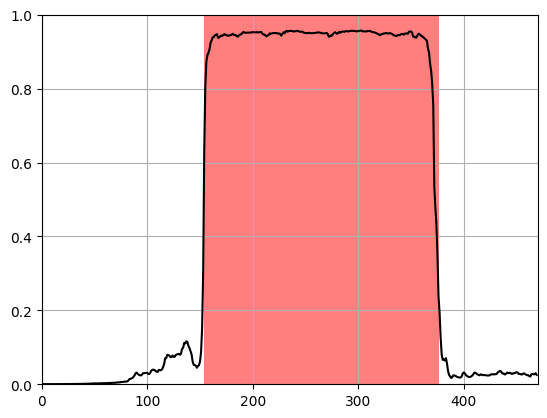

ENST00000445577
recall: 1.0
iou: 1.0
biotype: pseudogene
IP_624902  :  {'start': 0, 'stop': 156, 'MS': 0, 'TE': 2, 'frame': 1}


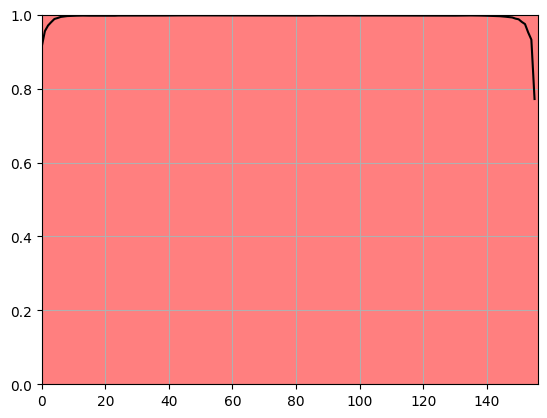

ENST00000425226
recall: 0.9307692050933838
iou: 0.9260203838348389
biotype: pseudogene
IP_635016  :  {'start': 0, 'stop': 120, 'MS': 0, 'TE': 0, 'frame': 1}
IP_635020  :  {'start': 188, 'stop': 479, 'MS': 0, 'TE': 0, 'frame': 3}
IP_635014  :  {'start': 351, 'stop': 444, 'MS': 0, 'TE': 0, 'frame': 1}
IP_635018  :  {'start': 415, 'stop': 958, 'MS': 13, 'TE': 0, 'frame': 2}
IP_635019  :  {'start': 800, 'stop': 1016, 'MS': 1, 'TE': 0, 'frame': 3}
IP_635015  :  {'start': 1008, 'stop': 1131, 'MS': 0, 'TE': 0, 'frame': 1}
IP_635021  :  {'start': 1214, 'stop': 1451, 'MS': 5, 'TE': 0, 'frame': 3}
IP_635017  :  {'start': 1278, 'stop': 1383, 'MS': 0, 'TE': 0, 'frame': 1}


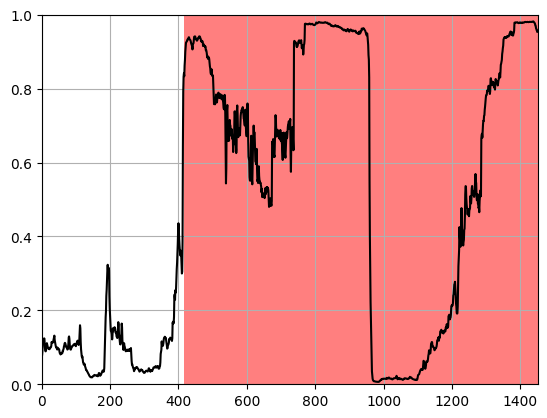

ENST00000417893
recall: 0.0
iou: 0.0
biotype: pseudogene
IP_636007  :  {'start': 53, 'stop': 158, 'MS': 0, 'TE': 0, 'frame': 3}
IP_635999  :  {'start': 115, 'stop': 259, 'MS': 0, 'TE': 0, 'frame': 2}
IP_636001  :  {'start': 352, 'stop': 493, 'MS': 1, 'TE': 0, 'frame': 2}
IP_636005  :  {'start': 458, 'stop': 560, 'MS': 0, 'TE': 0, 'frame': 3}
IP_635996  :  {'start': 567, 'stop': 663, 'MS': 0, 'TE': 0, 'frame': 1}
IP_636004  :  {'start': 581, 'stop': 764, 'MS': 0, 'TE': 0, 'frame': 3}
IP_636000  :  {'start': 763, 'stop': 907, 'MS': 1, 'TE': 0, 'frame': 2}
IP_636008  :  {'start': 839, 'stop': 1004, 'MS': 0, 'TE': 0, 'frame': 3}
IP_635998  :  {'start': 1006, 'stop': 1213, 'MS': 3, 'TE': 0, 'frame': 2}
IP_636006  :  {'start': 1097, 'stop': 1226, 'MS': 0, 'TE': 0, 'frame': 3}
IP_636002  :  {'start': 1225, 'stop': 1333, 'MS': 0, 'TE': 0, 'frame': 2}
IP_636003  :  {'start': 1265, 'stop': 1358, 'MS': 0, 'TE': 0, 'frame': 3}
IP_635997  :  {'start': 1635, 'stop': 1941, 'MS': 0, 'TE': 0, 'frame': 

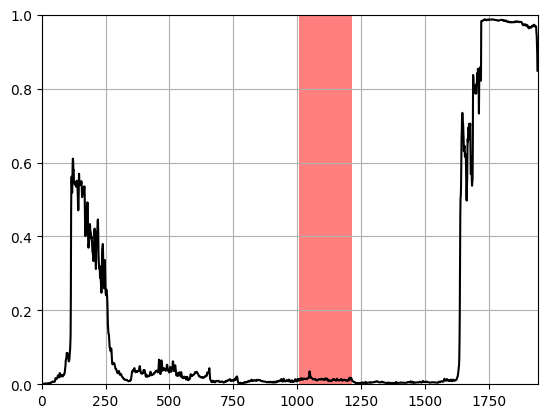

ENST00000419201
recall: 0.9458937048912048
iou: 0.9458937048912048
biotype: pseudogene
IP_636333  :  {'start': 0, 'stop': 363, 'MS': 2, 'TE': 0, 'frame': 1}
IP_636336  :  {'start': 89, 'stop': 200, 'MS': 0, 'TE': 0, 'frame': 3}
IP_636334  :  {'start': 241, 'stop': 562, 'MS': 0, 'TE': 0, 'frame': 2}
IP_636339  :  {'start': 515, 'stop': 617, 'MS': 0, 'TE': 0, 'frame': 3}
IP_636332  :  {'start': 552, 'stop': 687, 'MS': 1, 'TE': 0, 'frame': 1}
IP_636335  :  {'start': 643, 'stop': 1315, 'MS': 7, 'TE': 0, 'frame': 2}
IP_636337  :  {'start': 677, 'stop': 794, 'MS': 0, 'TE': 0, 'frame': 3}
IP_636338  :  {'start': 803, 'stop': 974, 'MS': 0, 'TE': 0, 'frame': 3}


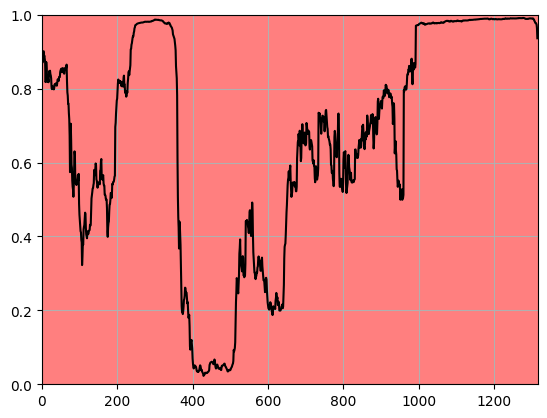

ENST00000378334
recall: 0.5009633898735046
iou: 0.10717230290174484
biotype: pseudogene
IP_638151  :  {'start': 1, 'stop': 193, 'MS': 1, 'TE': 0, 'frame': 2}
IP_638153  :  {'start': 401, 'stop': 827, 'MS': 1, 'TE': 0, 'frame': 3}
IP_638139  :  {'start': 492, 'stop': 636, 'MS': 0, 'TE': 0, 'frame': 1}
IP_638150  :  {'start': 904, 'stop': 994, 'MS': 0, 'TE': 0, 'frame': 2}
IP_638149  :  {'start': 1036, 'stop': 1261, 'MS': 0, 'TE': 0, 'frame': 2}
IP_638155  :  {'start': 1397, 'stop': 1721, 'MS': 0, 'TE': 0, 'frame': 3}
IP_638137  :  {'start': 1755, 'stop': 1884, 'MS': 0, 'TE': 0, 'frame': 1}
IP_638145  :  {'start': 2158, 'stop': 2401, 'MS': 1, 'TE': 0, 'frame': 2}
IP_638157  :  {'start': 2261, 'stop': 2528, 'MS': 0, 'TE': 0, 'frame': 3}
IP_638154  :  {'start': 2777, 'stop': 2882, 'MS': 0, 'TE': 0, 'frame': 3}
IP_638140  :  {'start': 3141, 'stop': 3486, 'MS': 2, 'TE': 0, 'frame': 1}
IP_638146  :  {'start': 3385, 'stop': 4075, 'MS': 0, 'TE': 0, 'frame': 2}
IP_638142  :  {'start': 4074, 'sto

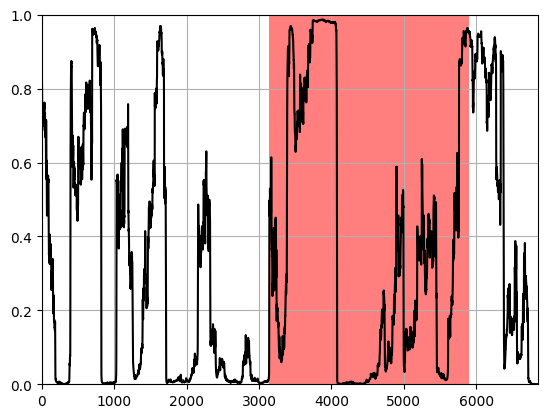

ENST00000523309
recall: 1.0
iou: 0.9938080310821533
biotype: pseudogene
IP_653287  :  {'start': 2, 'stop': 323, 'MS': 9, 'TE': 0, 'frame': 3}


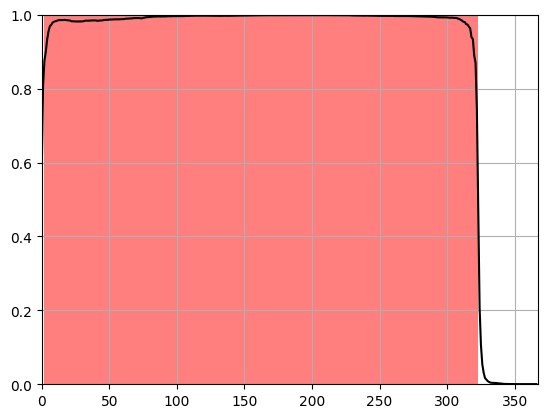

ENST00000458731
recall: 0.0
iou: 0.0
biotype: pseudogene
IP_661872  :  {'start': 6, 'stop': 135, 'MS': 0, 'TE': 0, 'frame': 1}
IP_661875  :  {'start': 65, 'stop': 299, 'MS': 0, 'TE': 0, 'frame': 3}
IP_661871  :  {'start': 576, 'stop': 729, 'MS': 0, 'TE': 0, 'frame': 1}
IP_661873  :  {'start': 697, 'stop': 907, 'MS': 2, 'TE': 0, 'frame': 2}
IP_661874  :  {'start': 866, 'stop': 962, 'MS': 0, 'TE': 0, 'frame': 3}


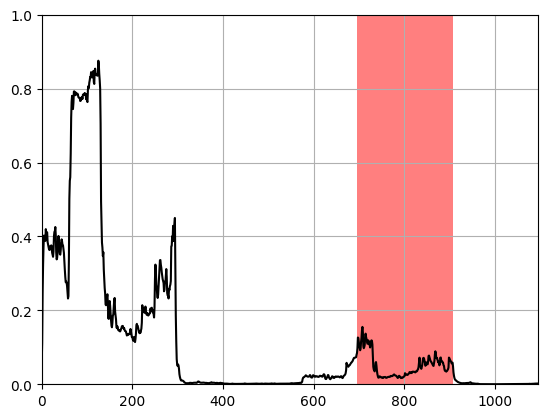

ENST00000415187
recall: 1.0
iou: 1.0
biotype: pseudogene
IP_662960  :  {'start': 0, 'stop': 135, 'MS': 7, 'TE': 0, 'frame': 1}


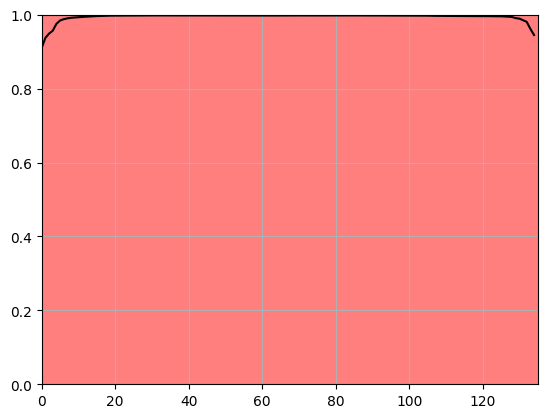

ENST00000437325
recall: 0.9918699264526367
iou: 0.5507900714874268
biotype: pseudogene
IP_667709  :  {'start': 91, 'stop': 337, 'MS': 3, 'TE': 0, 'frame': 2}
IP_667711  :  {'start': 446, 'stop': 545, 'MS': 0, 'TE': 0, 'frame': 3}
IP_667712  :  {'start': 551, 'stop': 650, 'MS': 0, 'TE': 0, 'frame': 3}
IP_667710  :  {'start': 784, 'stop': 985, 'MS': 0, 'TE': 0, 'frame': 2}


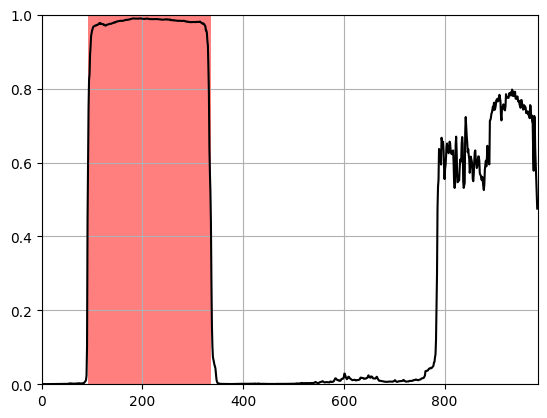

ENST00000431492
recall: 0.9973333477973938
iou: 0.8256070613861084
biotype: pseudogene
IP_667732  :  {'start': 15, 'stop': 390, 'MS': 2, 'TE': 0, 'frame': 1}
IP_667731  :  {'start': 477, 'stop': 567, 'MS': 0, 'TE': 0, 'frame': 1}


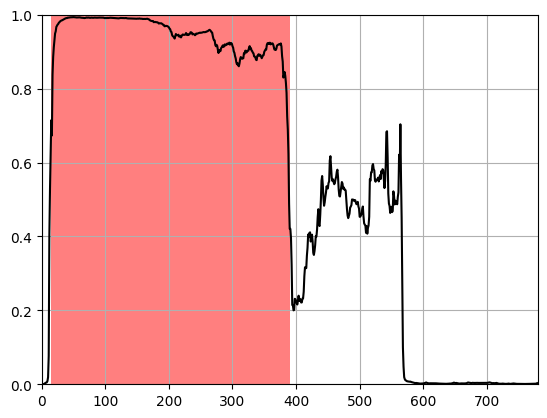

ENST00000428881
recall: 0.8664302825927734
iou: 0.8654073476791382
biotype: pseudogene
IP_668632  :  {'start': 0, 'stop': 348, 'MS': 9, 'TE': 0, 'frame': 1}
IP_565110  :  {'start': 366, 'stop': 462, 'MS': 0, 'TE': 0, 'frame': 1}
IP_668634  :  {'start': 413, 'stop': 911, 'MS': 3, 'TE': 0, 'frame': 3}
IP_668635  :  {'start': 974, 'stop': 1064, 'MS': 0, 'TE': 0, 'frame': 3}
IP_668633  :  {'start': 993, 'stop': 1311, 'MS': 1, 'TE': 0, 'frame': 1}


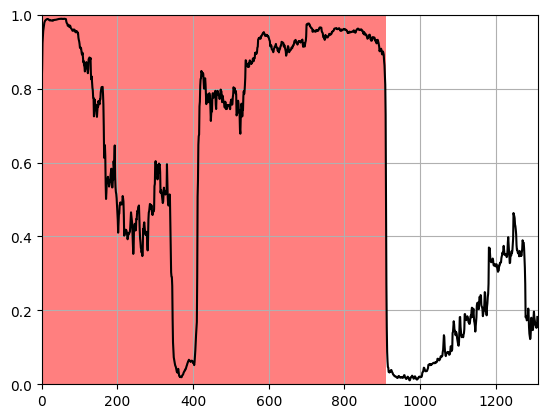

ENST00000413175
recall: 0.9744483232498169
iou: 0.9721900224685669
biotype: pseudogene
IP_669170  :  {'start': 24, 'stop': 885, 'MS': 2, 'TE': 0, 'frame': 1}
IP_669171  :  {'start': 499, 'stop': 727, 'MS': 0, 'TE': 0, 'frame': 2}
IP_669172  :  {'start': 662, 'stop': 842, 'MS': 0, 'TE': 0, 'frame': 3}


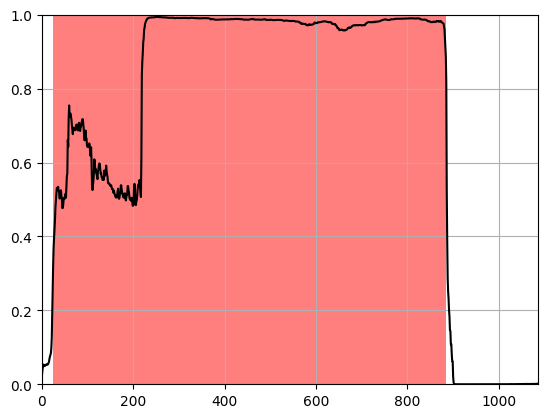

ENST00000566701
recall: 1.0
iou: 0.8543689250946045
biotype: pseudogene
IP_669191  :  {'start': 0, 'stop': 186, 'MS': 0, 'TE': 0, 'frame': 1}
IP_669195  :  {'start': 170, 'stop': 314, 'MS': 0, 'TE': 0, 'frame': 3}
IP_669192  :  {'start': 366, 'stop': 588, 'MS': 0, 'TE': 0, 'frame': 1}
IP_669194  :  {'start': 473, 'stop': 1265, 'MS': 4, 'TE': 0, 'frame': 3}
IP_669190  :  {'start': 1227, 'stop': 1338, 'MS': 0, 'TE': 0, 'frame': 1}
IP_669193  :  {'start': 1297, 'stop': 1546, 'MS': 1, 'TE': 0, 'frame': 2}


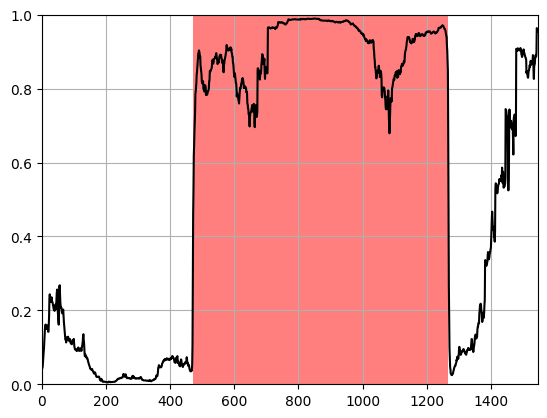

ENST00000447259
recall: 0.8059964776039124
iou: 0.803163468837738
biotype: pseudogene
IP_669661  :  {'start': 5, 'stop': 167, 'MS': 0, 'TE': 0, 'frame': 3}
IP_669657  :  {'start': 300, 'stop': 867, 'MS': 2, 'TE': 0, 'frame': 1}
IP_669660  :  {'start': 364, 'stop': 460, 'MS': 0, 'TE': 0, 'frame': 2}
IP_669658  :  {'start': 778, 'stop': 907, 'MS': 0, 'TE': 0, 'frame': 2}
IP_669656  :  {'start': 912, 'stop': 1086, 'MS': 0, 'TE': 0, 'frame': 1}
IP_669659  :  {'start': 970, 'stop': 1060, 'MS': 0, 'TE': 0, 'frame': 2}


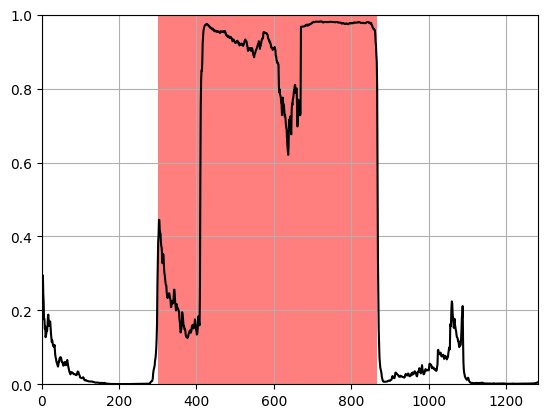

ENST00000429752
recall: 1.0
iou: 1.0
biotype: pseudogene
IP_670149  :  {'start': 41, 'stop': 275, 'MS': 0, 'TE': 0, 'frame': 3}
IP_670148  :  {'start': 132, 'stop': 447, 'MS': 7, 'TE': 0, 'frame': 1}


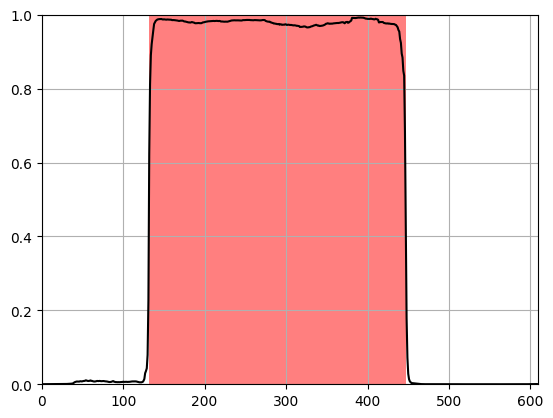

ENST00000414693
recall: 1.0
iou: 1.0
biotype: pseudogene
IP_671305  :  {'start': 0, 'stop': 480, 'MS': 0, 'TE': 2, 'frame': 1}
IP_671306  :  {'start': 304, 'stop': 403, 'MS': 0, 'TE': 0, 'frame': 2}


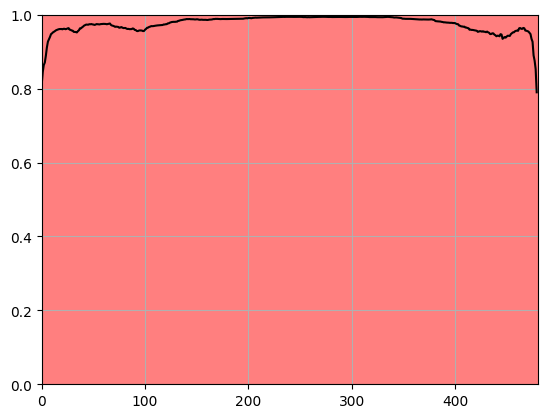

ENST00000444241
recall: 0.2753623127937317
iou: 0.09810671210289001
biotype: pseudogene
IP_671475  :  {'start': 2, 'stop': 131, 'MS': 0, 'TE': 0, 'frame': 3}
IP_671473  :  {'start': 202, 'stop': 367, 'MS': 0, 'TE': 0, 'frame': 2}
IP_671470  :  {'start': 363, 'stop': 606, 'MS': 0, 'TE': 0, 'frame': 1}
IP_671472  :  {'start': 388, 'stop': 508, 'MS': 0, 'TE': 0, 'frame': 2}
IP_671474  :  {'start': 548, 'stop': 755, 'MS': 11, 'TE': 0, 'frame': 3}
IP_671471  :  {'start': 1018, 'stop': 1216, 'MS': 0, 'TE': 0, 'frame': 2}


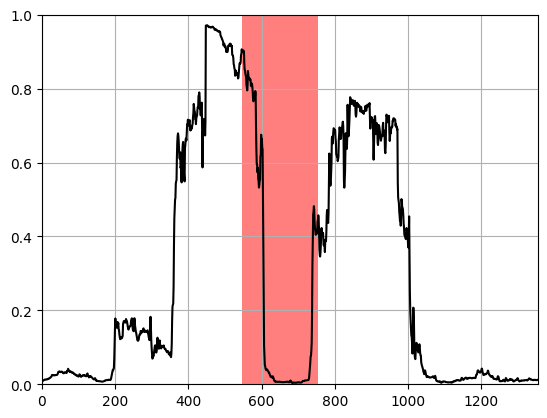

ENST00000439531
recall: 1.0
iou: 1.0
biotype: pseudogene
IP_672235  :  {'start': 0, 'stop': 483, 'MS': 5, 'TE': 0, 'frame': 1}
IP_672236  :  {'start': 151, 'stop': 268, 'MS': 0, 'TE': 0, 'frame': 2}


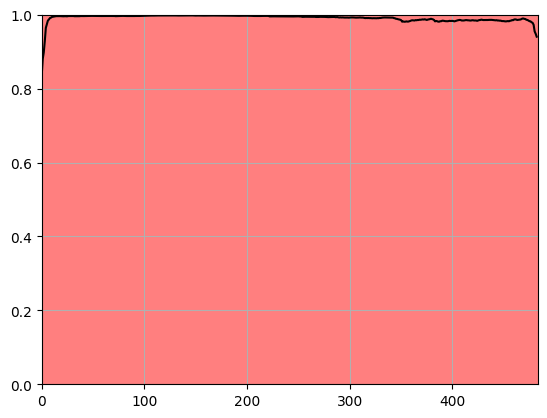

ENST00000594883
recall: 0.07547169923782349
iou: 0.011310084722936153
biotype: pseudogene
IP_688562  :  {'start': 510, 'stop': 714, 'MS': 0, 'TE': 0, 'frame': 1}
IP_688563  :  {'start': 589, 'stop': 748, 'MS': 2, 'TE': 0, 'frame': 2}
IP_688561  :  {'start': 735, 'stop': 1233, 'MS': 1, 'TE': 0, 'frame': 1}
IP_688564  :  {'start': 1381, 'stop': 1810, 'MS': 0, 'TE': 0, 'frame': 2}
IP_688565  :  {'start': 1763, 'stop': 1931, 'MS': 0, 'TE': 0, 'frame': 3}


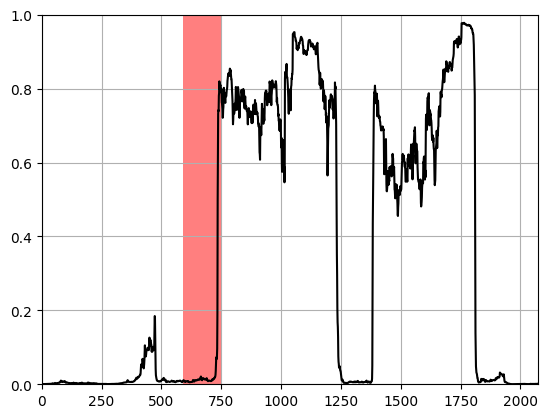

ENST00000464444
recall: 0.9973545074462891
iou: 0.6522491574287415
biotype: pseudogene
IP_691608  :  {'start': 0, 'stop': 378, 'MS': 3, 'TE': 0, 'frame': 1}
IP_691610  :  {'start': 58, 'stop': 190, 'MS': 0, 'TE': 0, 'frame': 2}
IP_691609  :  {'start': 382, 'stop': 748, 'MS': 0, 'TE': 0, 'frame': 2}


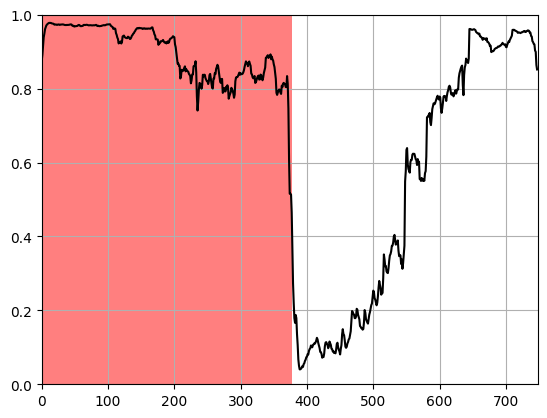

ENST00000465539
recall: 0.0793650820851326
iou: 0.013804527930915356
biotype: pseudogene
IP_703093  :  {'start': 0, 'stop': 198, 'MS': 0, 'TE': 0, 'frame': 1}
IP_703094  :  {'start': 19, 'stop': 121, 'MS': 0, 'TE': 0, 'frame': 2}
IP_703091  :  {'start': 198, 'stop': 513, 'MS': 0, 'TE': 9, 'frame': 1}
IP_703095  :  {'start': 698, 'stop': 1970, 'MS': 0, 'TE': 0, 'frame': 3}
IP_703092  :  {'start': 1623, 'stop': 1875, 'MS': 0, 'TE': 0, 'frame': 1}


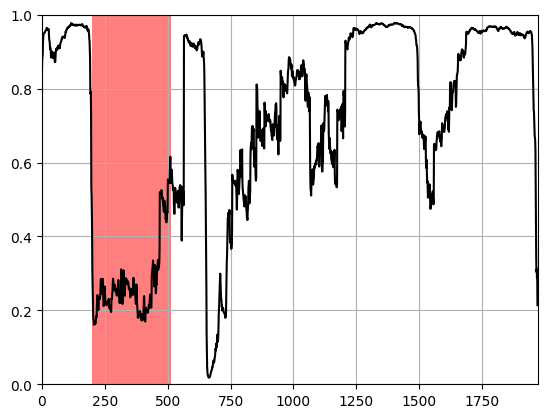

ENST00000578162
recall: 0.022012578323483467
iou: 0.021472392603754997
biotype: pseudogene
IP_704360  :  {'start': 0, 'stop': 132, 'MS': 0, 'TE': 0, 'frame': 1}
IP_704364  :  {'start': 134, 'stop': 236, 'MS': 0, 'TE': 0, 'frame': 3}
IP_704362  :  {'start': 286, 'stop': 463, 'MS': 8, 'TE': 0, 'frame': 2}
IP_704363  :  {'start': 574, 'stop': 715, 'MS': 2, 'TE': 0, 'frame': 2}
IP_704361  :  {'start': 621, 'stop': 723, 'MS': 0, 'TE': 0, 'frame': 1}


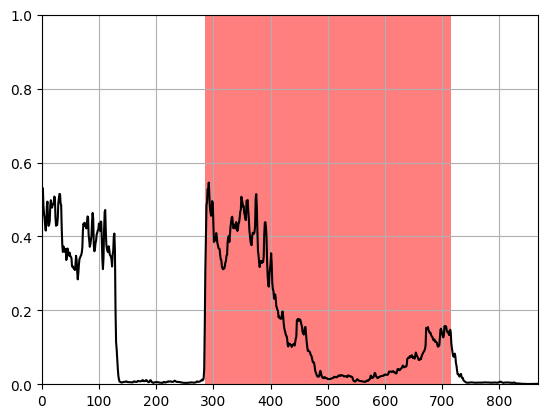

ENST00000621574
recall: 0.0
iou: 0.0
biotype: pseudogene
IP_713621  :  {'start': 45, 'stop': 183, 'MS': 0, 'TE': 0, 'frame': 1}
IP_713623  :  {'start': 305, 'stop': 419, 'MS': 4, 'TE': 0, 'frame': 3}
IP_713622  :  {'start': 424, 'stop': 547, 'MS': 0, 'TE': 0, 'frame': 2}
IP_713615  :  {'start': 745, 'stop': 910, 'MS': 0, 'TE': 0, 'frame': 2}


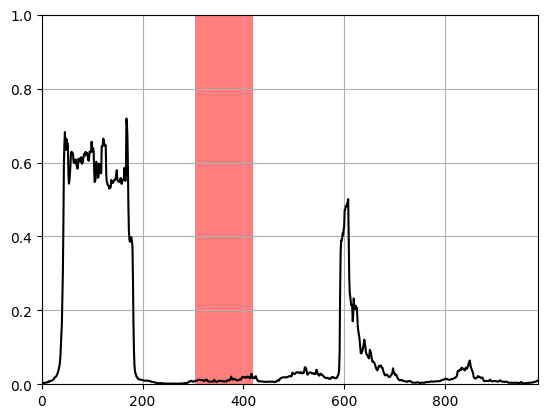

ENST00000563335
recall: 0.9968847632408142
iou: 0.9968847632408142
biotype: pseudogene
IP_722007  :  {'start': 178, 'stop': 499, 'MS': 5, 'TE': 0, 'frame': 2}
IP_722006  :  {'start': 276, 'stop': 474, 'MS': 0, 'TE': 0, 'frame': 1}
IP_722008  :  {'start': 302, 'stop': 392, 'MS': 0, 'TE': 0, 'frame': 3}


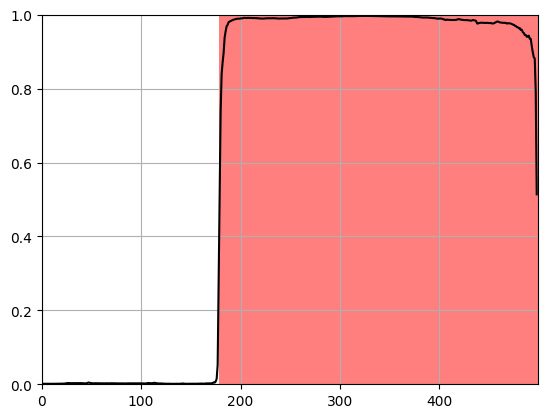

ENST00000442856
recall: 0.946540892124176
iou: 0.19802631437778473
biotype: pseudogene
IP_725775  :  {'start': 65, 'stop': 596, 'MS': 0, 'TE': 0, 'frame': 3}
IP_725771  :  {'start': 240, 'stop': 558, 'MS': 2, 'TE': 0, 'frame': 1}
IP_725774  :  {'start': 644, 'stop': 743, 'MS': 0, 'TE': 0, 'frame': 3}
IP_725772  :  {'start': 651, 'stop': 1674, 'MS': 0, 'TE': 0, 'frame': 1}
IP_725773  :  {'start': 763, 'stop': 895, 'MS': 0, 'TE': 0, 'frame': 2}


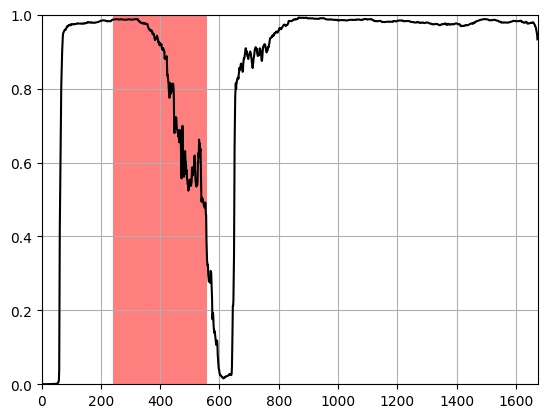

ENST00000564298
recall: 0.8676123023033142
iou: 0.7960954308509827
biotype: pseudogene
IP_736999  :  {'start': 45, 'stop': 468, 'MS': 13, 'TE': 0, 'frame': 1}
IP_737000  :  {'start': 514, 'stop': 757, 'MS': 0, 'TE': 0, 'frame': 2}


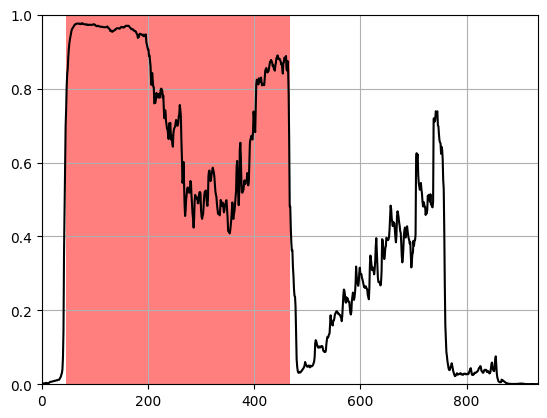

In [39]:
map_preds(report, trx_orfs, ensembl_trx, n_display=200)